In [1]:
%config Completer.use_jedi=False

import sys
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

from refsimu import reload_simulation
from refsimu import microbe_pop_on

In [2]:
def get_yearly_averages(times_day,data):
    period = 365
    tyear_full = times_day.astype(int) // 365
    tyear_comp = np.sort(np.unique(tyear_full))
    data_comp_shap = tyear_comp.shape + data.shape[1:]
    data_comp = np.zeros(data_comp_shap,dtype=data.dtype)
    for iy,year in enumerate(tyear_comp):
        filt = tyear_full == year
        data_comp[iy,...] = np.mean(data[filt,...],axis=0)
    return tyear_comp,data_comp

In [3]:
microbe_pop_on() # should be used if simulations where build and run with microbe quantization activated 
# (eg microbe_pop_on was also called also in build_replica and run_replica scripts)

Microbe quantization True


In [4]:
def get_diag_collector(rep_dir):
    eco = reload_simulation(rep_dir,-1)
    diagcollector = eco.get_diag_collector()
    tl_files = sorted(glob.glob('{}/timelines_dump_*_036499.hdf5'.format(rep_dir)))
    print(tl_files)
    dump_file = tl_files[0] # BEWARE this selects the first timeline dump in the directory
    diagcollector.load_from_dumpfile(dump_file)
    return diagcollector



In [5]:
def collect_diag_stats(dc_dict, dc_key, dc_comp, filter_func):
    if isinstance(dc_comp,str):
        dcomps = [dc_comp,]
    elif dc_comp is None:
#         for k,dc in dc_dict.items():
#             print('AAAAA',k,dc)
        dcomps = [list(dc.timelines[dc_key].keys()) for k,dc in dc_dict.items()][0]
    else:
        dcomps = dc_comp
    res = {}
    for dcc in dcomps:
        da = np.array([filter_func(dc.timelines[dc_key][dcc]['values']) for k, dc in dc_dict.items()])
        times = np.array([dc.timelines[dc_key][dcc]['times'] for k, dc in dc_dict.items()])
        res[dcc] = {
            'times': times[0,:],
            'min': np.min(da, axis=0),
            'mean': np.mean(da, axis=0),
            'max': np.max(da, axis=0),
            'std': np.std(da,axis=0),
        }
    return res

In [6]:
base_dir = '/Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02'

sdirs = sorted([f for f in glob.glob(os.path.join(base_dir,'*')) if os.path.isdir(f)])
def filt_fun(sdir):
    return True
sdirs = sorted([f for f in sdirs if filt_fun(f)])
dlists = {}
for sdir in sdirs:
    skey = '_'.join(os.path.basename(sdir).split('_')[1:])
    dlist = glob.glob(os.path.join(sdir,'replica_*'))
    dlist = sorted([d for d in dlist if os.path.isdir(d)])
    dlists[skey] = dlist

for k,d in dlists.items():
    print('*'*20,'\n',k)
    for i,r in enumerate(d):
        print(i,r)

******************** 
 BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR
0 /Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR/replica_42_5_0
******************** 
 BOREAL_50_DESERT_50_Nomut_uniform_NoBFR
0 /Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_BOREAL_50_DESERT_50_Nomut_uniform_NoBFR/replica_42_5_0
******************** 
 BOREAL_50_GRASSLAND_50_Nomut_uniform_NoBFR
0 /Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_BOREAL_50_GRASSLAND_50_Nomut_uniform_NoBFR/replica_42_5_0
******************** 
 BOREAL_50_PINEOAK_50_Nomut_uniform_NoBFR
0 /Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_BOREAL_50_PINEOAK_50_Nomut_uniform_NoBFR/replica_42_5_0
******************** 
 BOREAL_50_SCRUBLAND_50_Nomut_uniform_NoBFR
0 /Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_BOREAL_50_SCRUBLAND_50_Nomut_uniform_NoBFR/replica_42_

In [7]:
diags = {}
for k,d in dlists.items():
    tmp_d = {}
    for i,r in enumerate(d):
        print(i,r)
        tmp_d[i] = get_diag_collector(r)
    diags[k] = tmp_d

0 /Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR/replica_42_5_0
['/Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR/replica_42_5_0/timelines_dump_000000_036499.hdf5']
Loading timeline BirthMutation
Loading timeline BoundaryFlux
Loading timeline Climate
Loading timeline EnzClassesTMass
Loading timeline LocalMeanTaxPos
Loading timeline LocalMeanTaxPosMassWeighted
Loading timeline LocalTaxIndividualMass
Loading timeline Quanta
Loading timeline SubClassesTMass
Loading timeline TaxClassesPop
Loading timeline ncells
Loading timeline ntaxpercell
Loading timeline space_comp_sum
Loading timeline space_sum
Loading timeline sum_by_type
0 /Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_BOREAL_50_DESERT_50_Nomut_uniform_NoBFR/replica_42_5_0
['/Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_BOREAL_50_DES

Loading timeline LocalMeanTaxPosMassWeighted
Loading timeline LocalTaxIndividualMass
Loading timeline Quanta
Loading timeline SubClassesTMass
Loading timeline TaxClassesPop
Loading timeline ncells
Loading timeline ntaxpercell
Loading timeline space_comp_sum
Loading timeline space_sum
Loading timeline sum_by_type
0 /Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_DESERT_50_SUBALPINE_50_Nomut_uniform_NoBFR/replica_42_5_0
['/Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_DESERT_50_SUBALPINE_50_Nomut_uniform_NoBFR/replica_42_5_0/timelines_dump_000000_036499.hdf5']
Loading timeline BirthMutation
Loading timeline BoundaryFlux
Loading timeline Climate
Loading timeline EnzClassesTMass
Loading timeline LocalMeanTaxPos
Loading timeline LocalMeanTaxPosMassWeighted
Loading timeline LocalTaxIndividualMass
Loading timeline Quanta
Loading timeline SubClassesTMass
Loading timeline TaxClassesPop
Loading timeline ncells
Loading timeline ntaxperc

Loading timeline LocalMeanTaxPosMassWeighted
Loading timeline LocalTaxIndividualMass
Loading timeline Quanta
Loading timeline SubClassesTMass
Loading timeline TaxClassesPop
Loading timeline ncells
Loading timeline ntaxpercell
Loading timeline space_comp_sum
Loading timeline space_sum
Loading timeline sum_by_type
0 /Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_PINEOAK_50_SCRUBLAND_50_Nomut_uniform_NoBFR/replica_42_5_0
['/Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_PINEOAK_50_SCRUBLAND_50_Nomut_uniform_NoBFR/replica_42_5_0/timelines_dump_000000_036499.hdf5']
Loading timeline BirthMutation
Loading timeline BoundaryFlux
Loading timeline Climate
Loading timeline EnzClassesTMass
Loading timeline LocalMeanTaxPos
Loading timeline LocalMeanTaxPosMassWeighted
Loading timeline LocalTaxIndividualMass
Loading timeline Quanta
Loading timeline SubClassesTMass
Loading timeline TaxClassesPop
Loading timeline ncells
Loading timeline ntaxpe

Loading timeline LocalMeanTaxPosMassWeighted
Loading timeline LocalTaxIndividualMass
Loading timeline Quanta
Loading timeline SubClassesTMass
Loading timeline TaxClassesPop
Loading timeline ncells
Loading timeline ntaxpercell
Loading timeline space_comp_sum
Loading timeline space_sum
Loading timeline sum_by_type
0 /Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_SUBALPINE_50_PINEOAK_50_Nomut_uniform_NoBFR/replica_42_5_0
['/Volumes/ElsaSSD2022/LSCE/David/results/globalecoevo/output_20230620_02/input_SUBALPINE_50_PINEOAK_50_Nomut_uniform_NoBFR/replica_42_5_0/timelines_dump_000000_036499.hdf5']
Loading timeline BirthMutation
Loading timeline BoundaryFlux
Loading timeline Climate
Loading timeline EnzClassesTMass
Loading timeline LocalMeanTaxPos
Loading timeline LocalMeanTaxPosMassWeighted
Loading timeline LocalTaxIndividualMass
Loading timeline Quanta
Loading timeline SubClassesTMass
Loading timeline TaxClassesPop
Loading timeline ncells
Loading timeline ntaxpe

In [8]:
dstats = {}
dkey = 'TaxClassesPop'
# dcomps = ['MICk','MICk']
dstats[dkey] = {}
for k,d in diags.items():
    print('IIIIIIIIIII',k)
    dstats[dkey][k] = collect_diag_stats(d,dkey,None,filter_func= lambda x : x)

IIIIIIIIIII BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR
IIIIIIIIIII BOREAL_50_DESERT_50_Nomut_uniform_NoBFR
IIIIIIIIIII BOREAL_50_GRASSLAND_50_Nomut_uniform_NoBFR
IIIIIIIIIII BOREAL_50_PINEOAK_50_Nomut_uniform_NoBFR
IIIIIIIIIII BOREAL_50_SCRUBLAND_50_Nomut_uniform_NoBFR
IIIIIIIIIII BOREAL_50_SUBALPINE_50_Nomut_uniform_NoBFR
IIIIIIIIIII DESERT_50_BOREAL_50_Nomut_uniform_NoBFR
IIIIIIIIIII DESERT_50_DESERT_50_Nomut_uniform_NoBFR
IIIIIIIIIII DESERT_50_GRASSLAND_50_Nomut_uniform_NoBFR
IIIIIIIIIII DESERT_50_PINEOAK_50_Nomut_uniform_NoBFR
IIIIIIIIIII DESERT_50_SCRUBLAND_50_Nomut_uniform_NoBFR
IIIIIIIIIII DESERT_50_SUBALPINE_50_Nomut_uniform_NoBFR
IIIIIIIIIII GRASSLAND_50_BOREAL_50_Nomut_uniform_NoBFR
IIIIIIIIIII GRASSLAND_50_DESERT_50_Nomut_uniform_NoBFR
IIIIIIIIIII GRASSLAND_50_GRASSLAND_50_Nomut_uniform_NoBFR
IIIIIIIIIII GRASSLAND_50_PINEOAK_50_Nomut_uniform_NoBFR
IIIIIIIIIII GRASSLAND_50_SCRUBLAND_50_Nomut_uniform_NoBFR
IIIIIIIIIII GRASSLAND_50_SUBALPINE_50_Nomut_uniform_NoBFR
IIIIIIIIIII PINE

/var/folders/11/xm4_hc_91y52yf7jwn_svxcm0000gp/T/ipykernel_85586/2345701020.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1,figsize=(10,3))


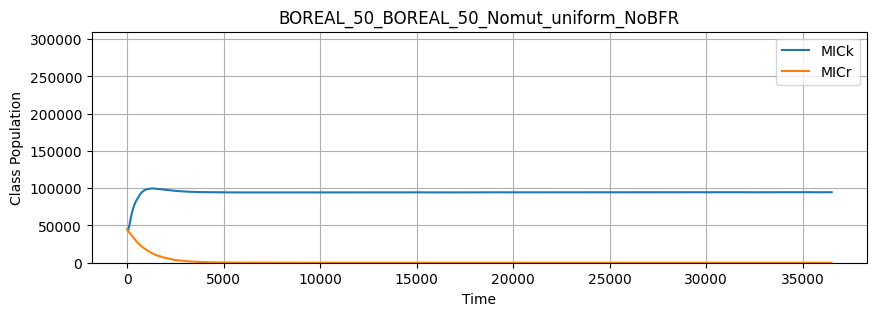

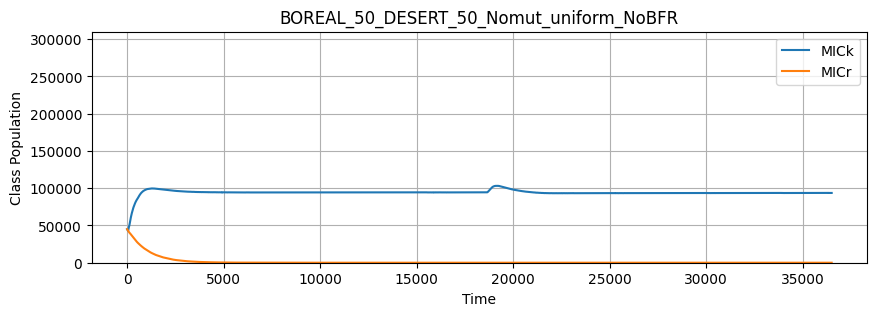

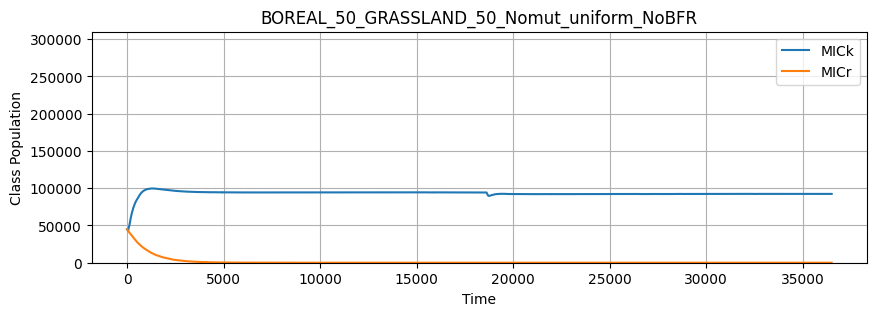

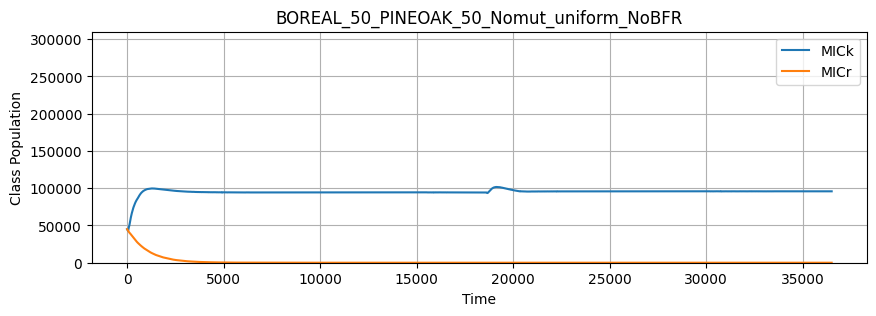

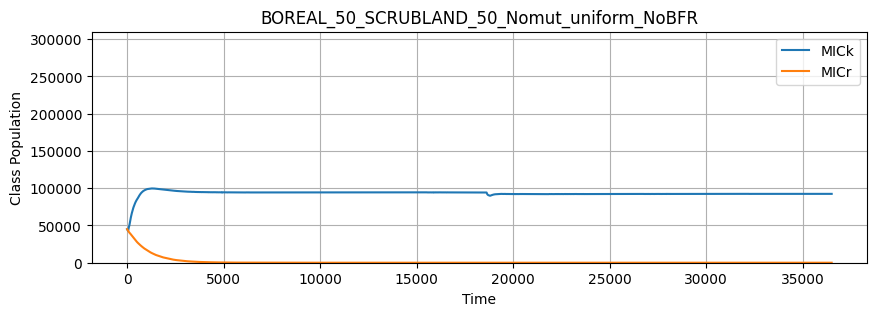

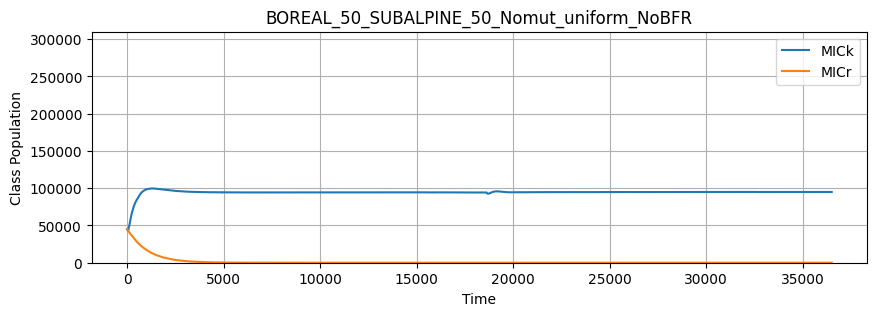

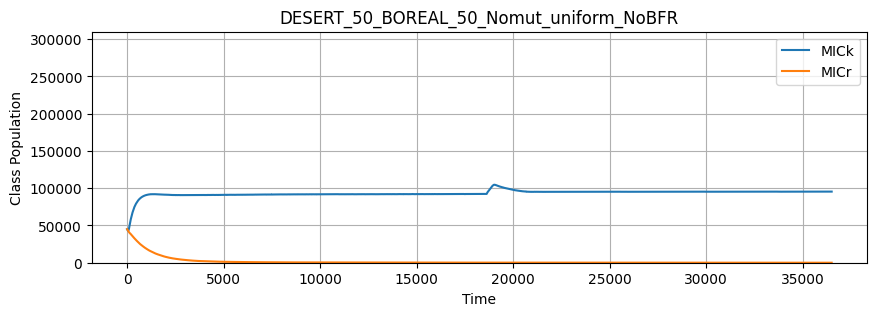

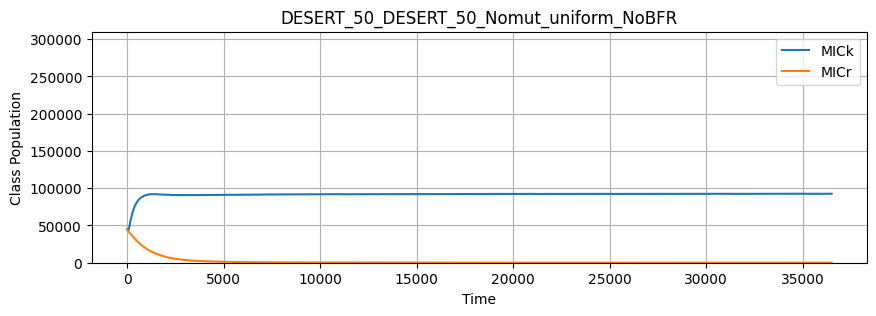

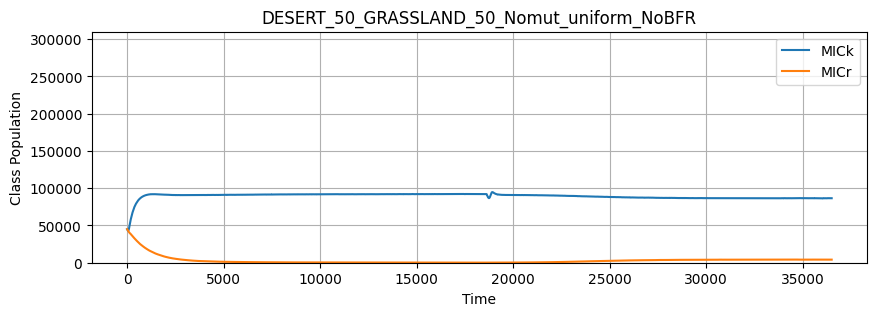

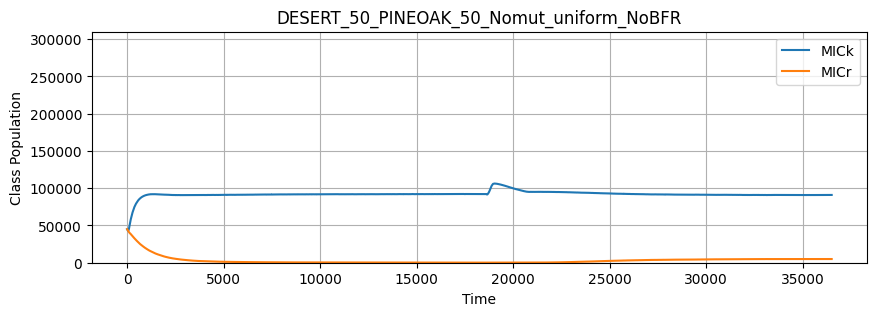

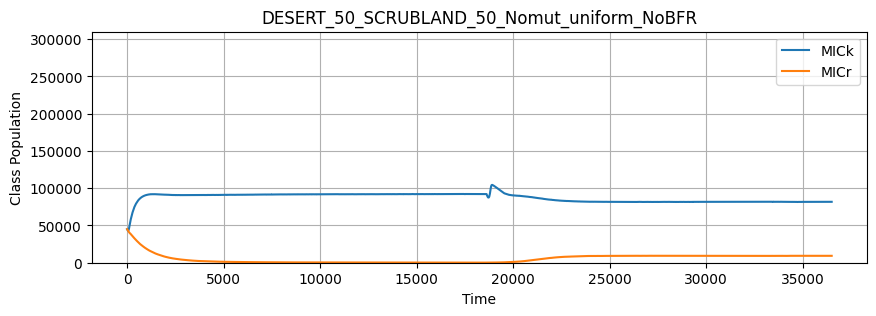

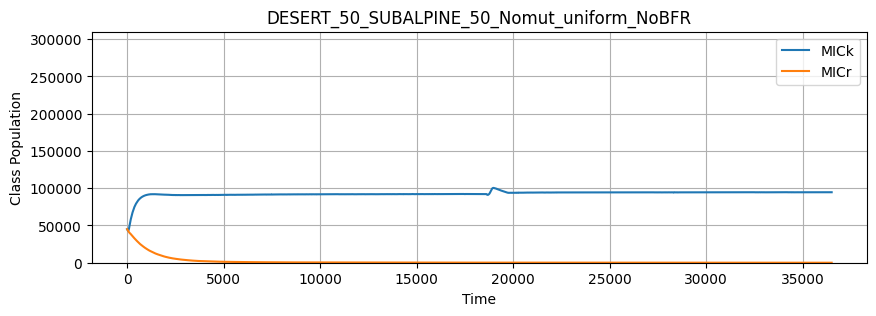

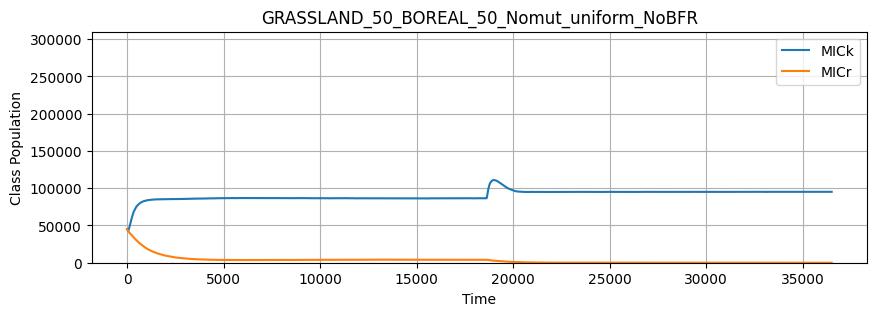

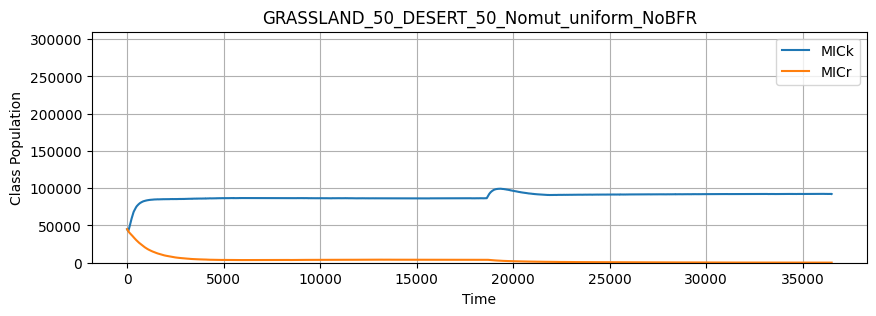

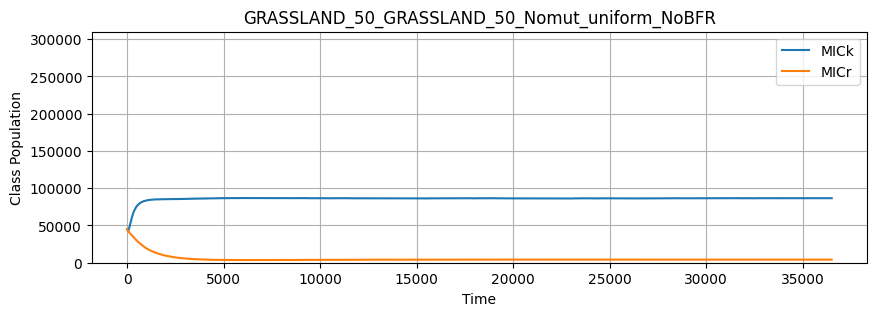

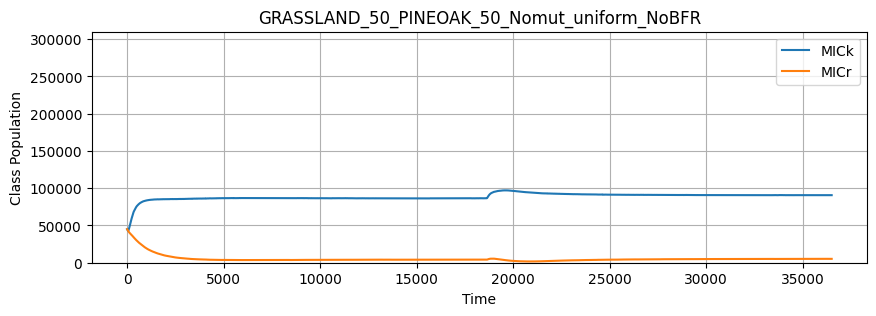

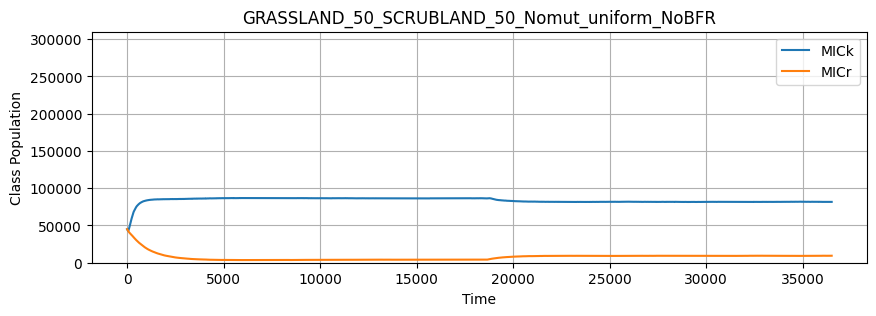

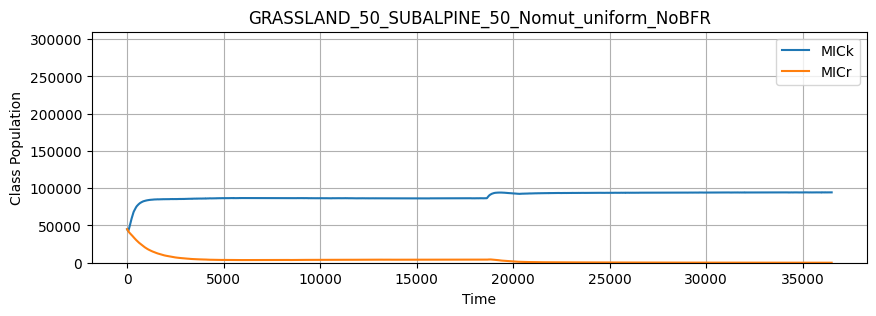

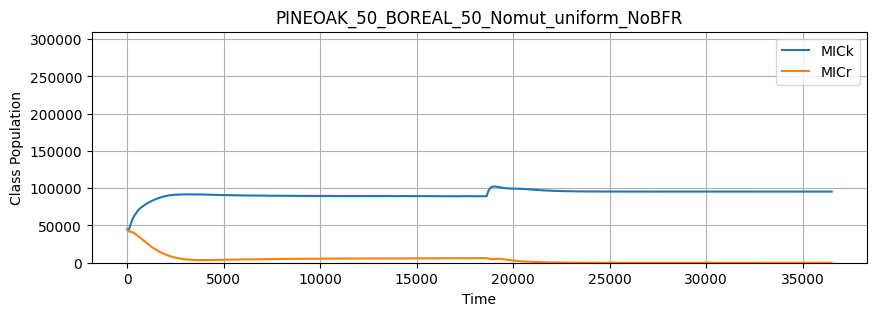

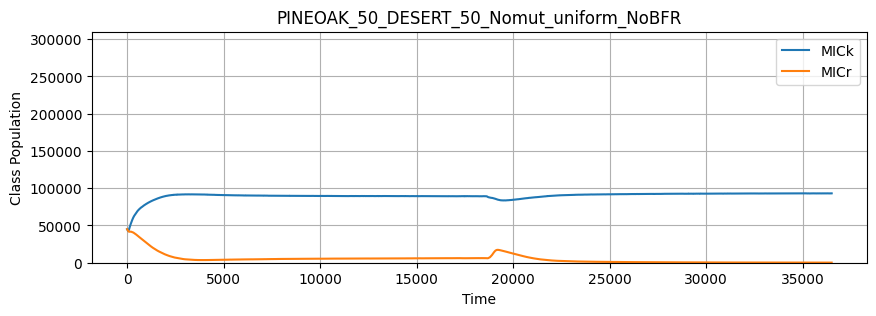

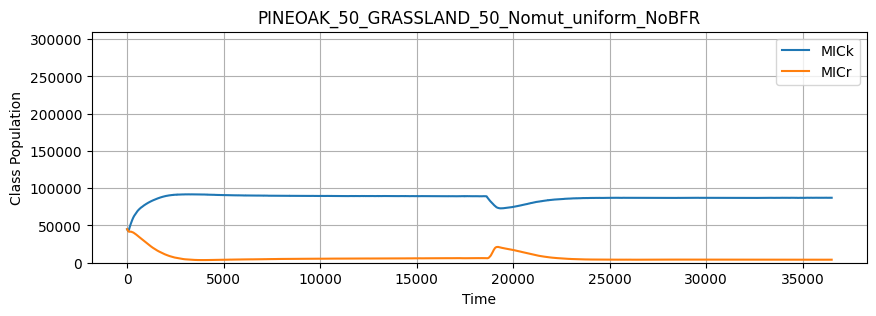

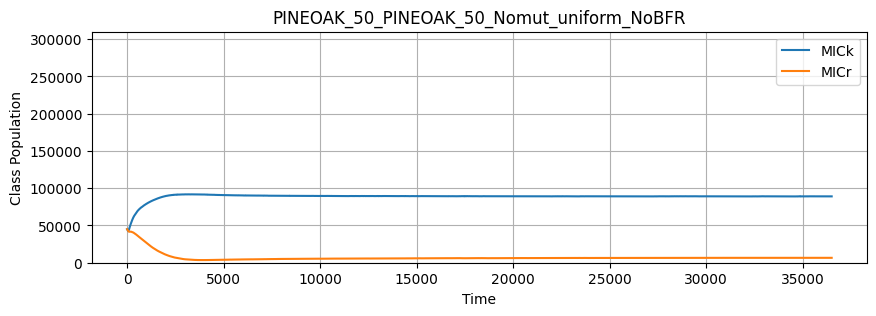

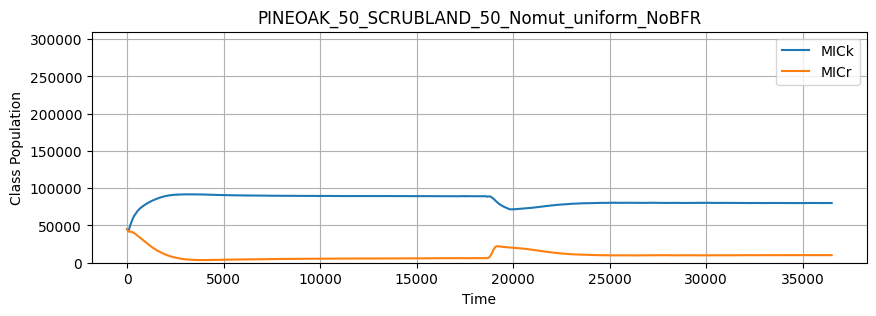

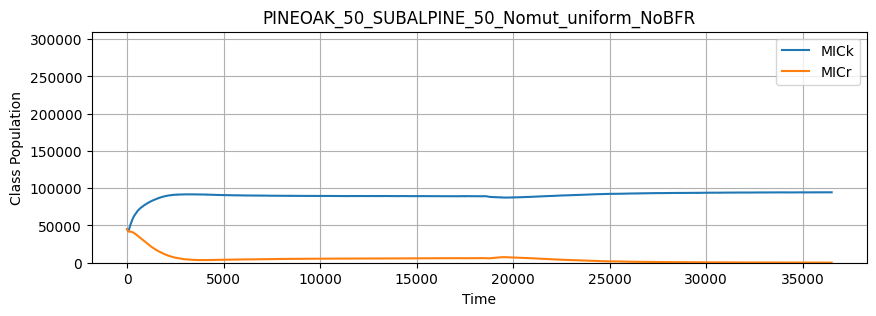

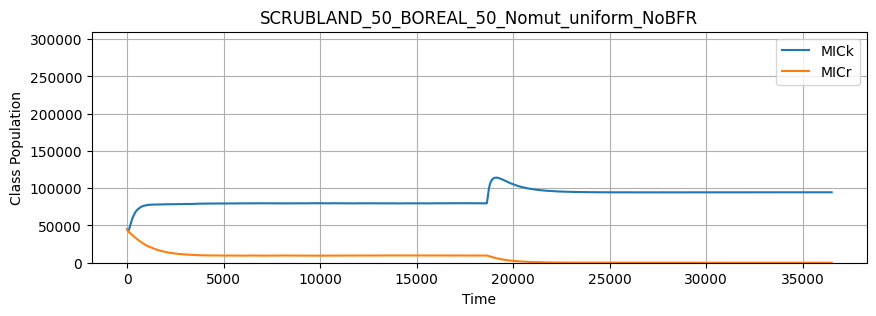

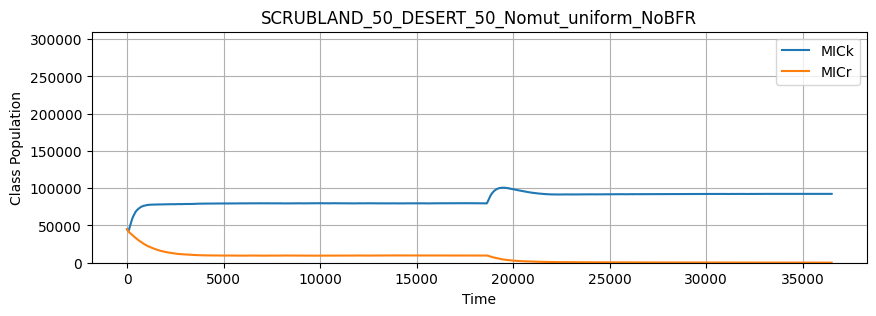

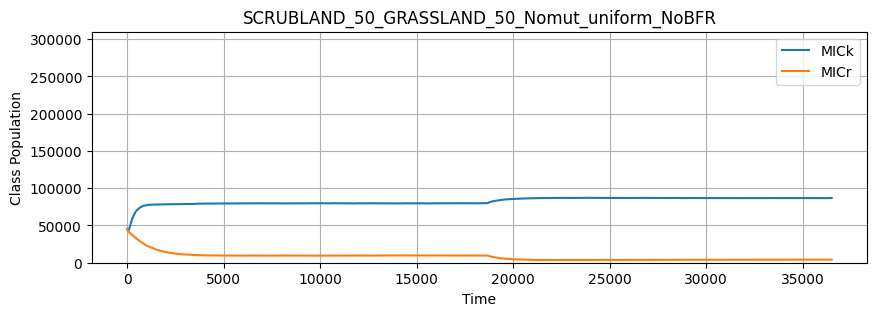

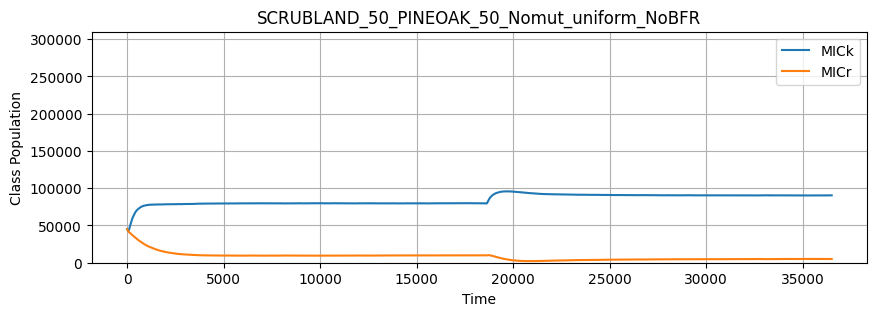

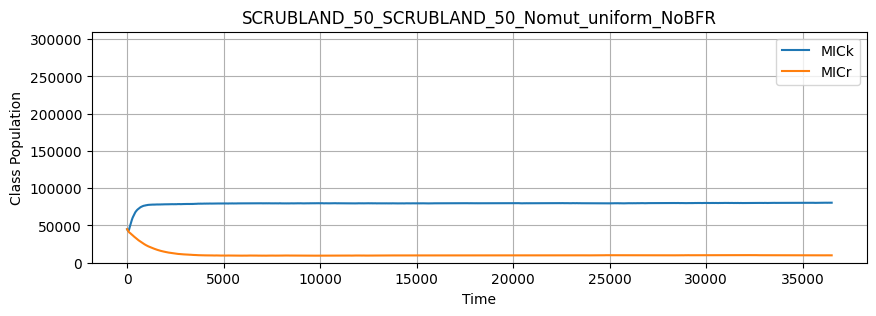

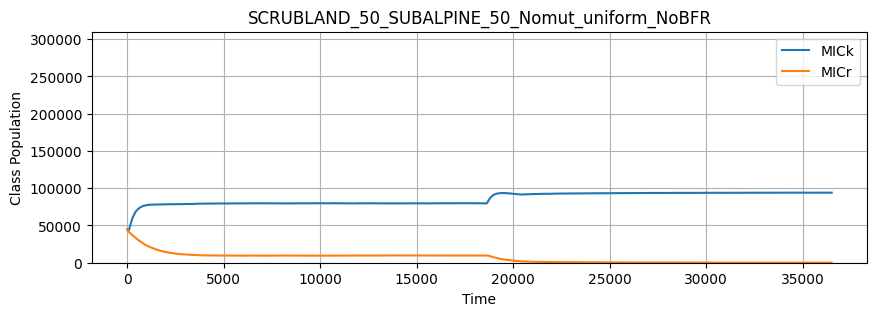

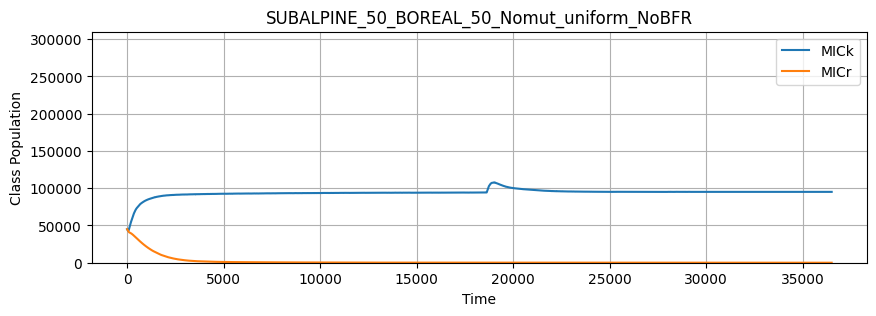

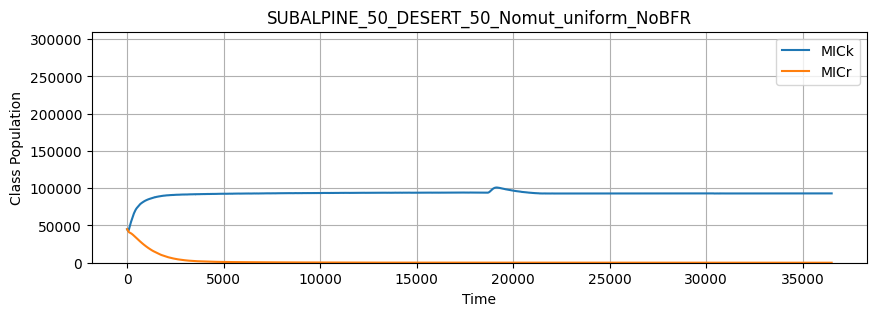

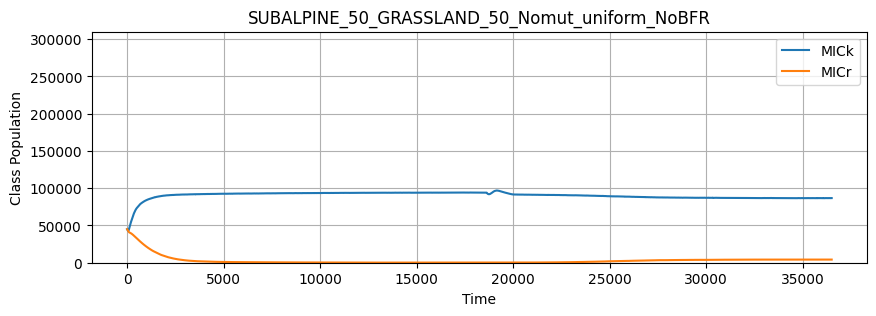

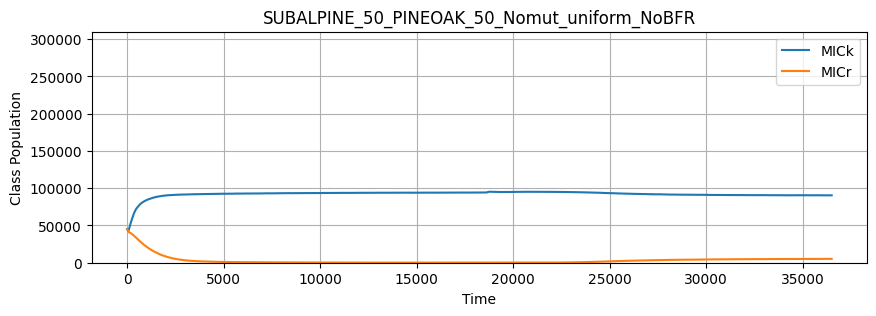

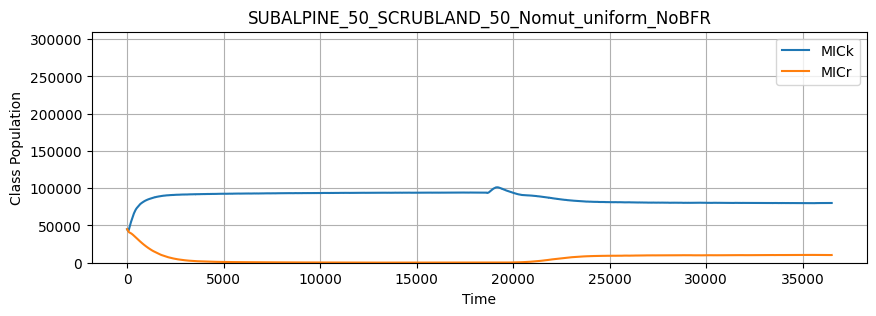

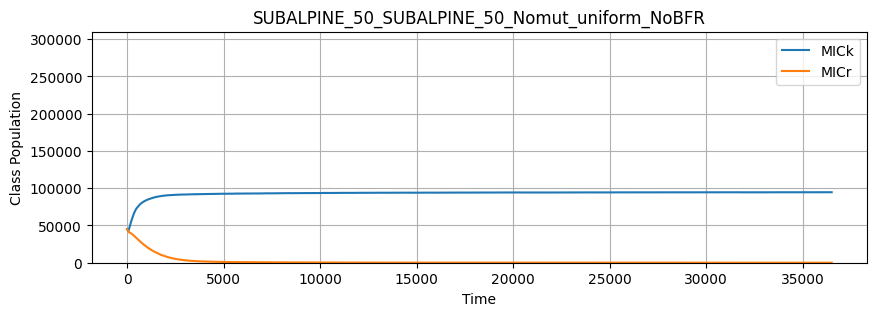

In [11]:
for k,d in dstats['TaxClassesPop'].items():
    fig, ax = plt.subplots(1,1,figsize=(10,3))
    for kk,dd in d.items():
        ax.plot(dd['times'],dd['mean'],label=kk)
    ax.grid()
    ax.set_xlabel('Time')
    ax.set_ylabel('Class Population')
    ax.legend()
    ax.set_title(k)
    ymin,ymax = ax.get_ylim()
    #ax.set_ylim(0,ymax)
    ax.set_ylim(0,310000)

In [10]:
# Equilibres pour chaque litiere 
for k,d in dstats['TaxClassesPop'].items():          # k = litiere 
                                                     # d = tout le tableau avec min, max, mean 
                                                     # pour MICk et MICr (c'est pour ca que len(d)=2)
    for kk,dd in d.items():                          # kk = type de MIC
                                                     # dd = comme d mais par MIC (du coup len(dd)=5 parce que c'est
                                                     # times, min, max, mean, std
        tt,ddd = get_yearly_averages(dd['times'],dd['mean'])
                                                     # tt = times pour chaque litiere et chaque MIC (6x2=12)
                                                     # ddd = average biomass per year (over 100 years) for each litter
                                                     # and MIC (12 total)
        print(k)
        print(kk)
        print(np.round(ddd[99],0))

BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR
MICk
[106994.]
BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR
MICr
[18696.]
BOREAL_50_DESERT_50_Nomut_uniform_NoBFR
MICk
[153254.]
BOREAL_50_DESERT_50_Nomut_uniform_NoBFR
MICr
[0.]
BOREAL_50_GRASSLAND_50_Nomut_uniform_NoBFR
MICk
[124161.]
BOREAL_50_GRASSLAND_50_Nomut_uniform_NoBFR
MICr
[5016.]
BOREAL_50_PINEOAK_50_Nomut_uniform_NoBFR
MICk
[90621.]
BOREAL_50_PINEOAK_50_Nomut_uniform_NoBFR
MICr
[27422.]
BOREAL_50_SCRUBLAND_50_Nomut_uniform_NoBFR
MICk
[99919.]
BOREAL_50_SCRUBLAND_50_Nomut_uniform_NoBFR
MICr
[21698.]
BOREAL_50_SUBALPINE_50_Nomut_uniform_NoBFR
MICk
[107062.]
BOREAL_50_SUBALPINE_50_Nomut_uniform_NoBFR
MICr
[25204.]
DESERT_50_BOREAL_50_Nomut_uniform_NoBFR
MICk
[113761.]
DESERT_50_BOREAL_50_Nomut_uniform_NoBFR
MICr
[7451.]
DESERT_50_DESERT_50_Nomut_uniform_NoBFR
MICk
[140654.]
DESERT_50_DESERT_50_Nomut_uniform_NoBFR
MICr
[16191.]
DESERT_50_GRASSLAND_50_Nomut_uniform_NoBFR
MICk
[126857.]
DESERT_50_GRASSLAND_50_Nomut_uniform_NoBFR
MICr
[12179.]
D

In [11]:
# Effet litiere sur MICk
import pandas as pd
import numpy as np
## Create the dataframe
litter = ['Desert', 'Scrubland', 'Grassland', 'Pineoak', 'Subalpine', 'Boreal']
## Final litter
Desert = pd.Series([230462,230743,236015,230034,230290,248101])
Scrubland = pd.Series([172783,216538,220272,216149,216707,181922])
Grassland = pd.Series([207403,245762,245800,243909,241645,190954])
Pineoak = pd.Series([156733,143043,142749,146475,142428,144775])
Subalpine = pd.Series([163716,155498,153927,153631,151730,168303])
Boreal = pd.Series([186618,131233,131361,176543,176912,175590])
Table_for_plot = pd.concat([Desert,Scrubland,Grassland,Pineoak,Subalpine,Boreal],
                           keys=litter,
                           axis=1)
Table_for_plot.index = litter
print(Table_for_plot)

## BOXPLOT
import seaborn as sns
my_pal = {"Desert":"red", "Scrubland":"darkorange", "Grassland":"g", "Pineoak":"dodgerblue", 
          "Subalpine":"mediumpurple", "Boreal":"indigo"}
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax.set_ylabel('MICk biomass at equilibrium', fontsize=18)
ax.set_xlabel('Phase 2 litter', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(Table_for_plot.index)

           Desert  Scrubland  Grassland  Pineoak  Subalpine  Boreal
Desert     230462     172783     207403   156733     163716  186618
Scrubland  230743     216538     245762   143043     155498  131233
Grassland  236015     220272     245800   142749     153927  131361
Pineoak    230034     216149     243909   146475     153631  176543
Subalpine  230290     216707     241645   142428     151730  176912
Boreal     248101     181922     190954   144775     168303  175590


ModuleNotFoundError: No module named 'seaborn'

In [31]:
# ANOVA
# Create the dataframe for the anova
Table_for_anova = pd.concat([Desert,Scrubland,Grassland,Pineoak,Subalpine,Boreal],axis=1)
print(Table_for_anova)
anov_df_T = {loop_index: pd.DataFrame() for loop_index in range(len(Table_for_anova.columns))}
for loop_index, df in anov_df_T.items():
  anov_col1 = Table_for_anova.iloc[:,loop_index].to_frame().rename(columns={Table_for_anova.columns[loop_index]: "biomass"})
  anov_col2 = pd.DataFrame(Table_for_anova.columns[loop_index], index=Table_for_anova.index, columns=['present_litter'])
  anov_col3 = pd.DataFrame(Table_for_anova.index +1, index=Table_for_anova.index, columns=['past_litter'])
  anov_df_T[loop_index] = pd.concat([anov_col1,anov_col2,anov_col3],axis=1)
# Test 2 by 2
  anov_df = pd.concat([anov_df_T[0],anov_df_T[1]],axis=0,ignore_index=True)
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('biomes ~ present_litter', data=anov_df).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
print(anova_table_1)

        0       1       2       3       4       5
0  230462  172783  207403  156733  163716  186618
1  230743  216538  245762  143043  155498  131233
2  236015  220272  245800  142749  153927  131361
3  230034  216149  243909  146475  153631  176543
4  230290  216707  241645  142428  151730  176912
5  248101  181922  190954  144775  168303  175590


ImportError: cannot import name 'distributions' from 'statsmodels' (/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/__init__.py)

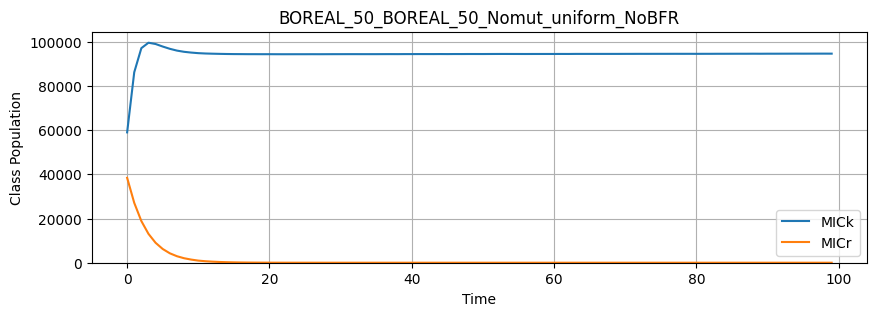

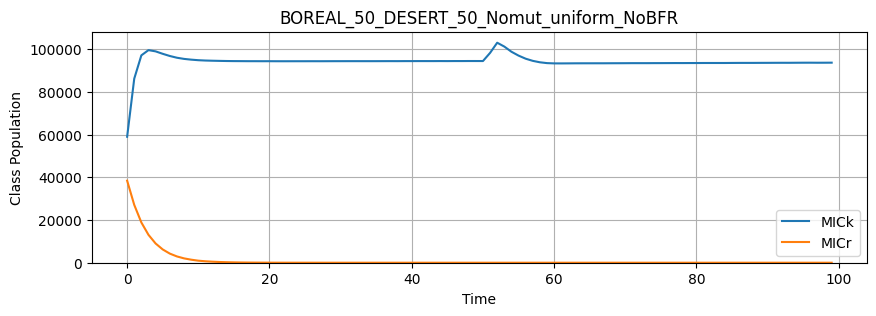

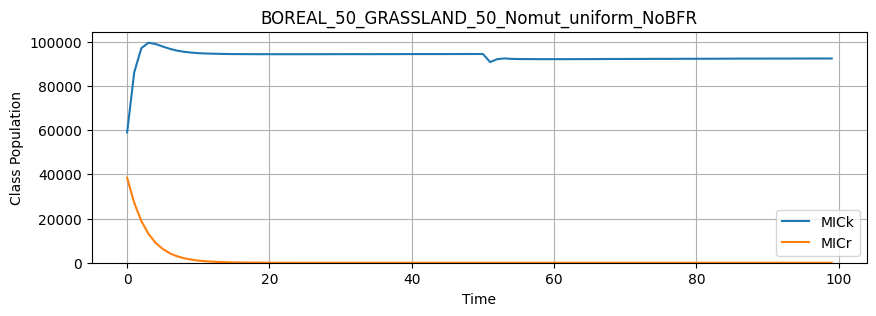

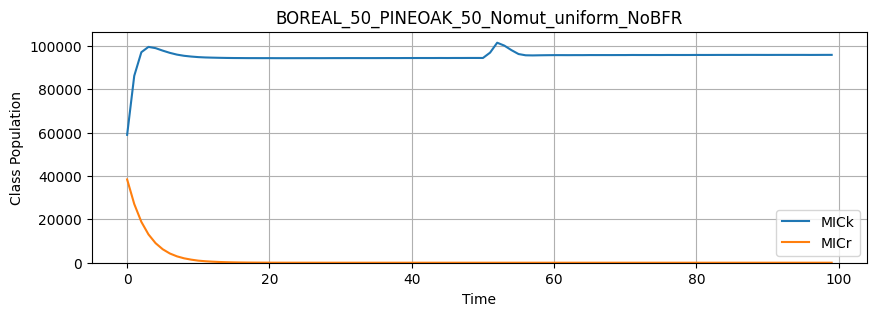

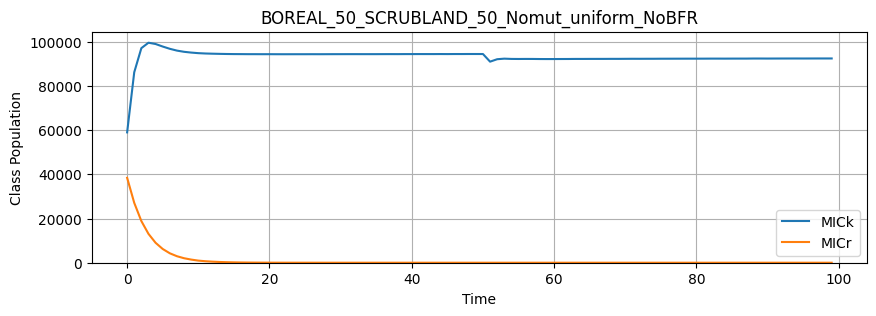

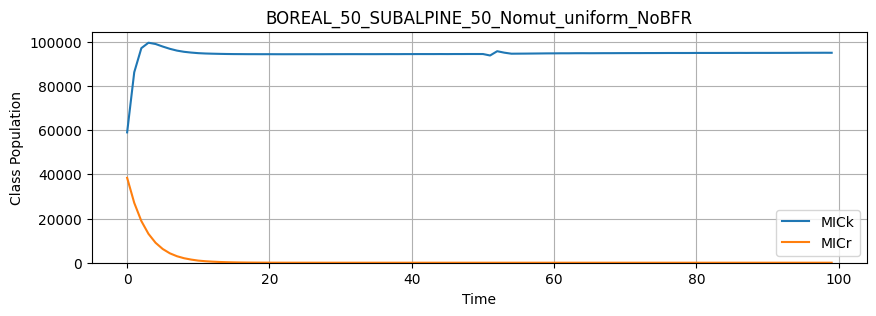

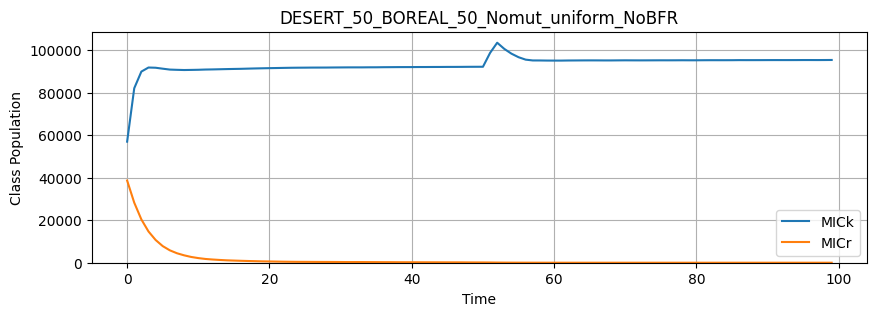

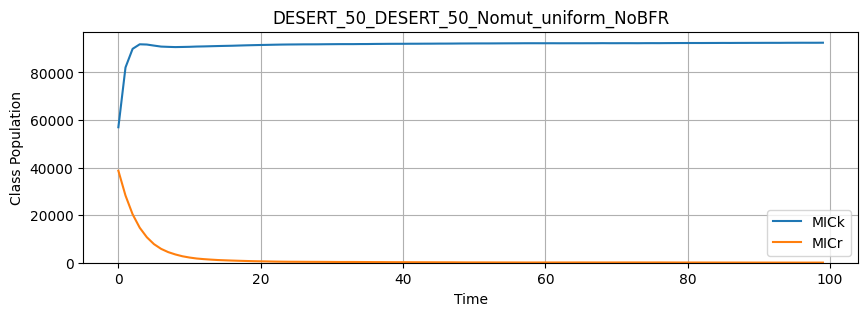

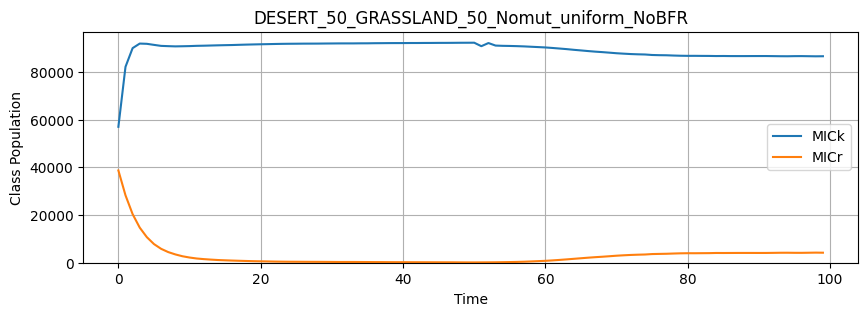

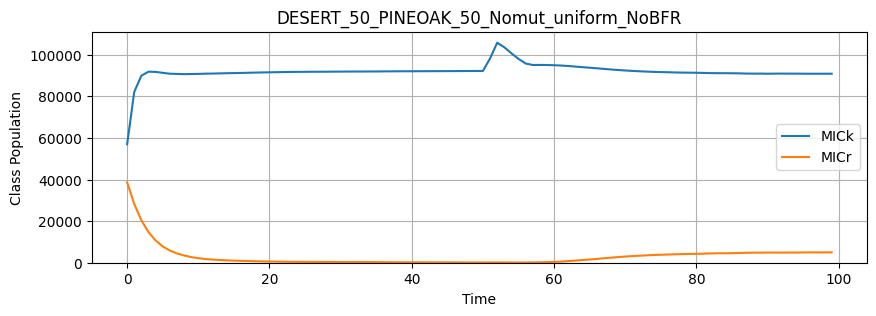

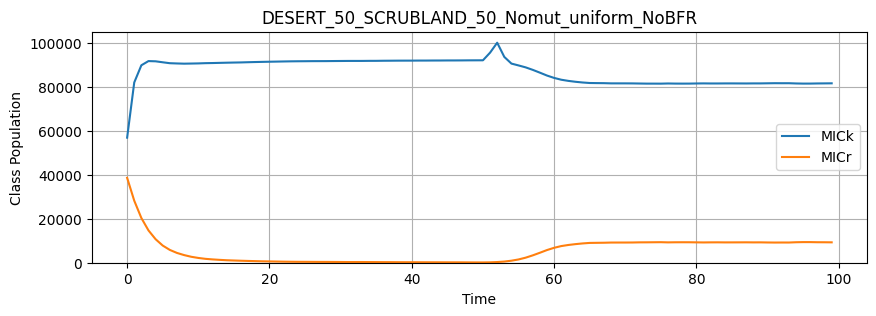

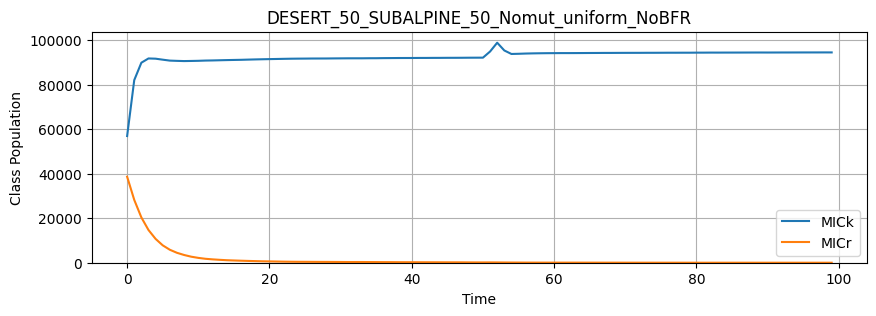

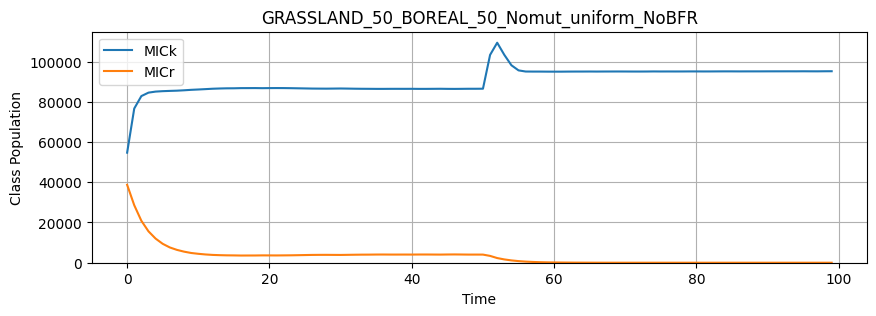

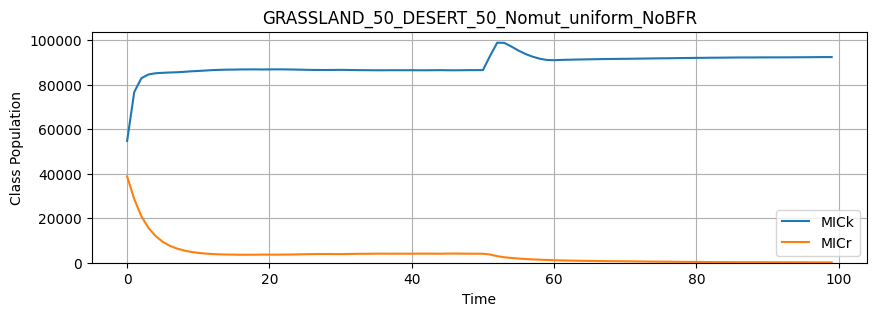

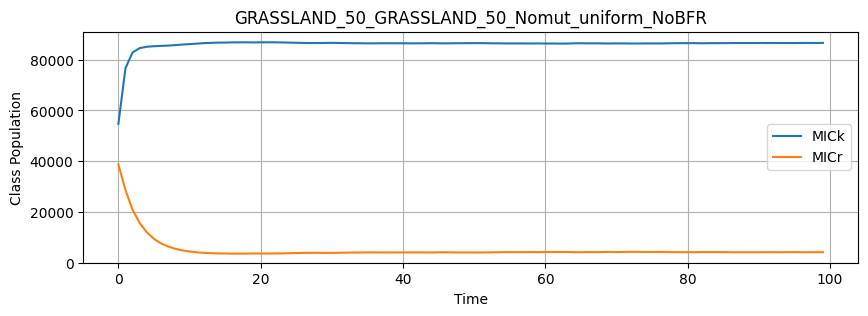

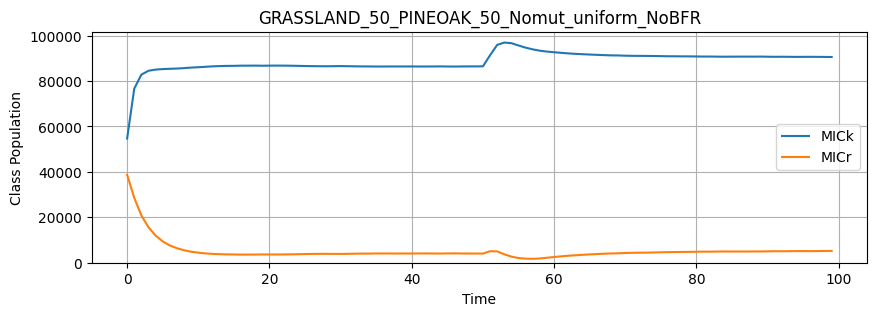

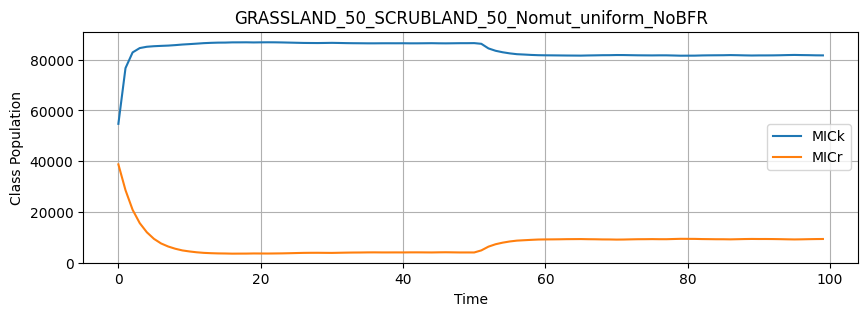

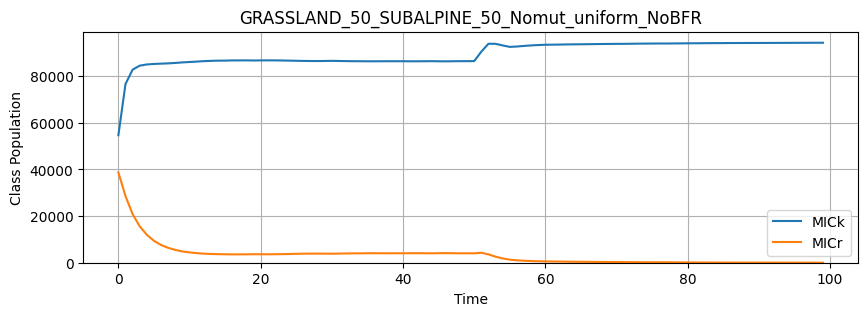

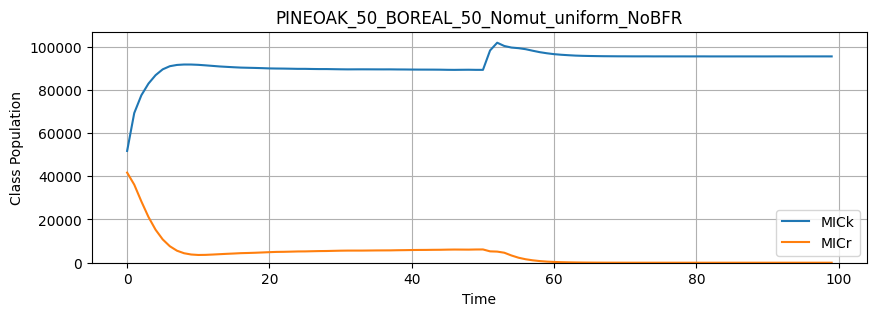

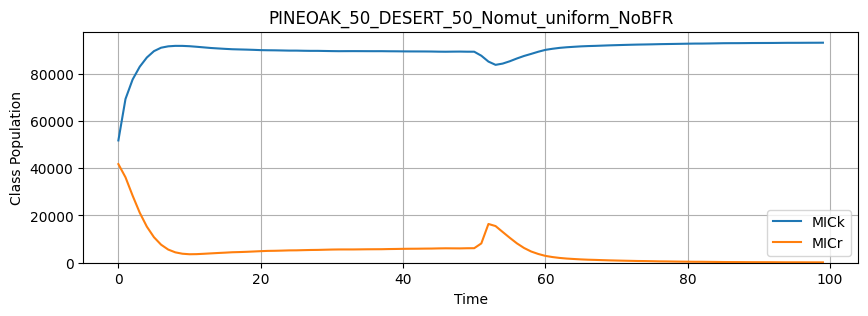

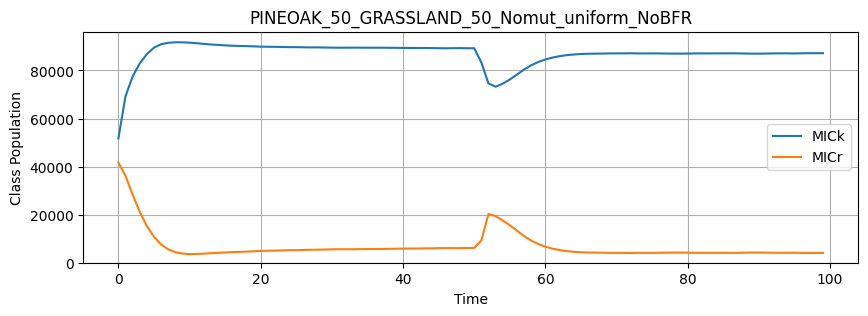

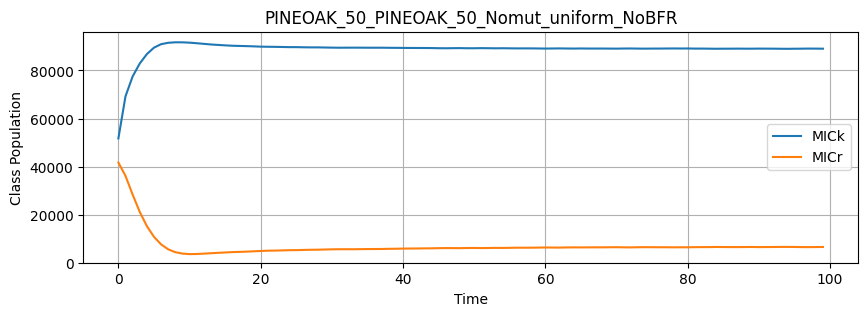

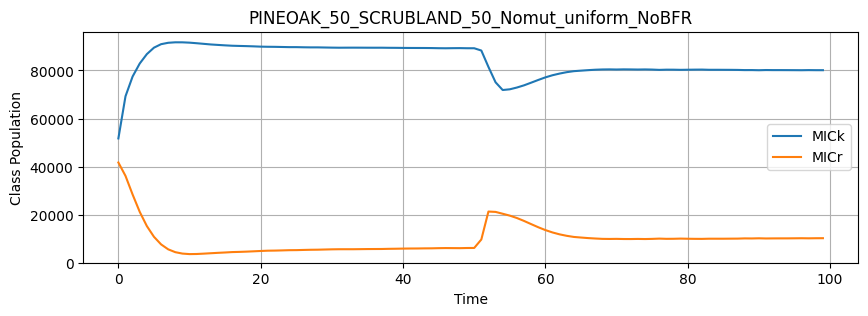

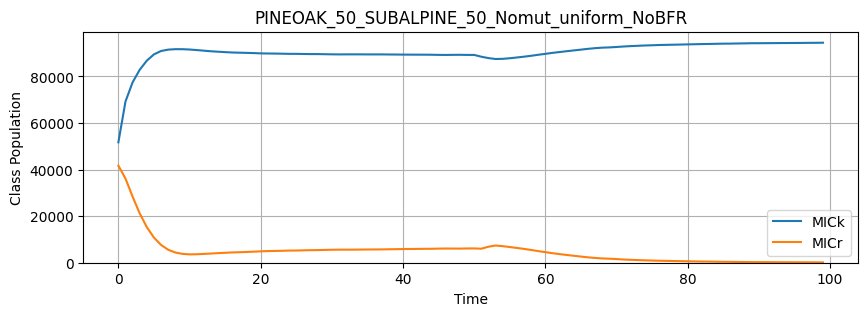

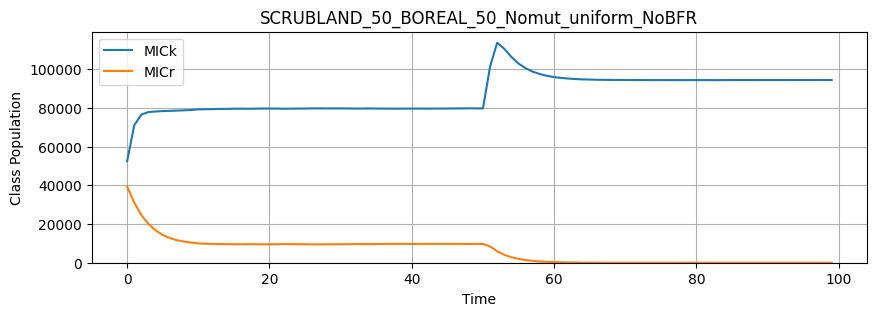

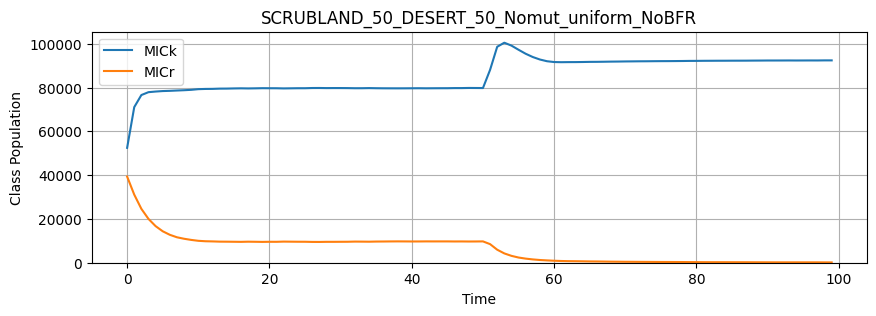

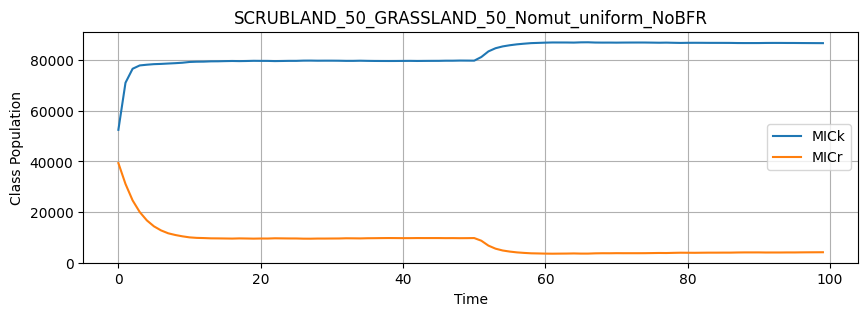

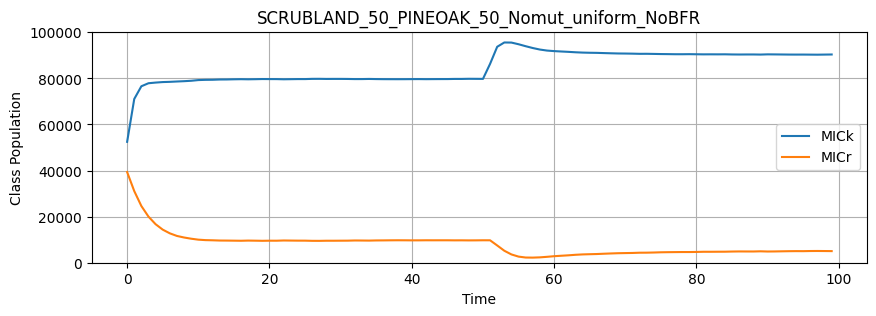

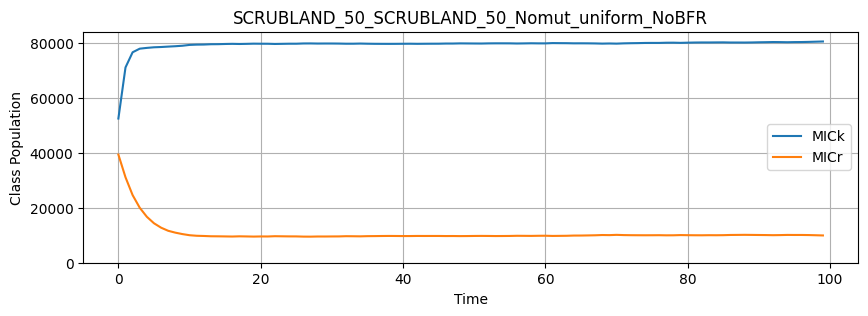

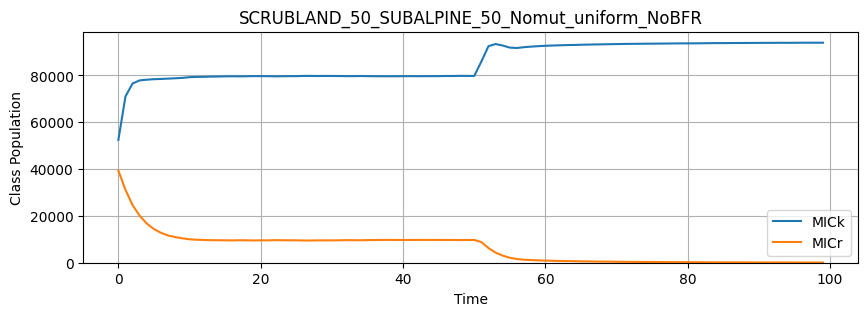

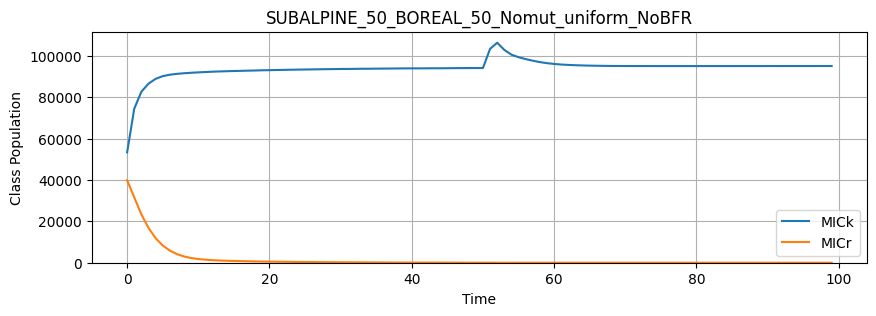

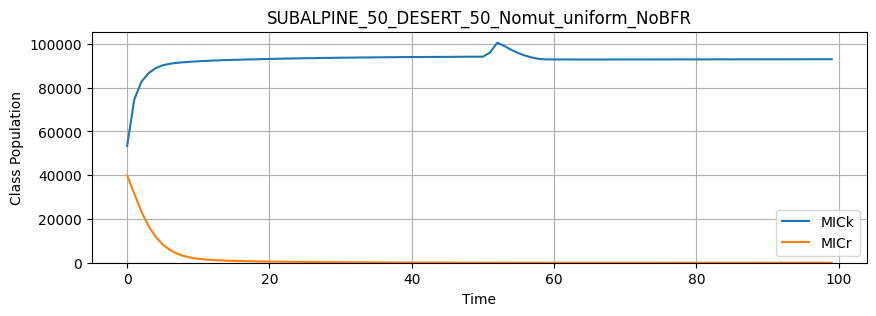

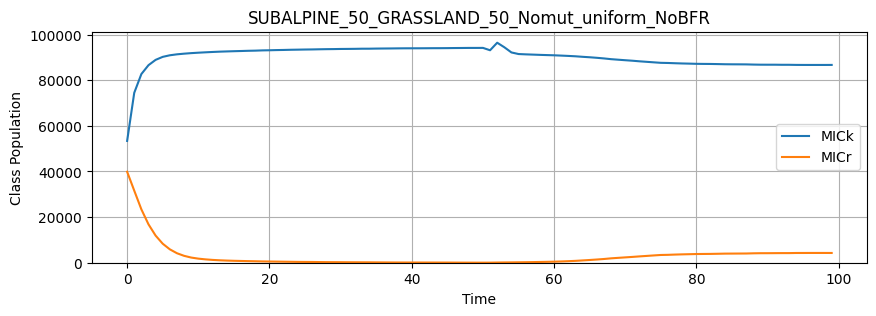

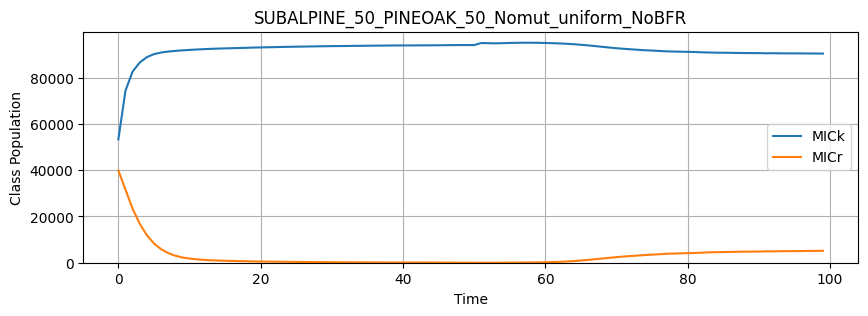

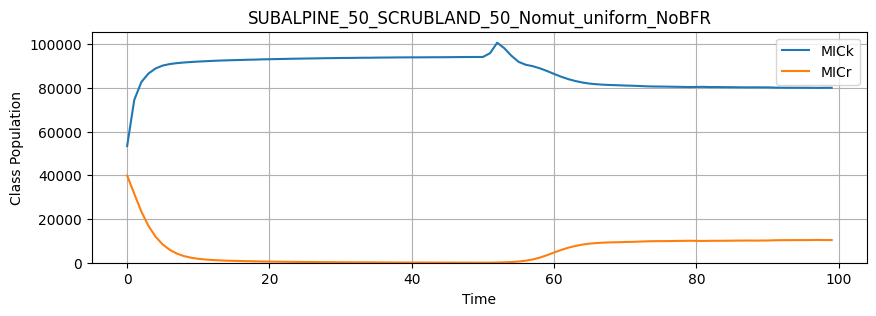

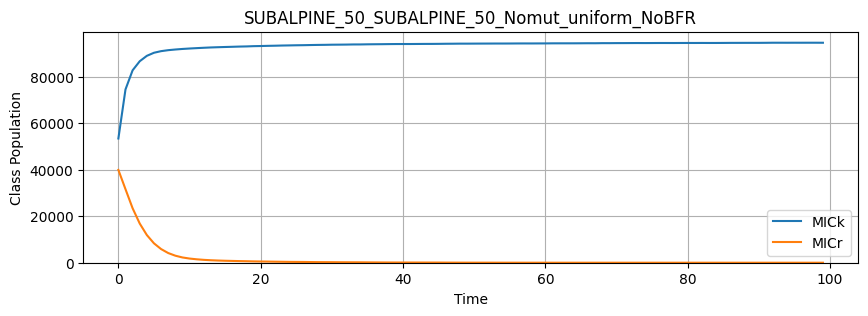

In [12]:
for k,d in dstats['TaxClassesPop'].items():
    fig, ax = plt.subplots(1,1,figsize=(10,3))
    for kk,dd in d.items():
        tt,ddd = get_yearly_averages(dd['times'],dd['mean'])
#         ax.plot(dd['times'],dd['mean'],label=kk)
        ax.plot(tt,ddd,label=kk)
    ax.grid()
    ax.set_xlabel('Time')
    ax.set_ylabel('Class Population')
    ax.legend()
    ax.set_title(k)
    ymin,ymax = ax.get_ylim()
    ax.set_ylim(0,ymax)
    plt.show()
    plt.close(fig)

In [11]:
# Equilibres pour chaque litiere 
for k,d in dstats['TaxClassesPop'].items():          # k = litiere 
                                                     # d = tout le tableau avec min, max, mean 
                                                     # pour MICk et MICr (c'est pour ca que len(d)=2)
    for kk,dd in d.items():                          # kk = type de MIC
                                                     # dd = comme d mais par MIC (du coup len(dd)=5 parce que c'est
                                                     # times, min, max, mean, std
        tt,ddd = get_yearly_averages(dd['times'],dd['mean'])
                                                     # tt = times pour chaque litiere et chaque MIC (6x2=12)
                                                     # ddd = average biomass per year (over 100 years) for each litter
                                                     # and MIC (12 total)
        print(k)
        print(kk)
        print(ddd[99])

BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR
MICk
[175589.56986301]
BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR
MICr
[30481.21369863]
BOREAL_50_DESERT_50_Nomut_uniform_NoBFR
MICk
[248101.31780822]
BOREAL_50_DESERT_50_Nomut_uniform_NoBFR
MICr
[2252.58082192]
BOREAL_50_GRASSLAND_50_Nomut_uniform_NoBFR
MICk
[190954.17534247]
BOREAL_50_GRASSLAND_50_Nomut_uniform_NoBFR
MICr
[26135.8109589]
BOREAL_50_PINEOAK_50_Nomut_uniform_NoBFR
MICk
[144775.25205479]
BOREAL_50_PINEOAK_50_Nomut_uniform_NoBFR
MICr
[48116.57534247]
BOREAL_50_SCRUBLAND_50_Nomut_uniform_NoBFR
MICk
[181922.2]
BOREAL_50_SCRUBLAND_50_Nomut_uniform_NoBFR
MICr
[33497.62739726]
BOREAL_50_SUBALPINE_50_Nomut_uniform_NoBFR
MICk
[168303.04383562]
BOREAL_50_SUBALPINE_50_Nomut_uniform_NoBFR
MICr
[47011.38630137]
DESERT_50_BOREAL_50_Nomut_uniform_NoBFR
MICk
[186617.53972603]
DESERT_50_BOREAL_50_Nomut_uniform_NoBFR
MICr
[12190.0739726]
DESERT_50_DESERT_50_Nomut_uniform_NoBFR
MICk
[230461.94246575]
DESERT_50_DESERT_50_Nomut_uniform_NoBFR
MICr
[26755.

In [ ]:
# Effet MIC
import pandas as pd
import numpy as np
## Create the dataframe
litter = ['Desert', 'Scrubland', 'Grassland', 'PineOak', 'Subalpine', 'Boreal']
MICr_eq = pd.Series(np.round([26755.18630137, 50534.82191781, 23829.84109589, 54529.26849315, 64810.12876712, 30481.21369863], decimals=1))
MICk_eq = pd.Series(np.round([230461.94246575, 216537.54246575, 245799.51506849, 146474.83013699, 151729.85205479, 175589.56986301], decimals=1))
Table_for_plot = pd.concat([MICr_eq,MICk_eq], keys=['MICr_eq', 'MICk_eq'],axis=1)
Table_for_plot.index = litter
print(Table_for_plot)

## BOXPLOT
import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("whitegrid")
ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot))
ax.set_ylabel('Biomass at equilibrium')
ax.set_xlabel('')

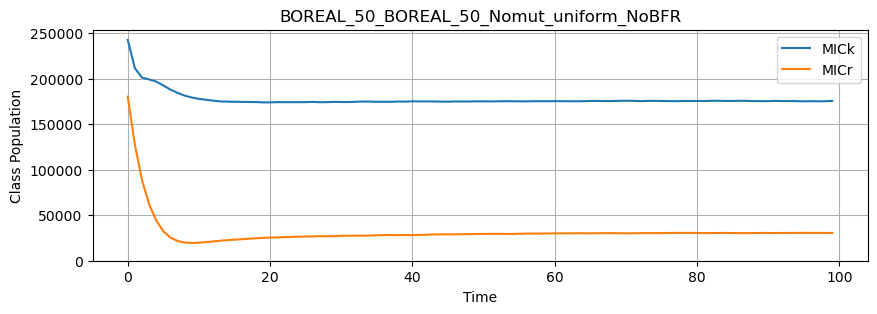

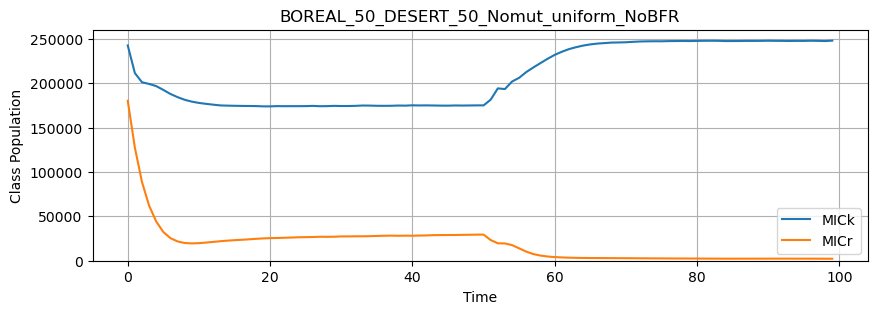

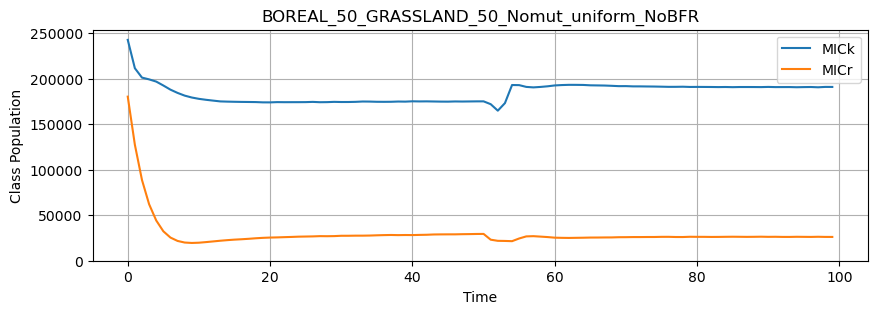

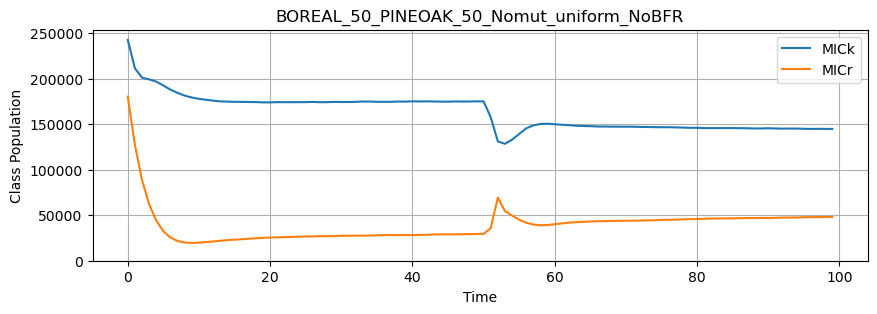

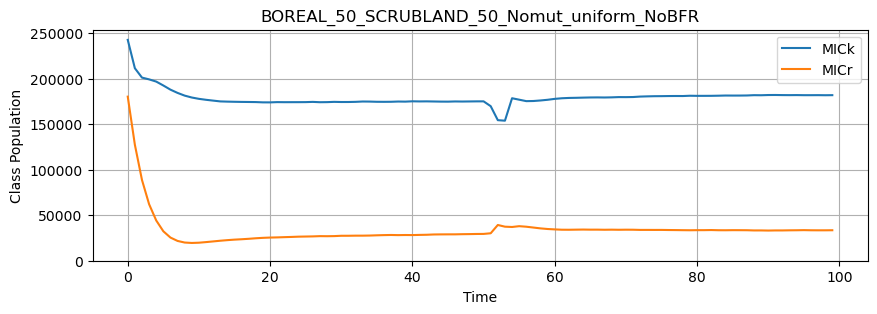

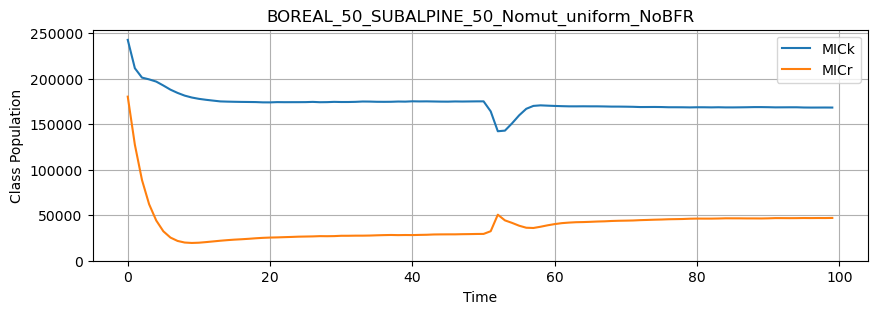

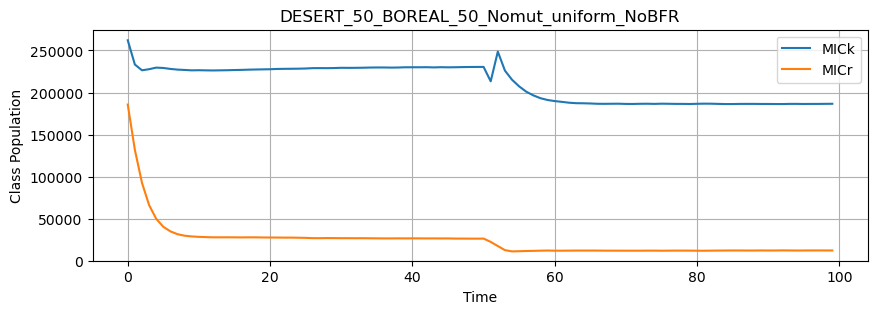

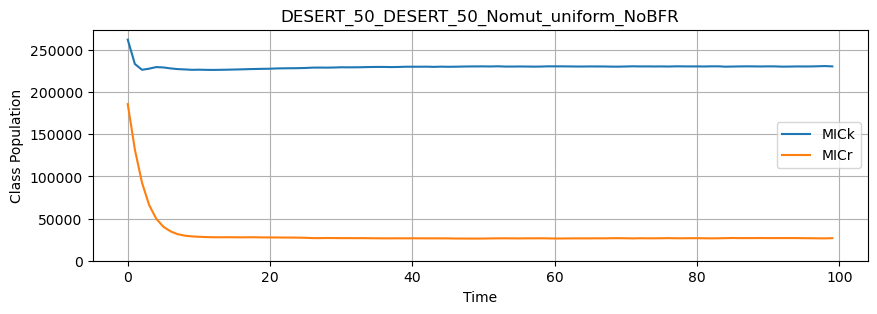

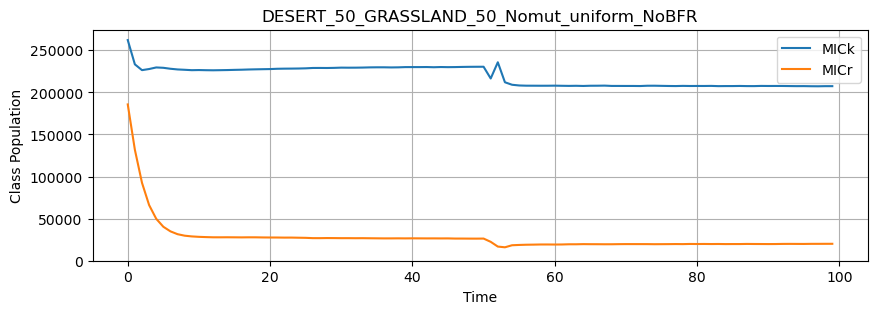

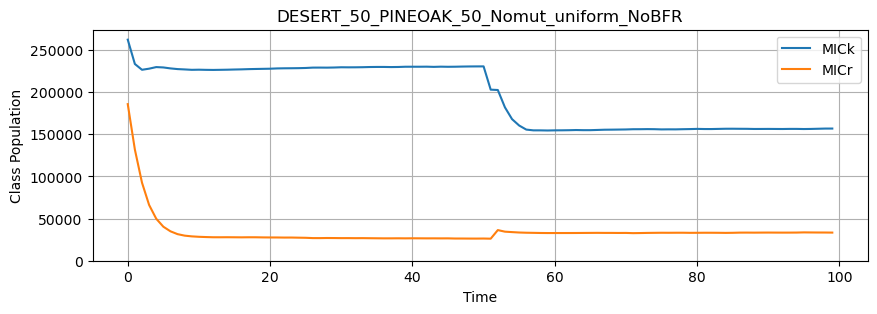

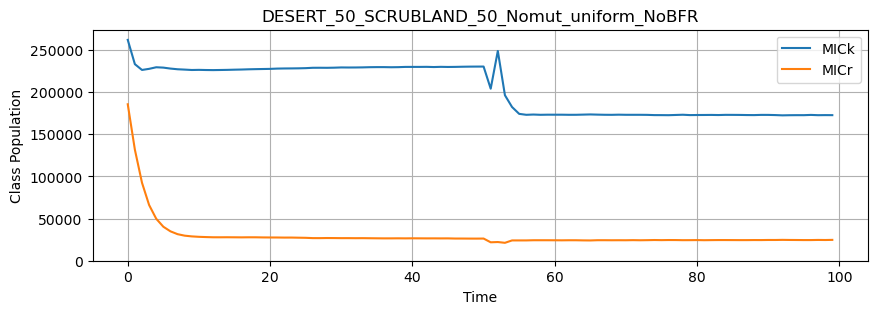

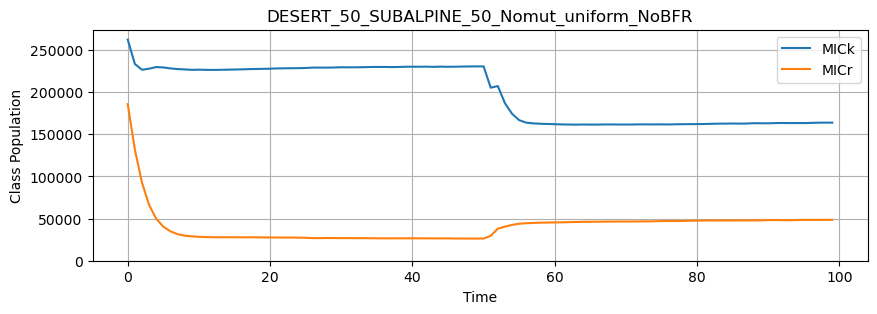

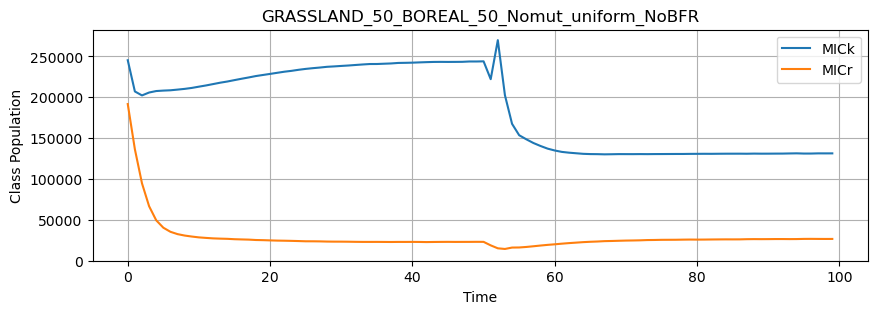

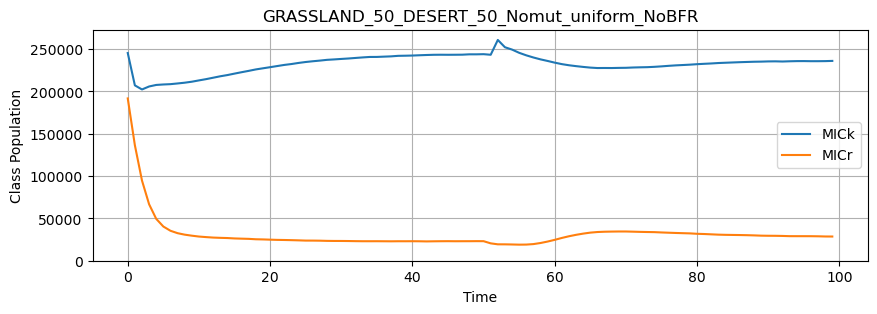

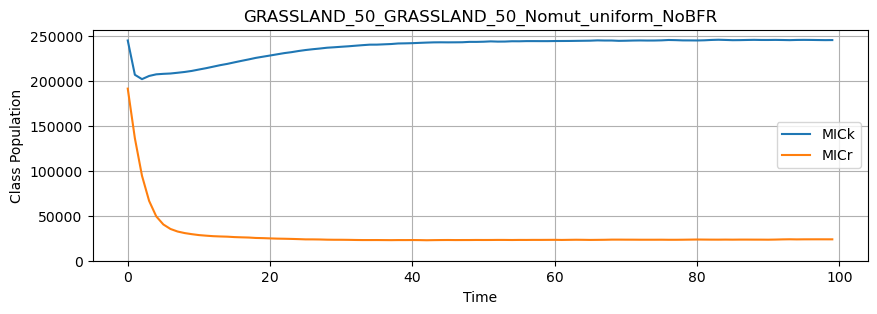

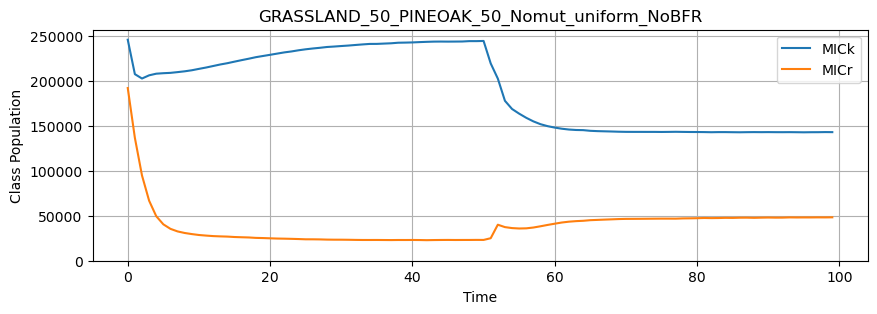

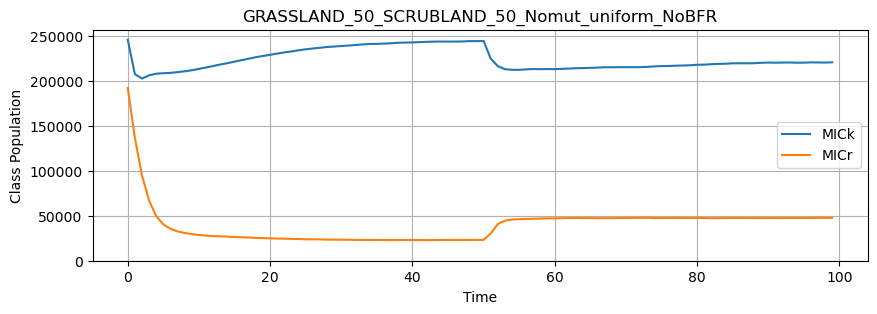

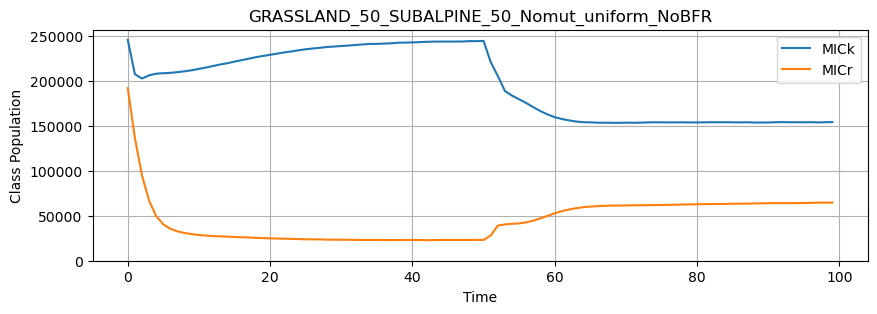

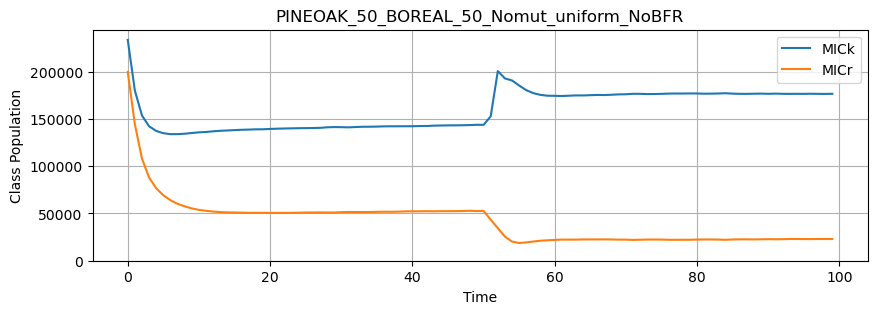

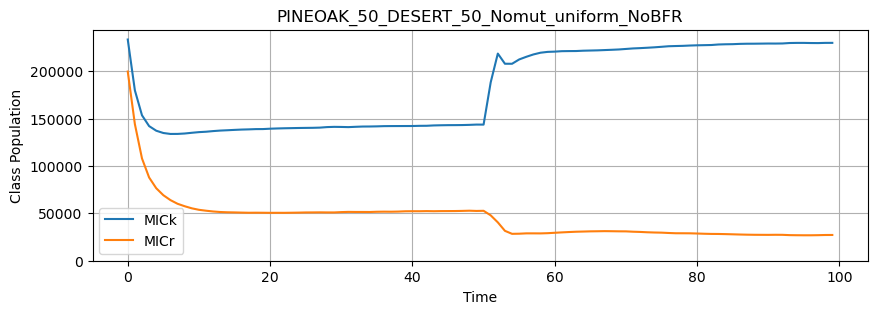

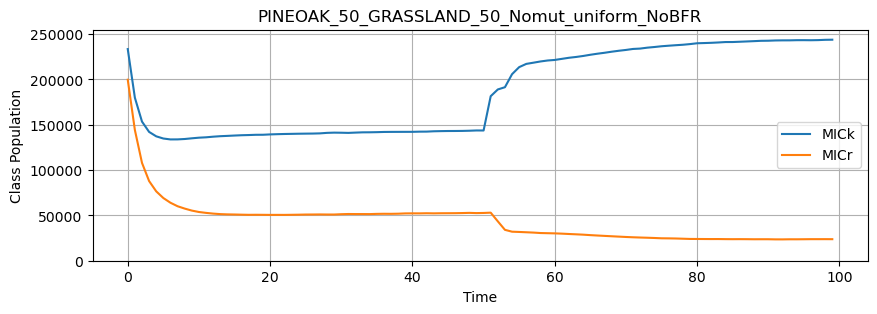

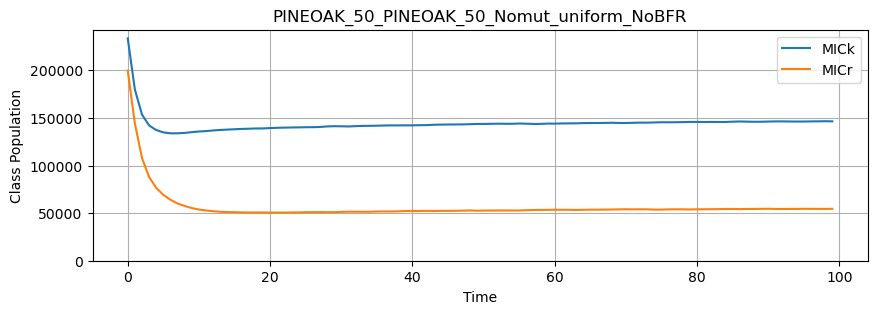

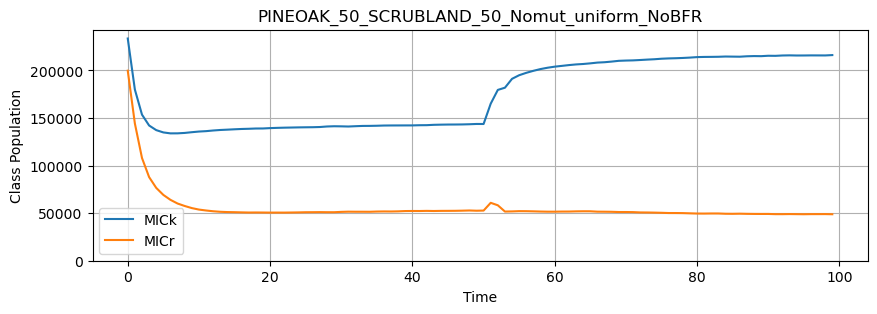

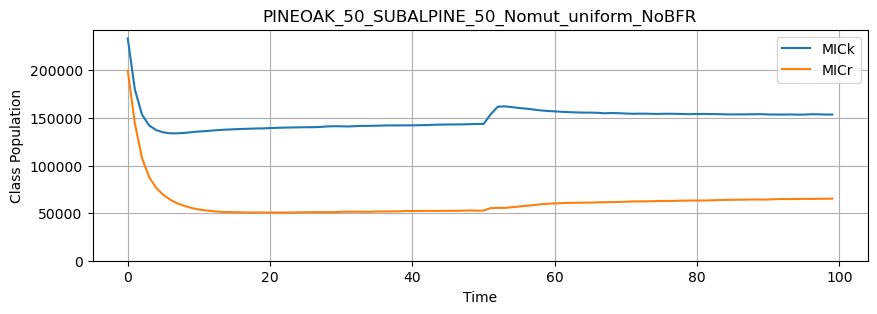

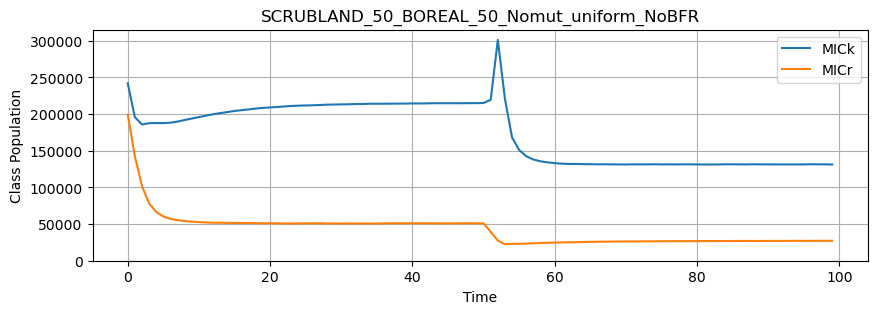

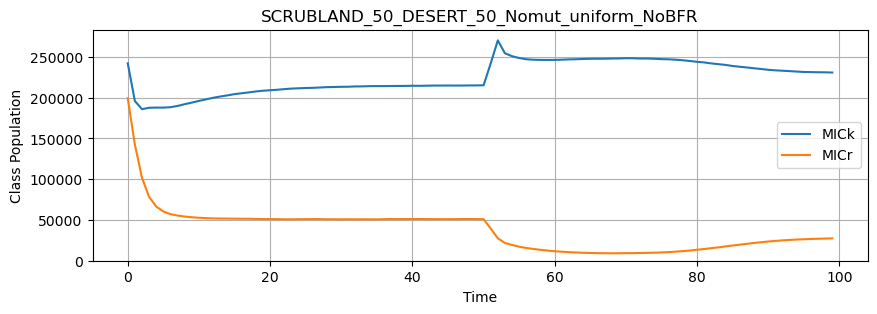

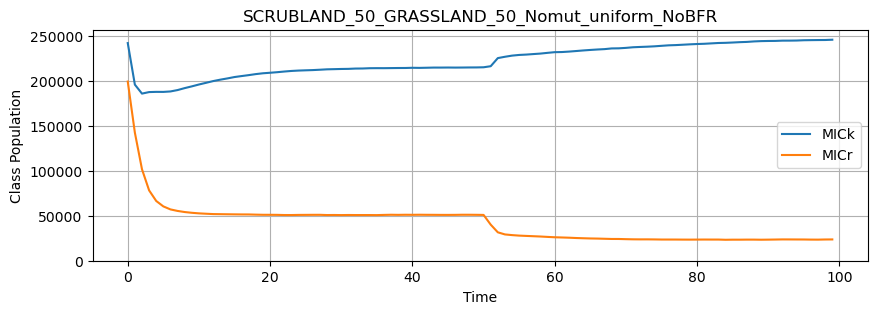

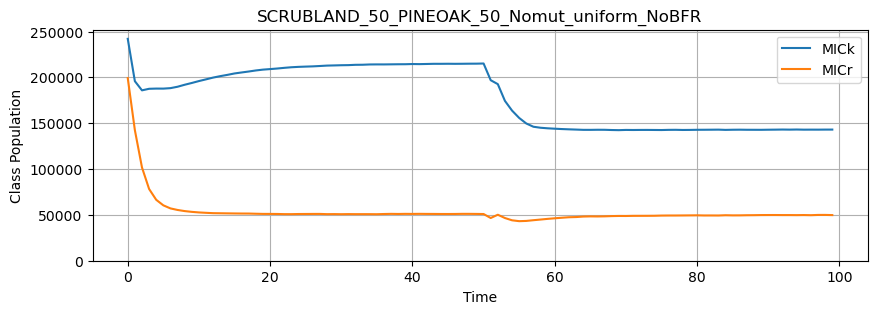

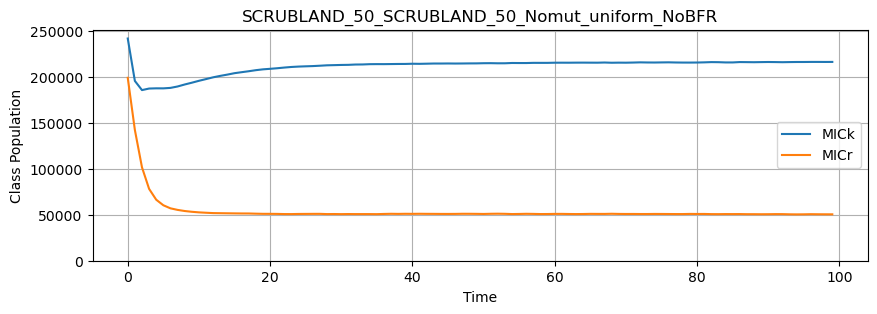

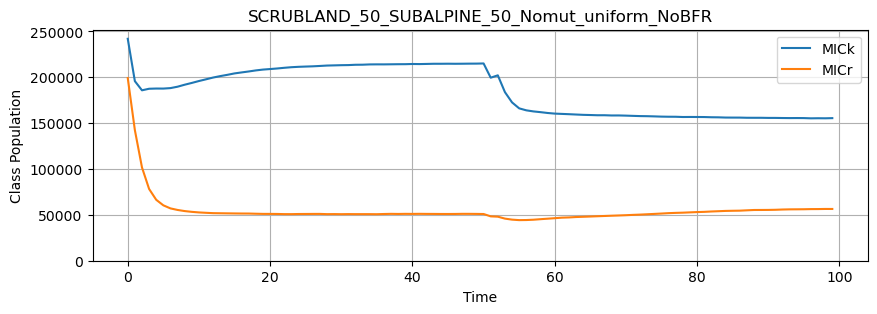

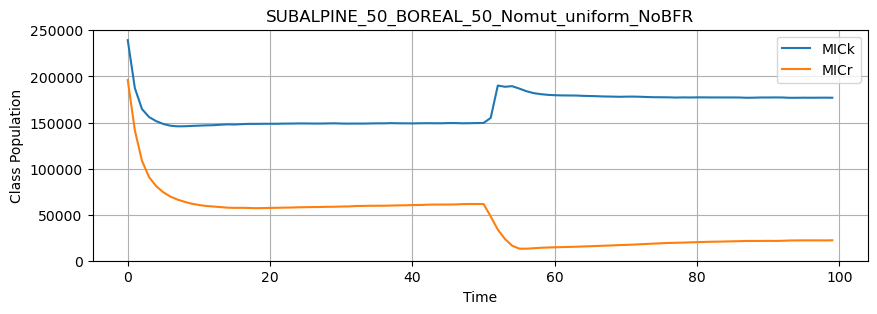

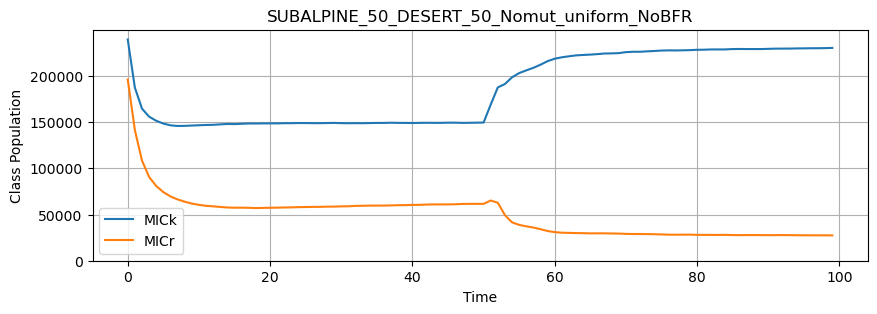

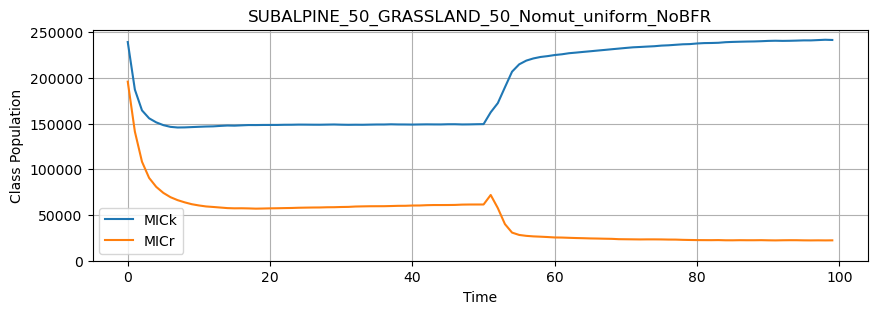

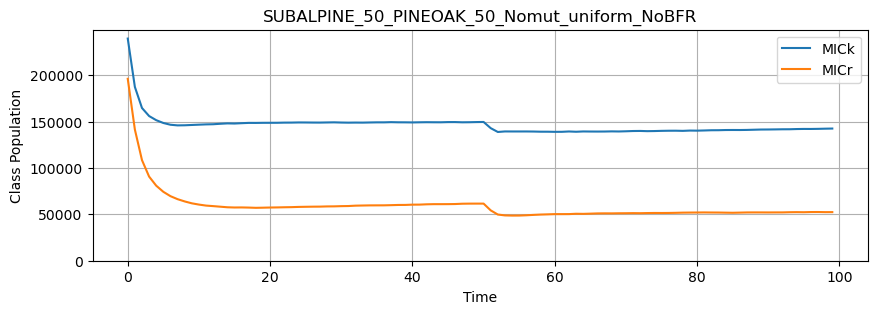

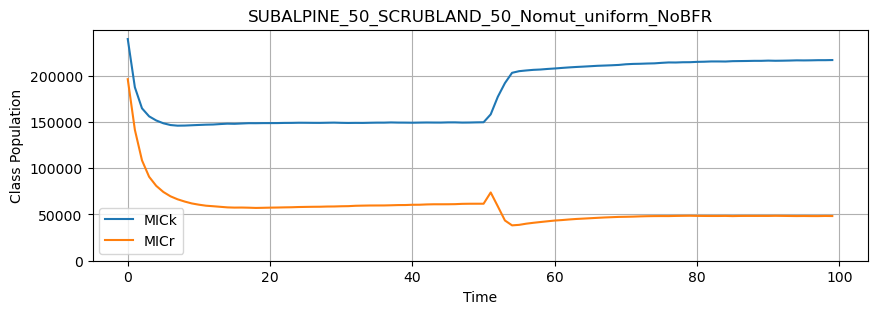

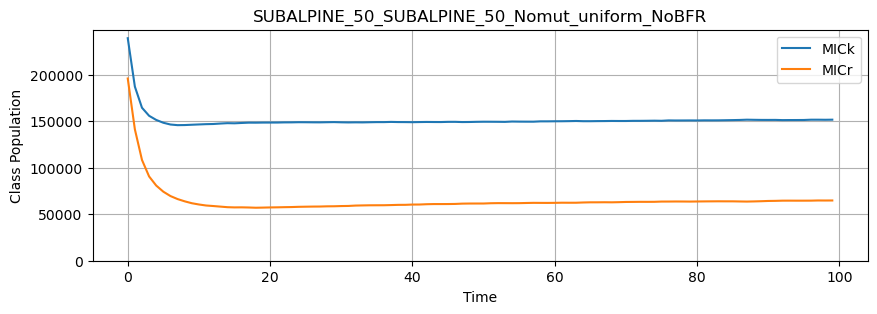

In [12]:
for k,d in dstats['TaxClassesPop'].items():
    fig, ax = plt.subplots(1,1,figsize=(10,3))
    for kk,dd in d.items():
        tt,ddd = get_yearly_averages(dd['times'],dd['mean'])
#         ax.plot(dd['times'],dd['mean'],label=kk)
        ax.plot(tt,ddd,label=kk)
    ax.grid()
    ax.set_xlabel('Time')
    ax.set_ylabel('Class Population')
    ax.legend()
    ax.set_title(k)
    ymin,ymax = ax.get_ylim()
    ax.set_ylim(0,ymax)
    plt.show()
    plt.close(fig)

BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR


/var/folders/11/xm4_hc_91y52yf7jwn_svxcm0000gp/T/ipykernel_85586/408471040.py:11: RuntimeWarning: invalid value encountered in divide
  dlog = df/f[0:99]


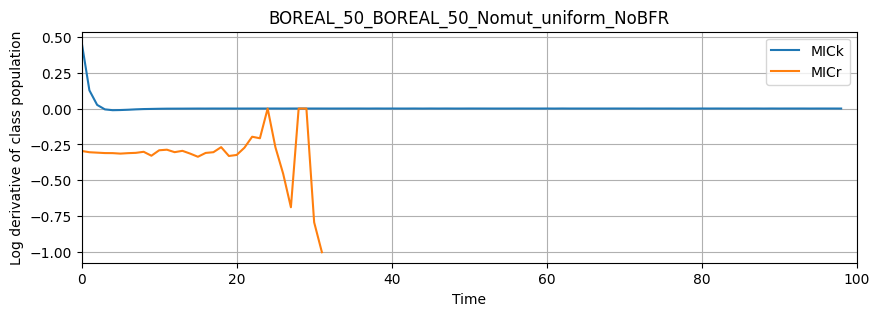

BOREAL_50_DESERT_50_Nomut_uniform_NoBFR


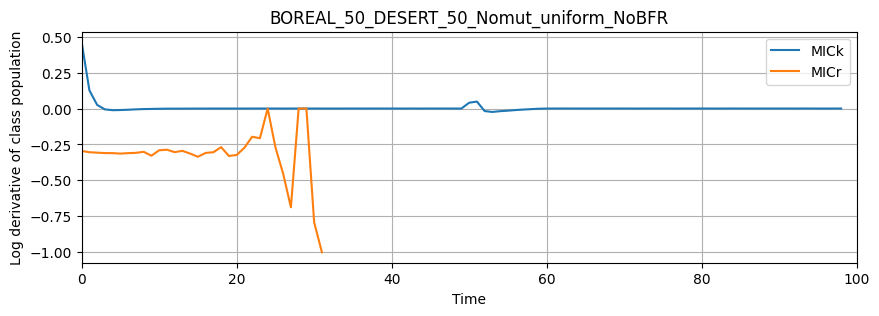

BOREAL_50_GRASSLAND_50_Nomut_uniform_NoBFR


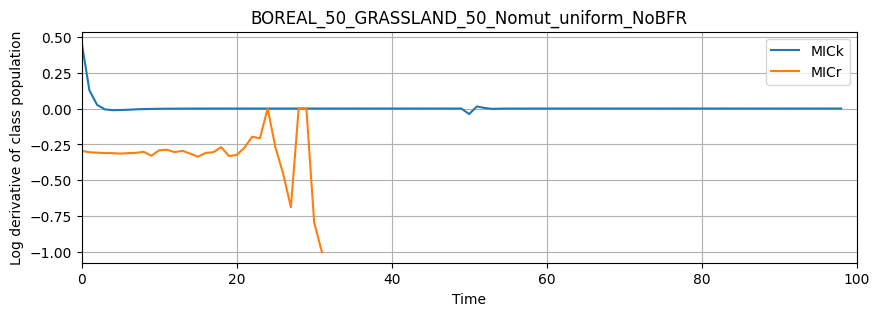

BOREAL_50_PINEOAK_50_Nomut_uniform_NoBFR


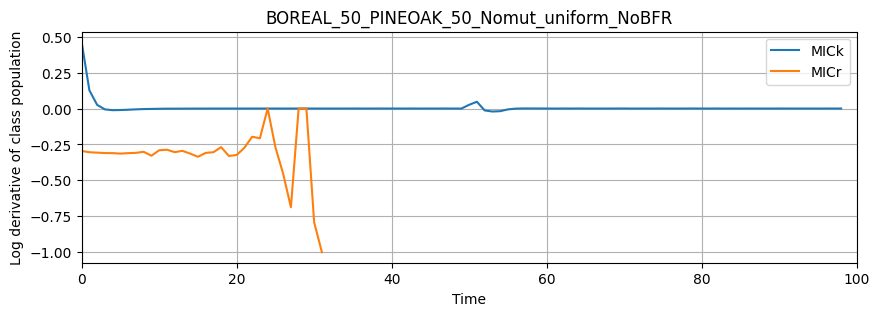

BOREAL_50_SCRUBLAND_50_Nomut_uniform_NoBFR


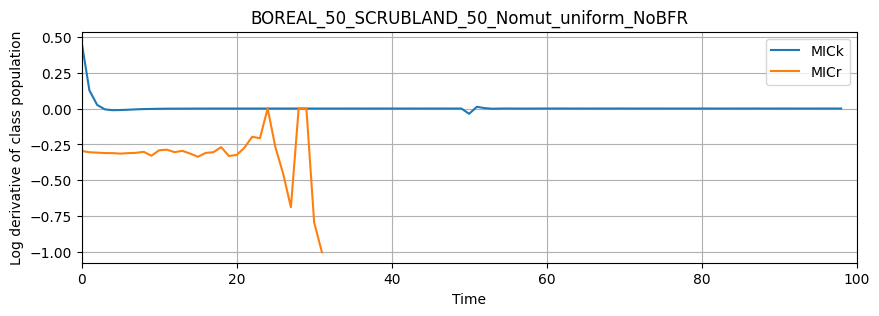

BOREAL_50_SUBALPINE_50_Nomut_uniform_NoBFR


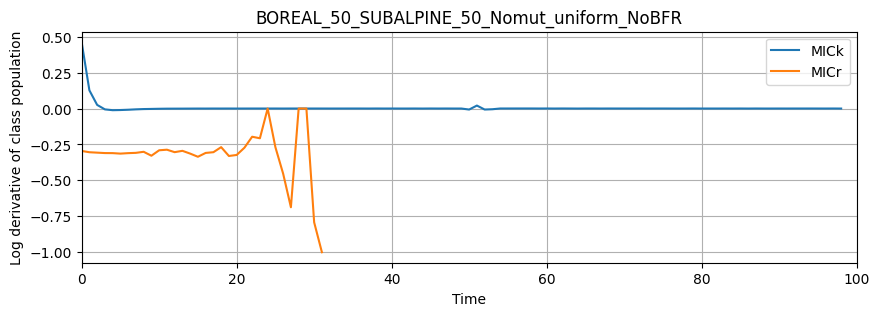

DESERT_50_BOREAL_50_Nomut_uniform_NoBFR


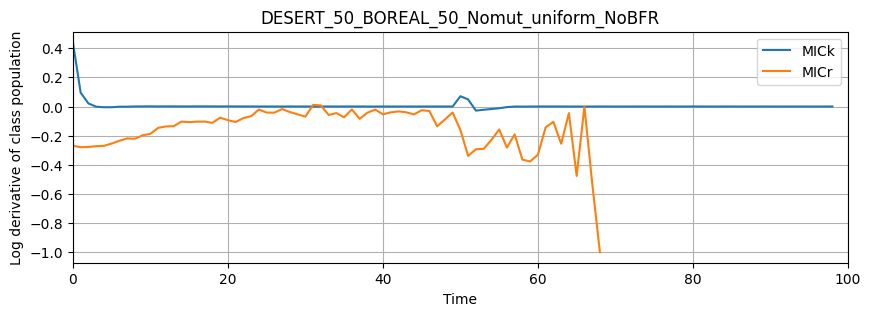

DESERT_50_DESERT_50_Nomut_uniform_NoBFR


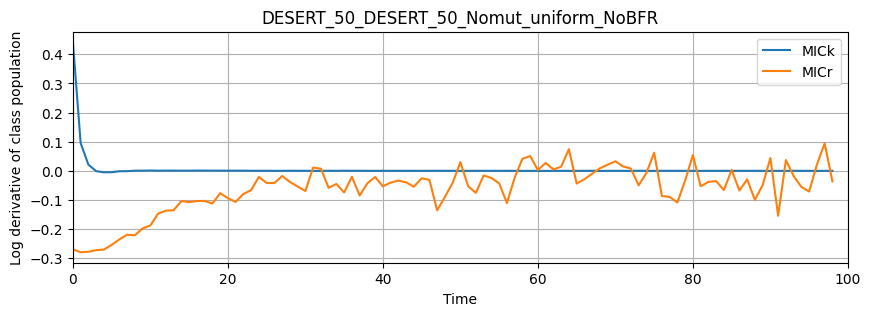

DESERT_50_GRASSLAND_50_Nomut_uniform_NoBFR


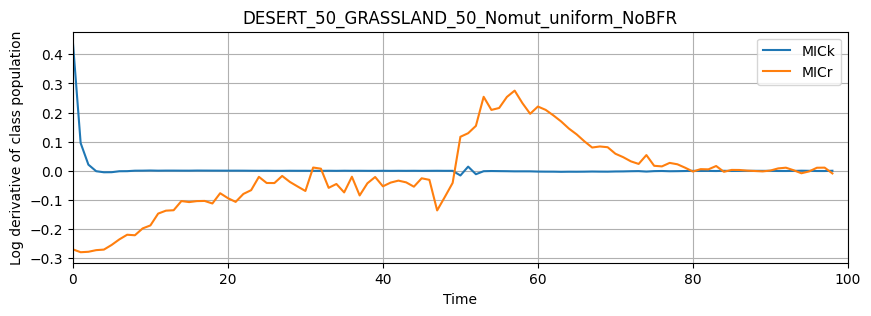

DESERT_50_PINEOAK_50_Nomut_uniform_NoBFR


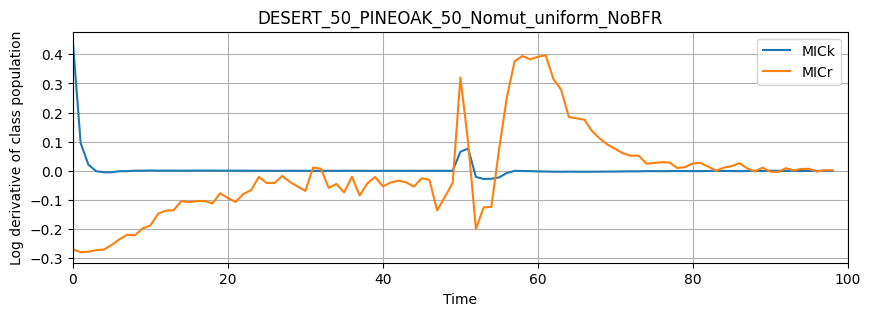

DESERT_50_SCRUBLAND_50_Nomut_uniform_NoBFR


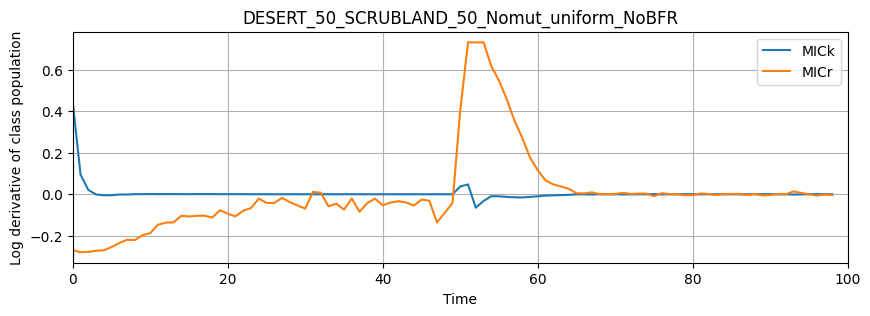

DESERT_50_SUBALPINE_50_Nomut_uniform_NoBFR


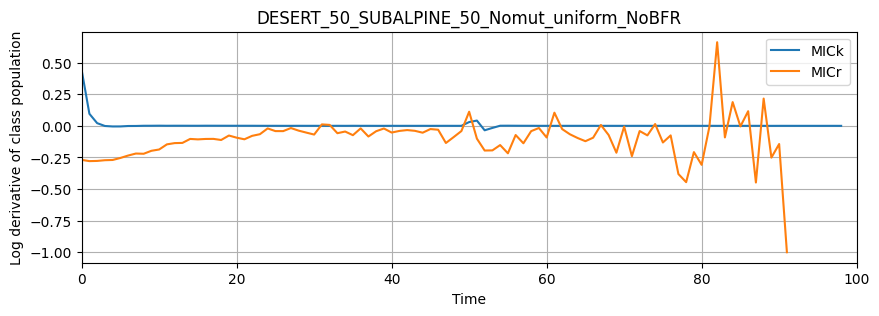

GRASSLAND_50_BOREAL_50_Nomut_uniform_NoBFR


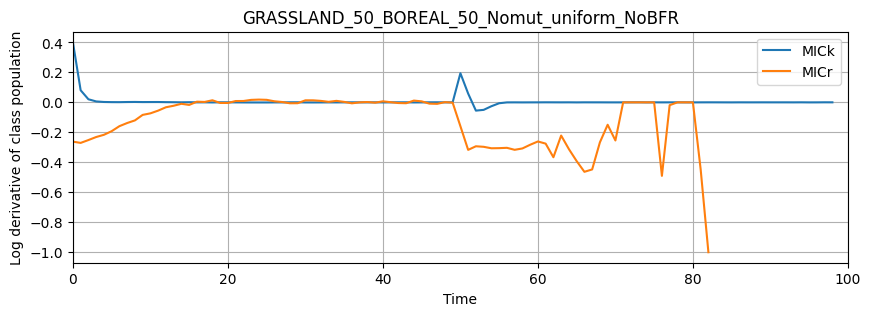

GRASSLAND_50_DESERT_50_Nomut_uniform_NoBFR


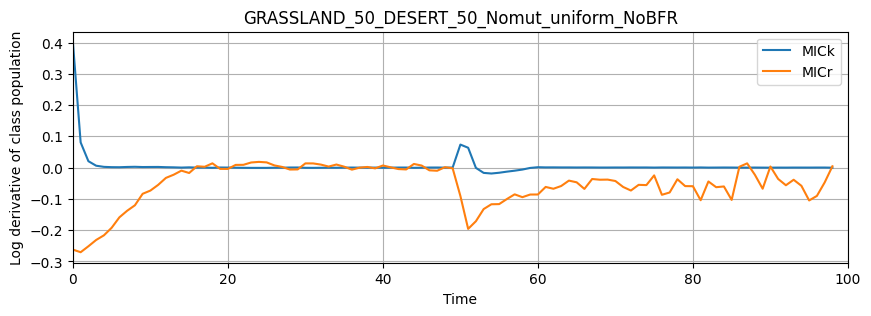

GRASSLAND_50_GRASSLAND_50_Nomut_uniform_NoBFR


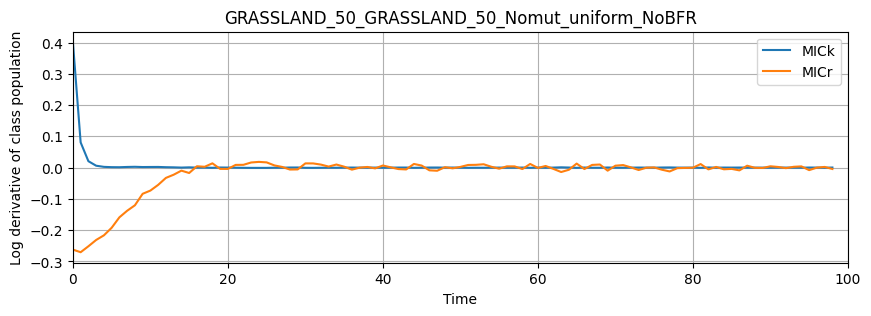

GRASSLAND_50_PINEOAK_50_Nomut_uniform_NoBFR


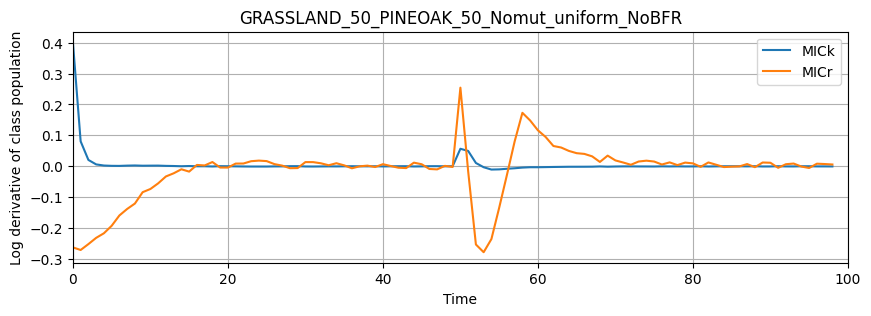

GRASSLAND_50_SCRUBLAND_50_Nomut_uniform_NoBFR


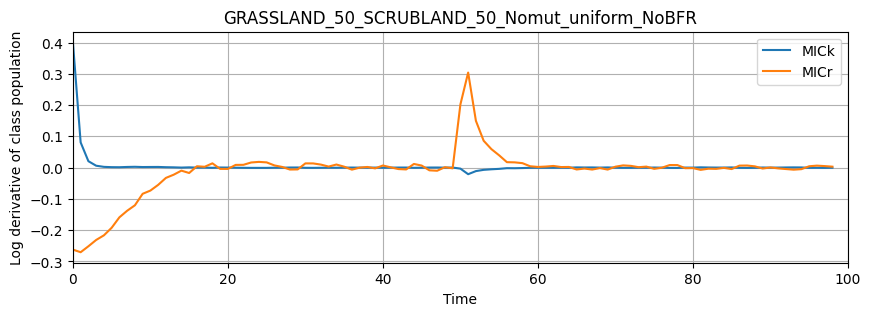

GRASSLAND_50_SUBALPINE_50_Nomut_uniform_NoBFR


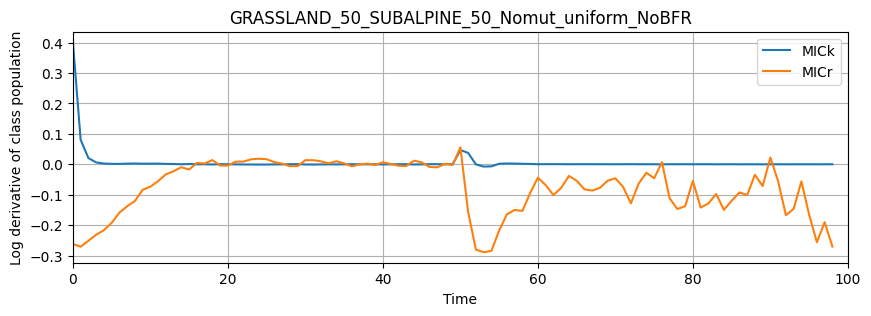

PINEOAK_50_BOREAL_50_Nomut_uniform_NoBFR


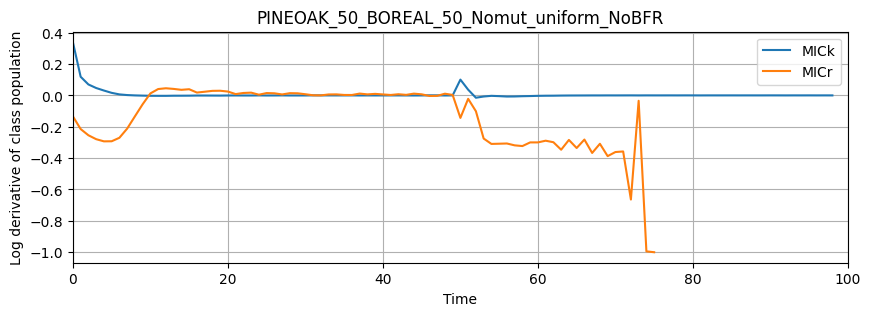

PINEOAK_50_DESERT_50_Nomut_uniform_NoBFR


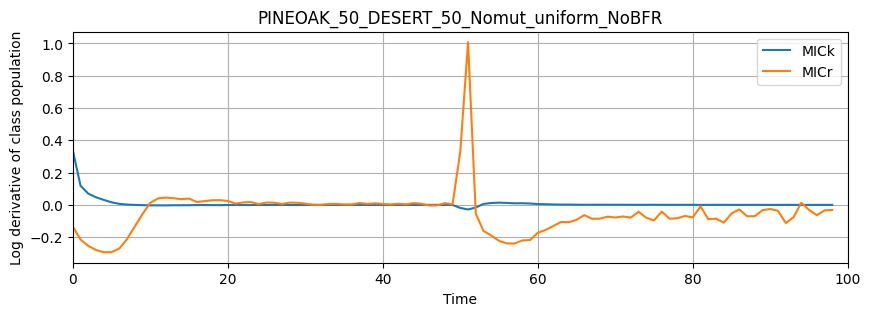

PINEOAK_50_GRASSLAND_50_Nomut_uniform_NoBFR


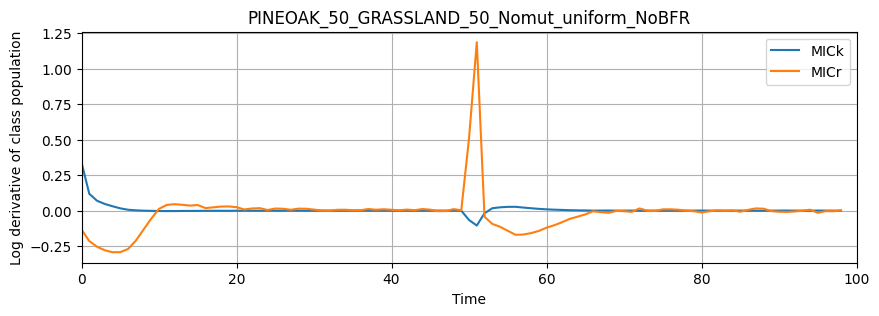

PINEOAK_50_PINEOAK_50_Nomut_uniform_NoBFR


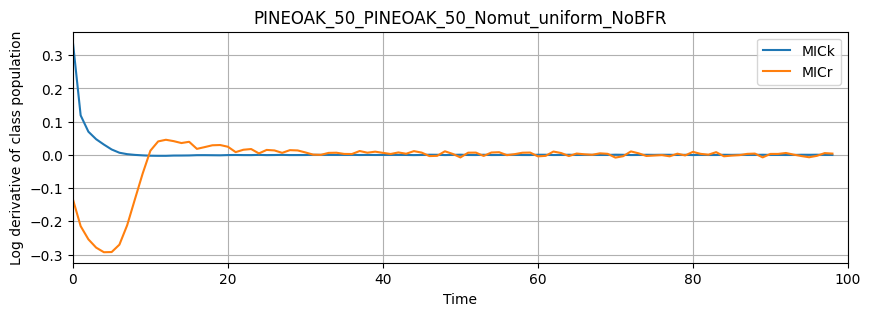

PINEOAK_50_SCRUBLAND_50_Nomut_uniform_NoBFR


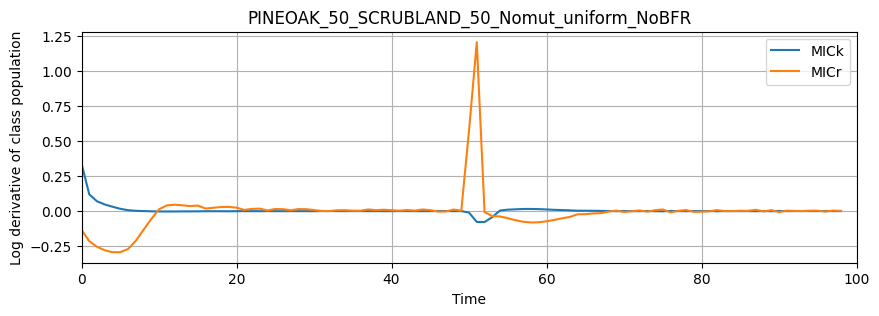

PINEOAK_50_SUBALPINE_50_Nomut_uniform_NoBFR


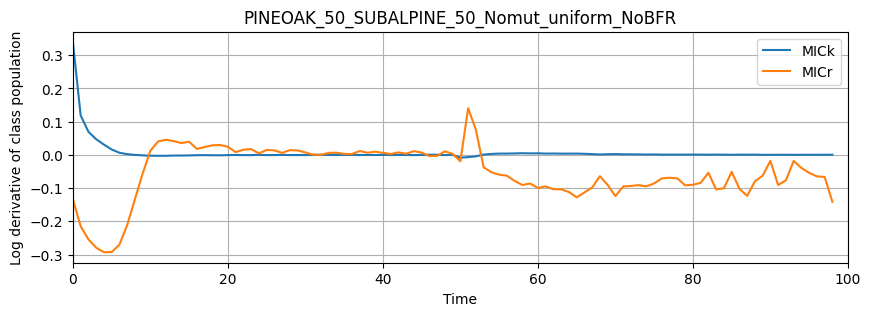

SCRUBLAND_50_BOREAL_50_Nomut_uniform_NoBFR


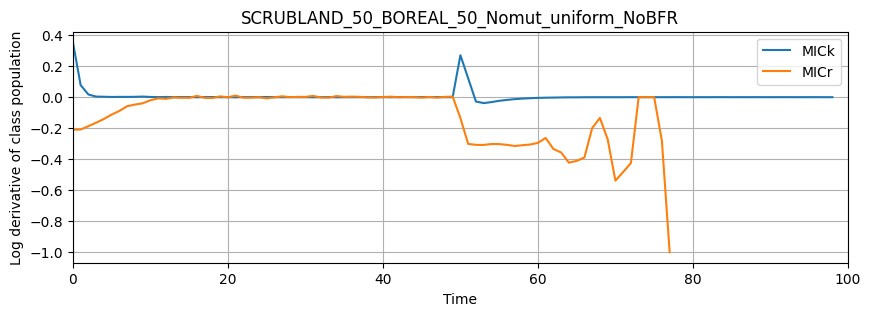

SCRUBLAND_50_DESERT_50_Nomut_uniform_NoBFR


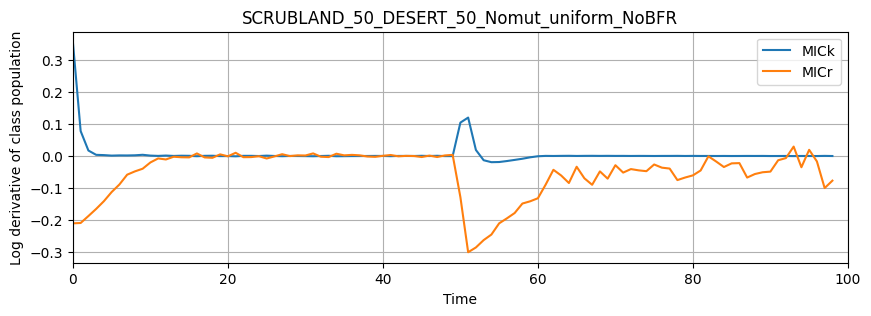

SCRUBLAND_50_GRASSLAND_50_Nomut_uniform_NoBFR


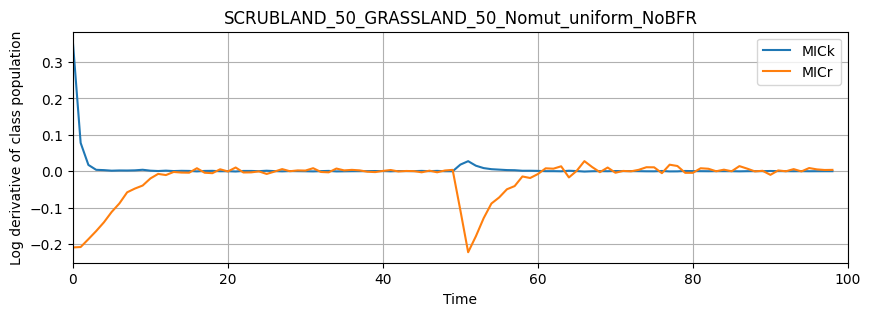

SCRUBLAND_50_PINEOAK_50_Nomut_uniform_NoBFR


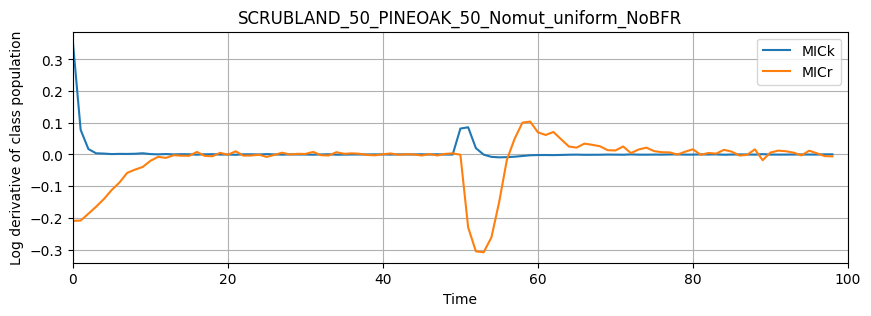

SCRUBLAND_50_SCRUBLAND_50_Nomut_uniform_NoBFR


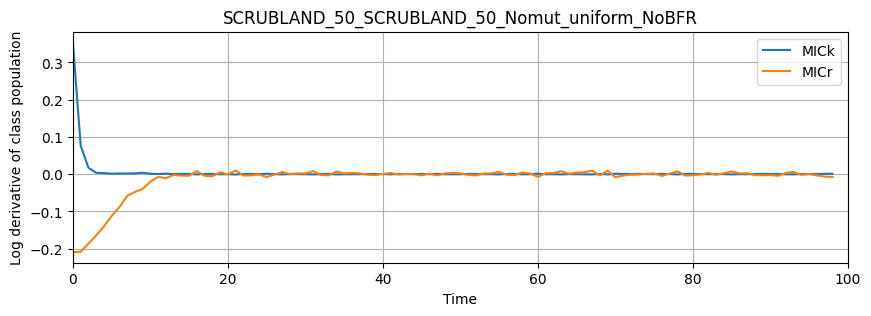

SCRUBLAND_50_SUBALPINE_50_Nomut_uniform_NoBFR


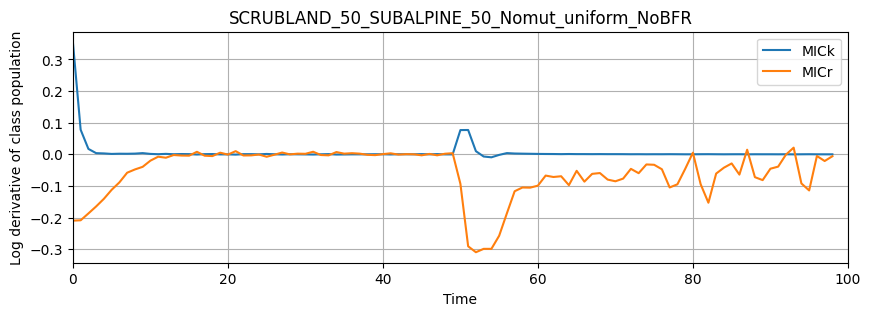

SUBALPINE_50_BOREAL_50_Nomut_uniform_NoBFR


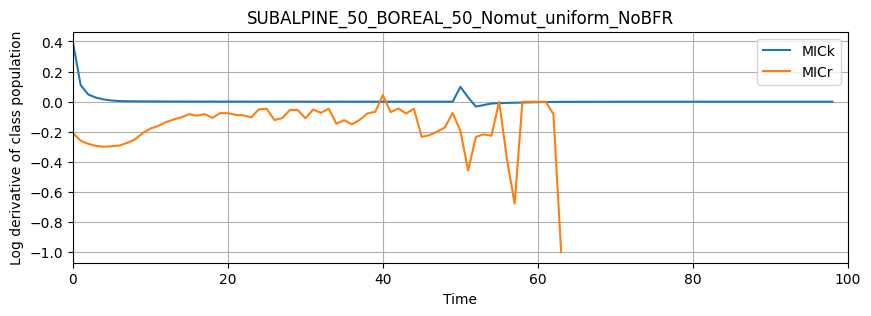

SUBALPINE_50_DESERT_50_Nomut_uniform_NoBFR


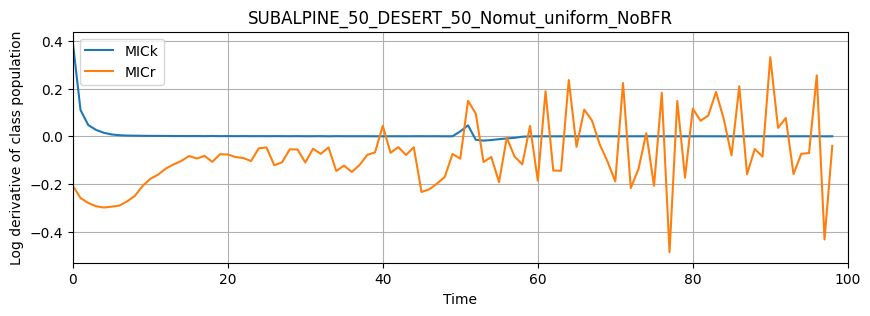

SUBALPINE_50_GRASSLAND_50_Nomut_uniform_NoBFR


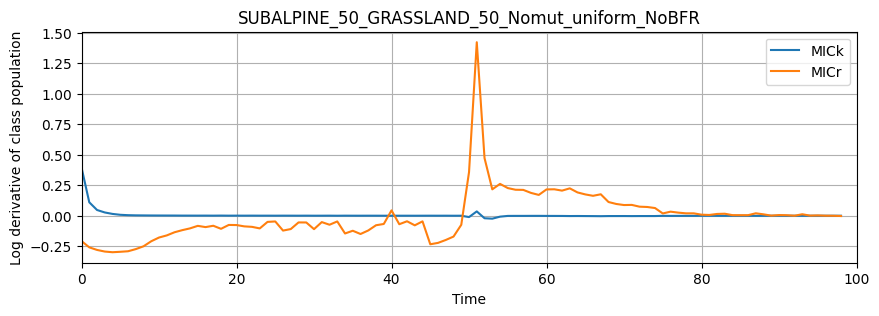

SUBALPINE_50_PINEOAK_50_Nomut_uniform_NoBFR


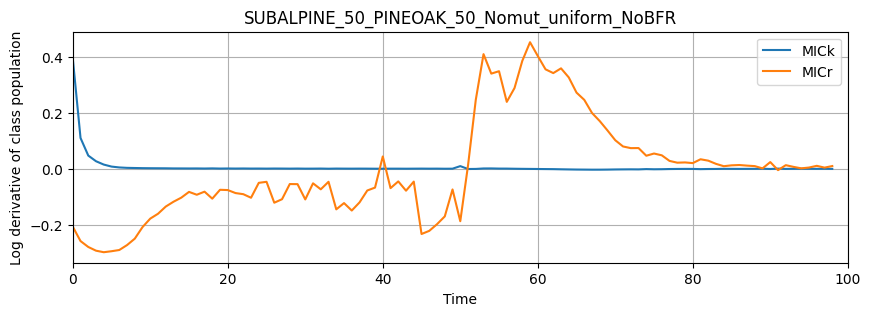

SUBALPINE_50_SCRUBLAND_50_Nomut_uniform_NoBFR


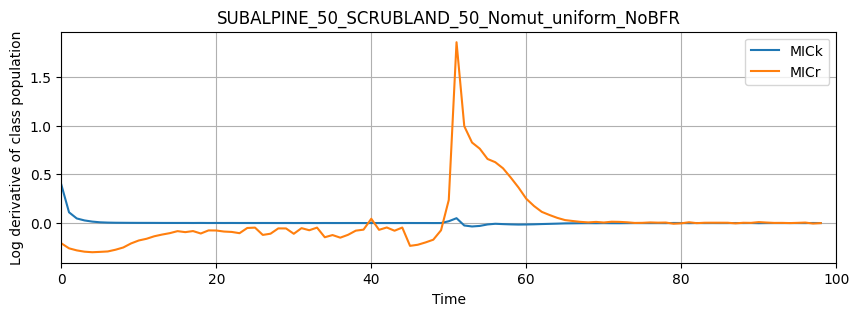

SUBALPINE_50_SUBALPINE_50_Nomut_uniform_NoBFR


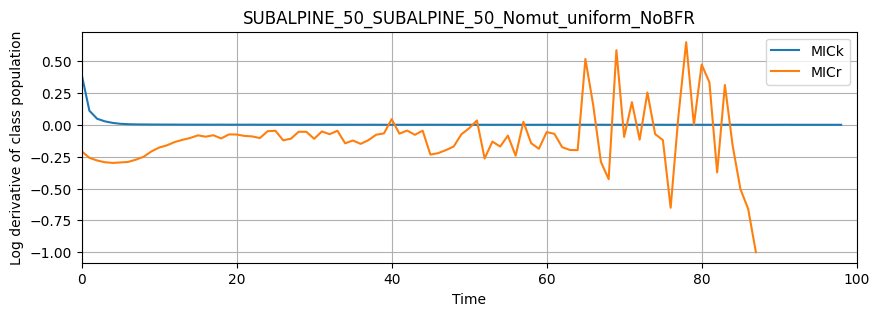

In [13]:
# Derivees log
from numpy import diff
for k,d in dstats['TaxClassesPop'].items():
    print(k)
    fig, ax = plt.subplots(1,1,figsize=(10,3))
    for kk,dd in d.items():
        tt,ddd = get_yearly_averages(dd['times'],dd['mean'])
        dx =1
        f = ddd[:,0].tolist()
        df = diff(f)/dx
        dlog = df/f[0:99]
        ax.plot(tt[0:99],dlog,label=kk)
    ax.grid()
    ax.set_xlabel('Time')
    ax.set_ylabel('Log derivative of class population')
    ax.legend()
    ax.set_title(k)
    ax.set_xlim(0,100)
    ymin,ymax = ax.get_ylim()
    ax.set_ylim(ymin,ymax)
    plt.show()
    plt.close(fig)

In [9]:
dkey = 'SubClassesTMass'
dstats[dkey] = {}
for k,d in diags.items():
    print('IIIIIIIIIII',k)
    dstats[dkey][k] = collect_diag_stats(d,dkey,None,filter_func= lambda x : x)

IIIIIIIIIII BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR
IIIIIIIIIII BOREAL_50_DESERT_50_Nomut_uniform_NoBFR
IIIIIIIIIII BOREAL_50_GRASSLAND_50_Nomut_uniform_NoBFR
IIIIIIIIIII BOREAL_50_PINEOAK_50_Nomut_uniform_NoBFR
IIIIIIIIIII BOREAL_50_SCRUBLAND_50_Nomut_uniform_NoBFR
IIIIIIIIIII BOREAL_50_SUBALPINE_50_Nomut_uniform_NoBFR
IIIIIIIIIII DESERT_50_BOREAL_50_Nomut_uniform_NoBFR
IIIIIIIIIII DESERT_50_DESERT_50_Nomut_uniform_NoBFR
IIIIIIIIIII DESERT_50_GRASSLAND_50_Nomut_uniform_NoBFR
IIIIIIIIIII DESERT_50_PINEOAK_50_Nomut_uniform_NoBFR
IIIIIIIIIII DESERT_50_SCRUBLAND_50_Nomut_uniform_NoBFR
IIIIIIIIIII DESERT_50_SUBALPINE_50_Nomut_uniform_NoBFR
IIIIIIIIIII GRASSLAND_50_BOREAL_50_Nomut_uniform_NoBFR
IIIIIIIIIII GRASSLAND_50_DESERT_50_Nomut_uniform_NoBFR
IIIIIIIIIII GRASSLAND_50_GRASSLAND_50_Nomut_uniform_NoBFR
IIIIIIIIIII GRASSLAND_50_PINEOAK_50_Nomut_uniform_NoBFR
IIIIIIIIIII GRASSLAND_50_SCRUBLAND_50_Nomut_uniform_NoBFR
IIIIIIIIIII GRASSLAND_50_SUBALPINE_50_Nomut_uniform_NoBFR
IIIIIIIIIII PINE

[   0.           91.62739726  183.03630073 ... 3984.23328617 3984.21950181
 3984.20453069]


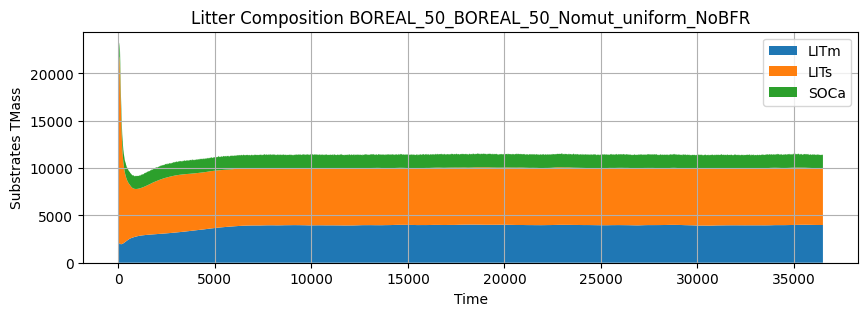

[   0.           91.62739726  183.03630073 ... 7133.2732413  7133.30466661
 7133.33553392]


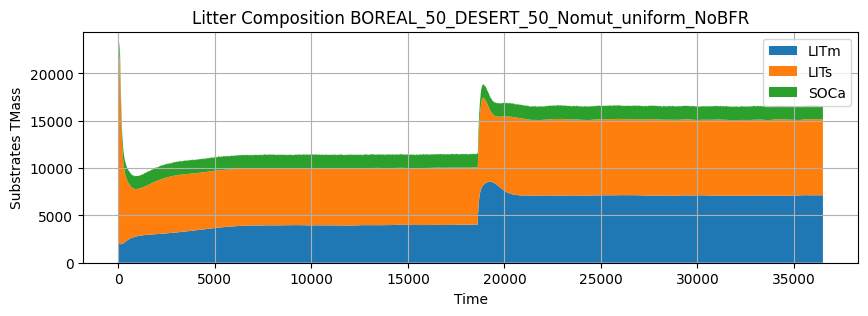

[   0.           91.62739726  183.03630073 ... 8431.79491328 8431.77557232
 8431.75723655]


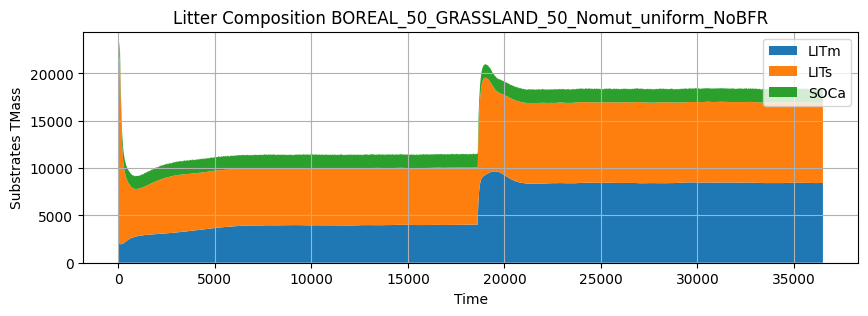

[   0.           91.62739726  183.03630073 ... 9638.3534827  9638.25093572
 9638.1486007 ]


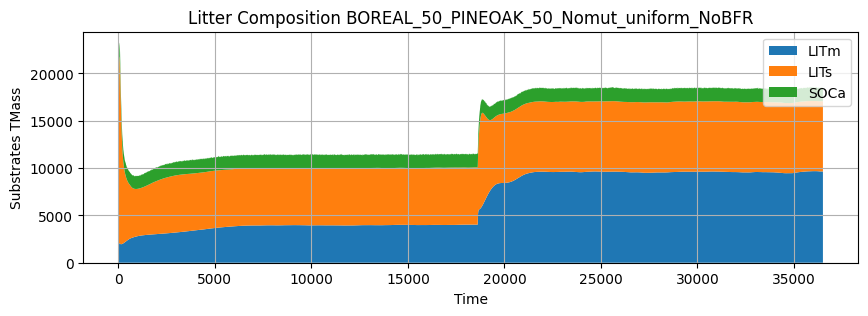

[    0.            91.62739726   183.03630073 ... 10287.42056531
 10287.41720611 10287.41285341]


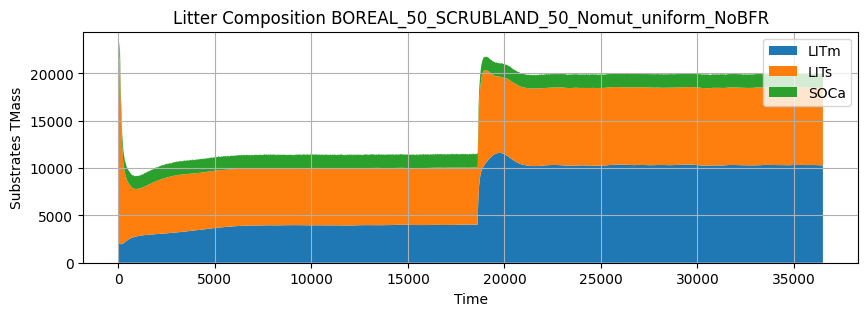

[   0.           91.62739726  183.03630073 ... 7809.21526751 7809.25544852
 7809.29219624]


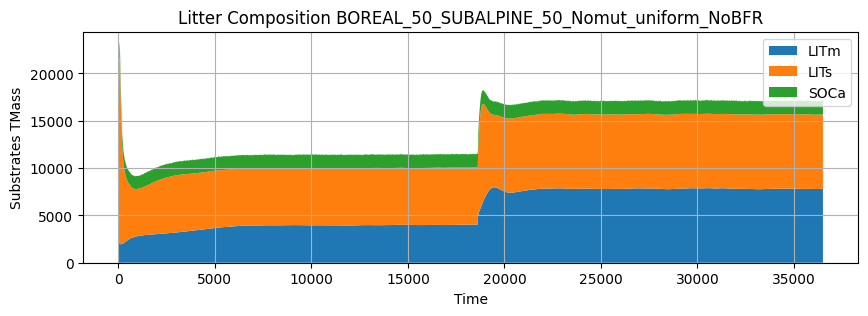

[   0.          161.30958904  322.23476434 ... 3969.24262798 3969.21879869
 3969.19540457]


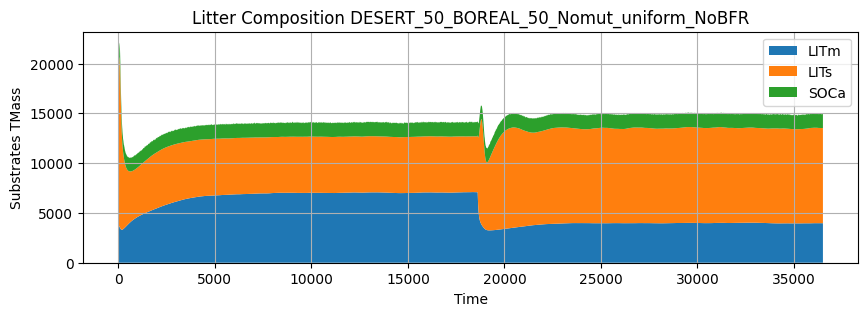

[   0.          161.30958904  322.23476434 ... 7097.7767829  7097.80756564
 7097.83705559]


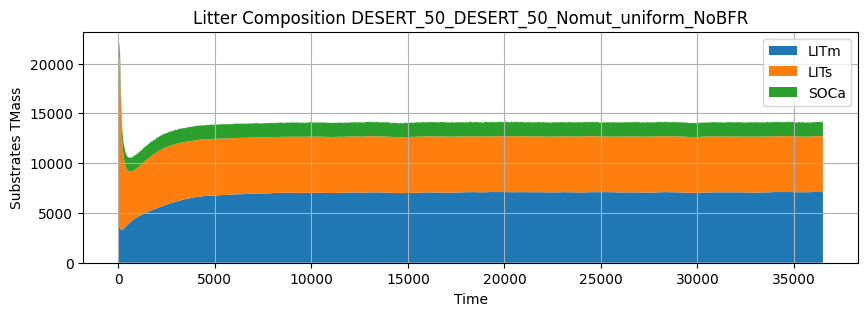

[   0.          161.30958904  322.23476434 ... 7254.30208693 7254.3623402
 7254.42330635]


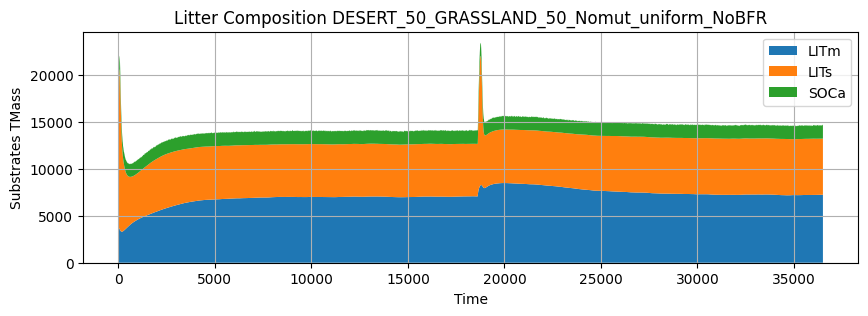

[   0.          161.30958904  322.23476434 ... 7362.1832308  7362.31178294
 7362.43877051]


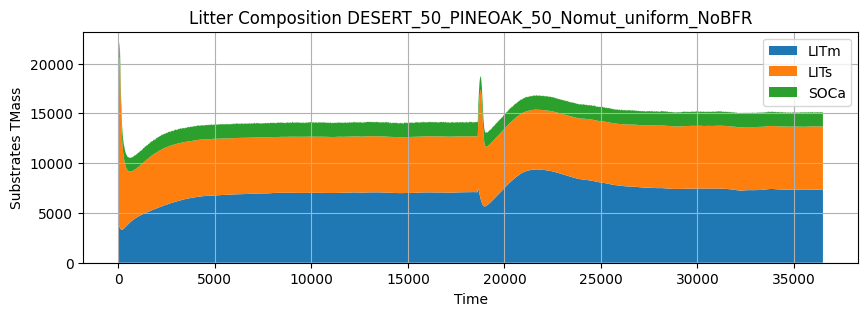

[   0.          161.30958904  322.23476434 ... 7659.30110413 7659.25541192
 7659.20977563]


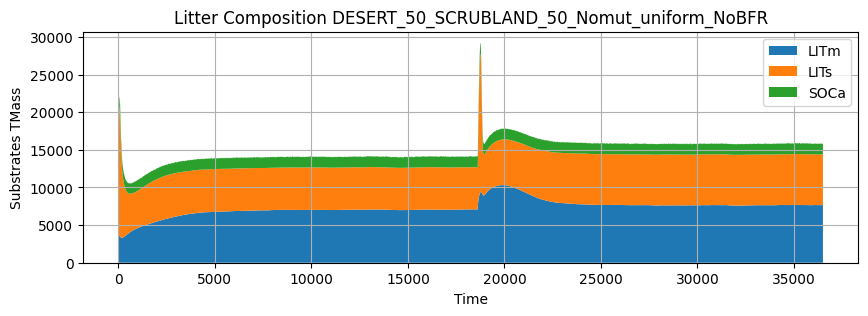

[   0.          161.30958904  322.23476434 ... 7834.70728253 7834.67906829
 7834.6514226 ]


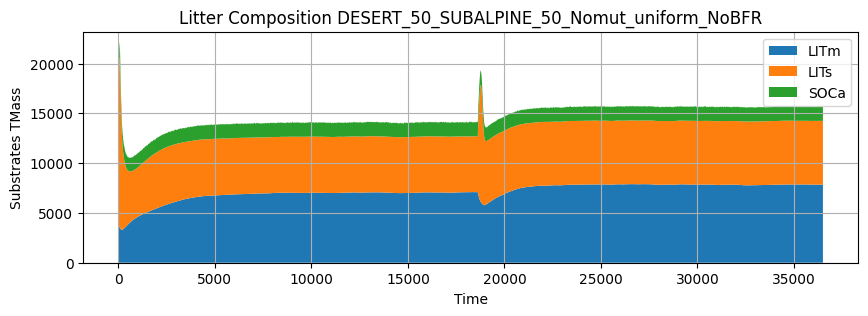

[   0.          187.32328767  374.200345   ... 4035.17470392 4035.17320924
 4035.17186907]


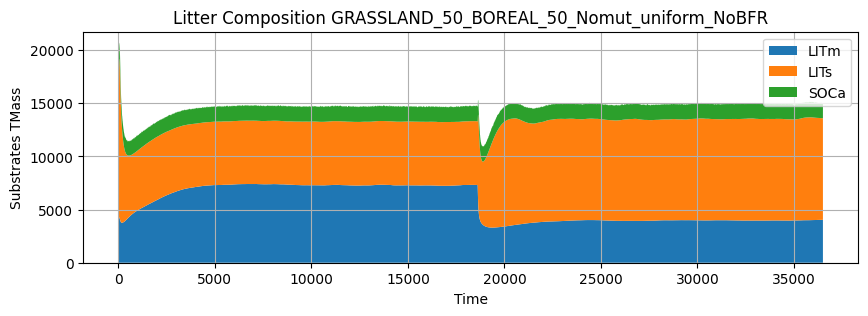

[   0.          187.32328767  374.200345   ... 7029.88099634 7029.85997129
 7029.83869732]


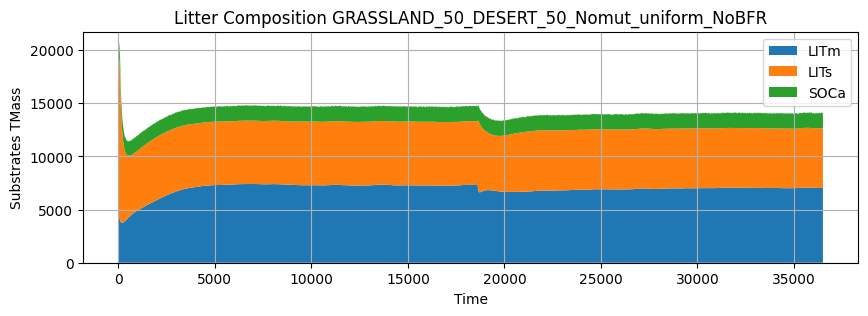

[   0.          187.32328767  374.200345   ... 7313.84940699 7313.7631601
 7313.67718162]


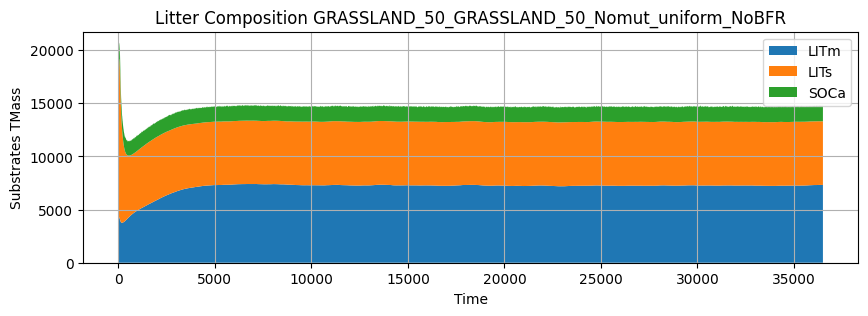

[   0.          187.32328767  374.200345   ... 7289.25529399 7289.26084311
 7289.26779598]


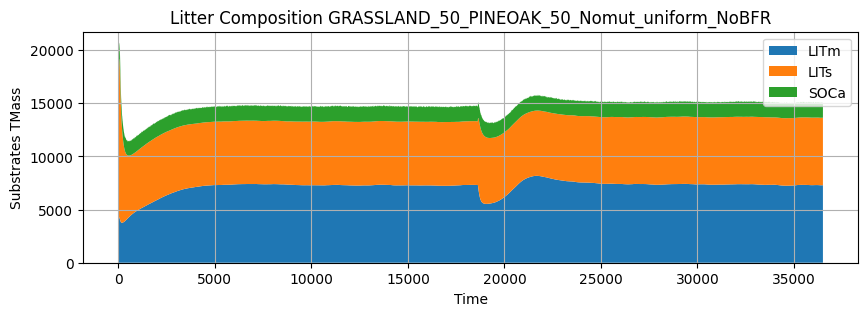

[   0.          187.32328767  374.200345   ... 7615.58731532 7615.55883911
 7615.53331741]


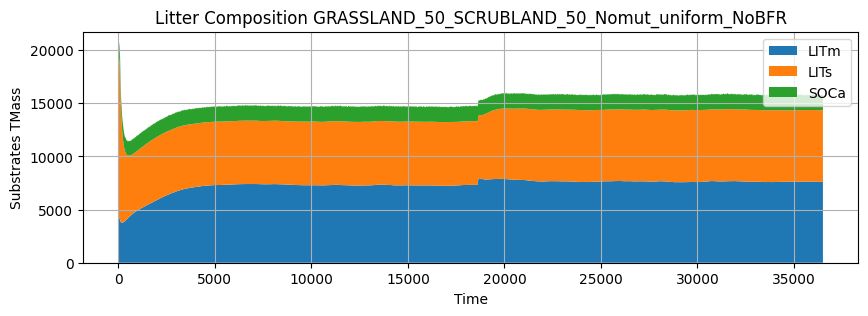

[   0.          187.32328767  374.200345   ... 7784.01484717 7783.96843901
 7783.92337526]


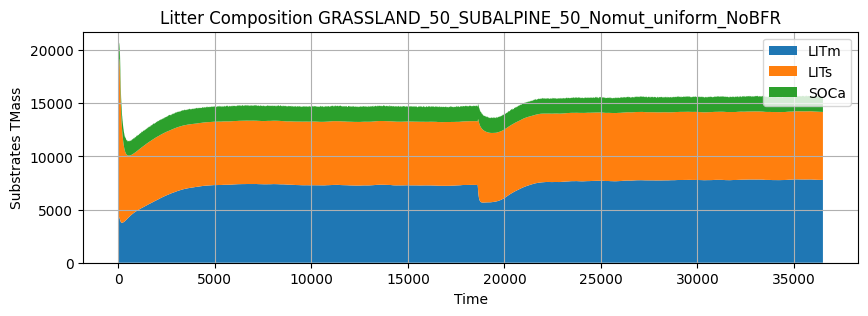

[   0.          194.59726027  388.73339149 ... 4004.15104659 4004.16644382
 4004.18024837]


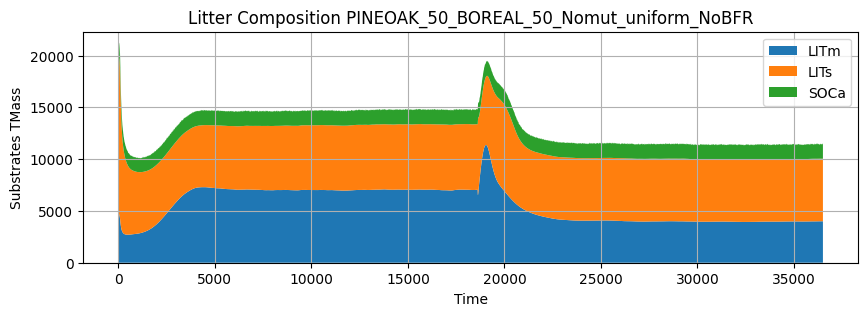

[   0.          194.59726027  388.73339149 ... 7056.61525587 7056.57918521
 7056.54173424]


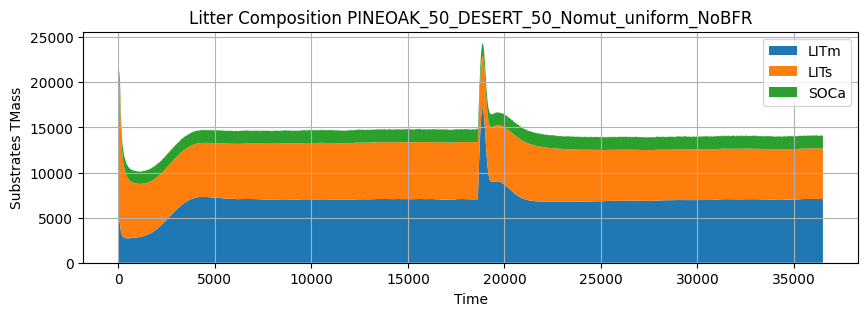

[   0.          194.59726027  388.73339149 ... 7313.19962212 7313.18636077
 7313.17107783]


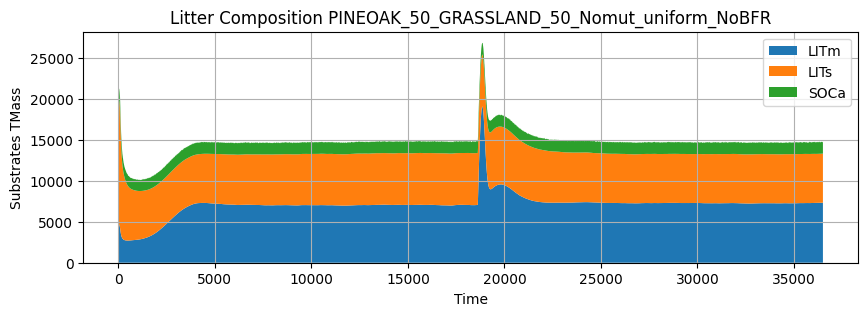

[   0.          194.59726027  388.73339149 ... 7040.23122356 7040.10818813
 7039.98818851]


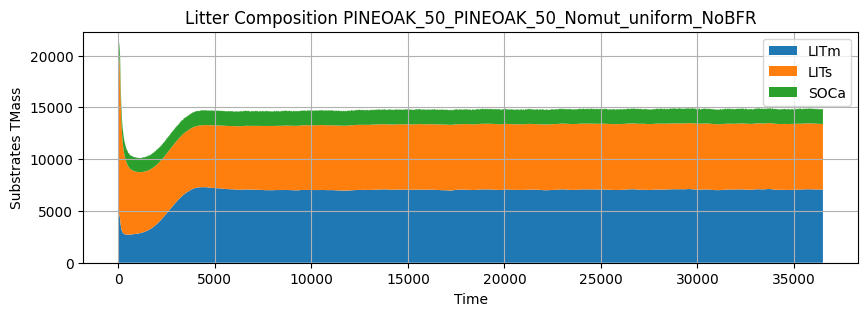

[   0.          194.59726027  388.73339149 ... 7349.41407729 7349.29924673
 7349.1850325 ]


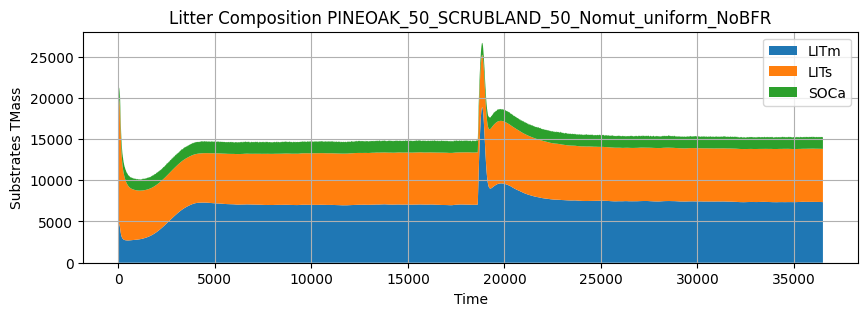

[   0.          194.59726027  388.73339149 ... 7779.95327081 7779.99655506
 7780.03867147]


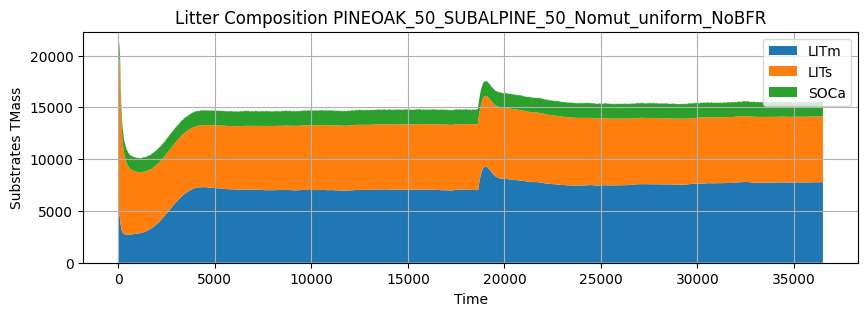

[   0.          219.87123288  439.21916549 ... 3988.58278386 3988.52525914
 3988.46779722]


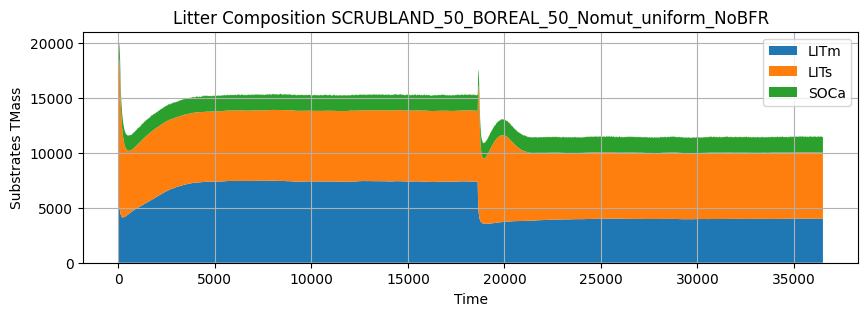

[   0.          219.87123288  439.21916549 ... 7048.30135606 7048.31608503
 7048.32771708]


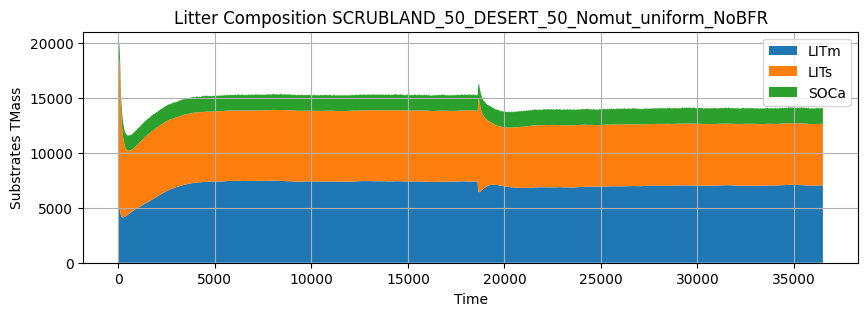

[   0.          219.87123288  439.21916549 ... 7276.95067551 7276.9995312
 7277.04283617]


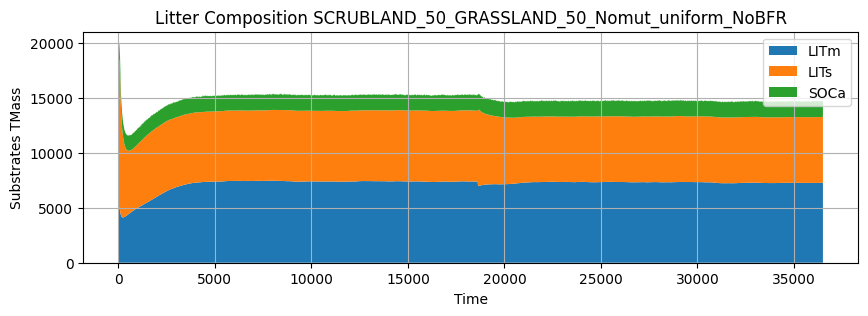

[   0.          219.87123288  439.21916549 ... 7225.9670073  7226.1342445
 7226.30207359]


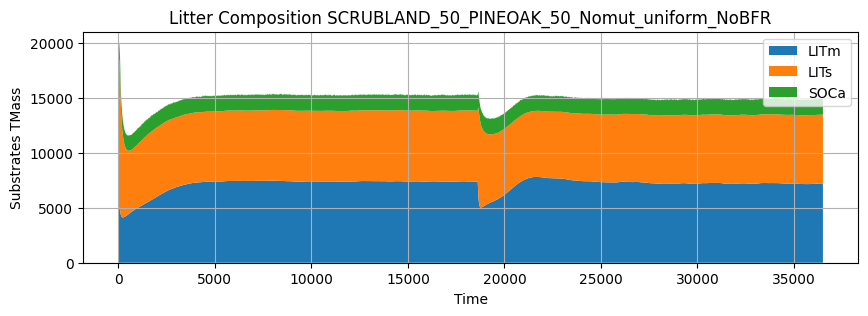

[   0.          219.87123288  439.21916549 ... 7396.29543272 7396.29529801
 7396.29413079]


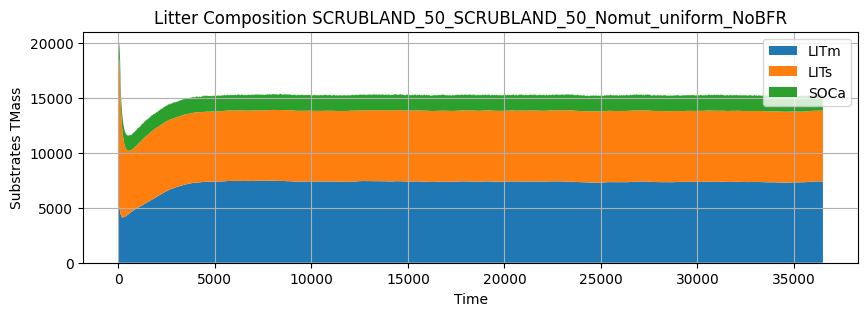

[   0.          219.87123288  439.21916549 ... 7803.81495282 7803.8250436
 7803.83351637]


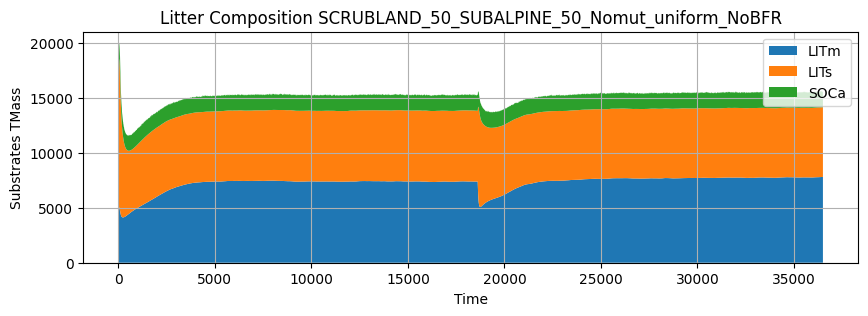

[   0.          165.27945205  330.16619582 ... 3969.97867787 3970.04022814
 3970.10152247]


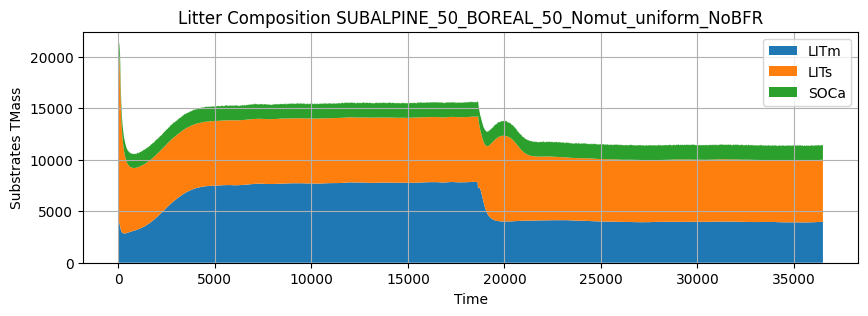

[   0.          165.27945205  330.16619582 ... 7091.04946876 7091.03627897
 7091.02110129]


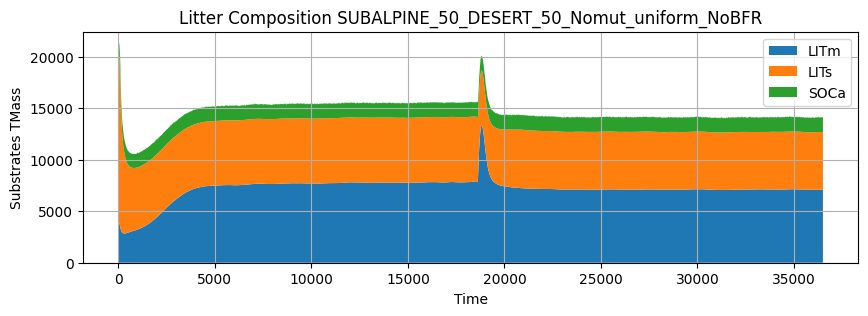

[   0.          165.27945205  330.16619582 ... 7285.17216522 7285.21941792
 7285.26506675]


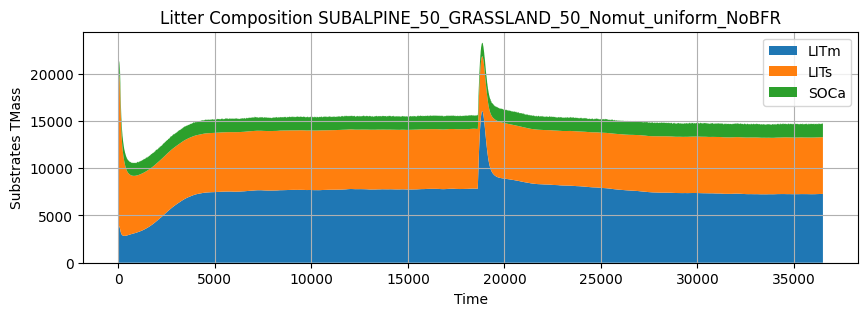

[   0.          165.27945205  330.16619582 ... 7118.02001153 7117.85984165
 7117.69813478]


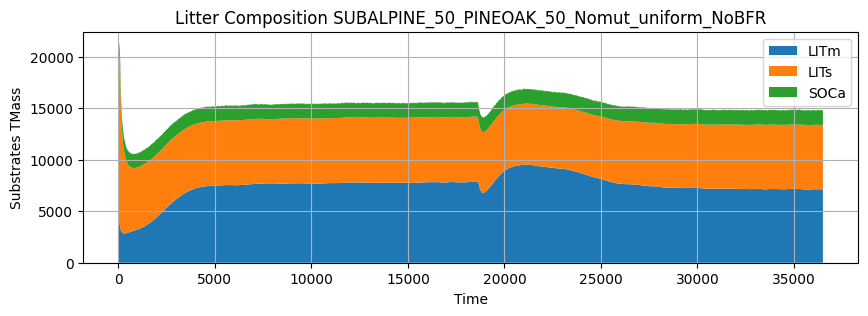

[   0.          165.27945205  330.16619582 ... 7443.70734192 7443.81199212
 7443.91285112]


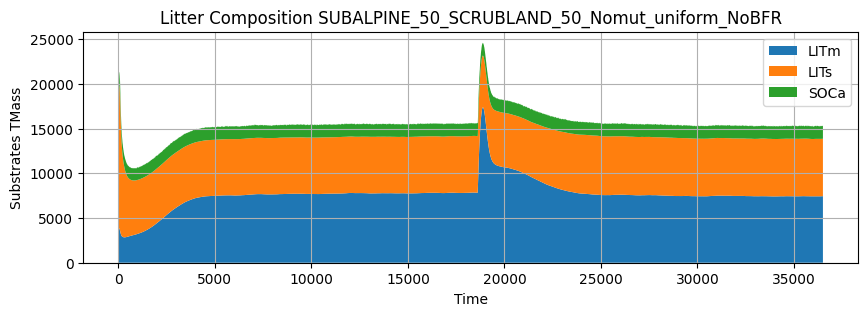

[   0.          165.27945205  330.16619582 ... 7802.1609057  7802.16650443
 7802.17092151]


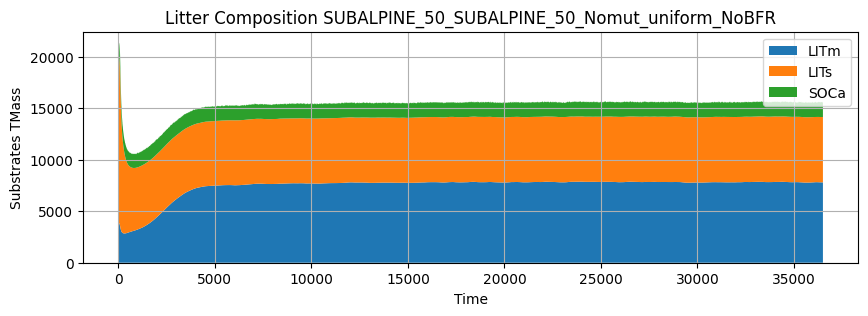

In [15]:
for k,d in dstats['SubClassesTMass'].items():     # k = litter (e.g. boreal)
    fig, ax = plt.subplots(1,1,figsize=(10,3))
    tt = [dd['times'] for dd in d.values()]
    vv = np.row_stack([dd['mean'][:,0] for dd in d.values()])
    kk = list(d.keys())                          ## kk = substrate type (e.g. LITm)
    print(vv[0])
    ax.stackplot(tt[0],vv,labels=kk)
    ax.set_xlabel('Time')
    ax.set_ylabel('Substrates TMass')
    ax.legend()
    ax.grid()
    ax.set_title('Litter Composition {}'.format(k))
    plt.show()
    plt.close(fig)

Text(0, 0.5, 'Substrate mass (mg.cm-3)')

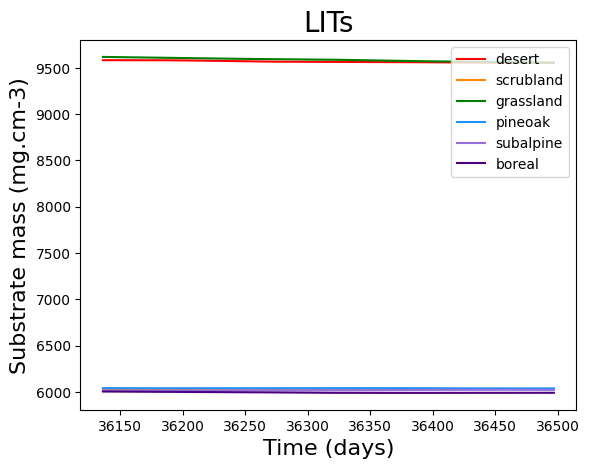

In [16]:
# Plot LITm mass for all litters
x  = dstats['SubClassesTMass']['BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR']['LITs']['times']
y1 = dstats['SubClassesTMass']['DESERT_50_BOREAL_50_Nomut_uniform_NoBFR']['LITs']['mean']
y2 = dstats['SubClassesTMass']['SCRUBLAND_50_BOREAL_50_Nomut_uniform_NoBFR']['LITs']['mean']
y3 = dstats['SubClassesTMass']['GRASSLAND_50_BOREAL_50_Nomut_uniform_NoBFR']['LITs']['mean']
y4 = dstats['SubClassesTMass']['PINEOAK_50_BOREAL_50_Nomut_uniform_NoBFR']['LITs']['mean']
y5 = dstats['SubClassesTMass']['SUBALPINE_50_BOREAL_50_Nomut_uniform_NoBFR']['LITs']['mean']
y6 = dstats['SubClassesTMass']['BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR']['LITs']['mean']

plt.plot(x[36136:36498], y1[36136:36498], label="desert", c='red')
plt.plot(x[36136:36498], y2[36136:36498], label="scrubland", c='darkorange')
plt.plot(x[36136:36498], y3[36136:36498], label="grassland", c='green')
plt.plot(x[36136:36498], y4[36136:36498], label="pineoak", c='dodgerblue')
plt.plot(x[36136:36498], y5[36136:36498], label="subalpine", c='mediumpurple')
plt.plot(x[36136:36498], y6[36136:36498], label="boreal", c='indigo')

plt.title("LITs", fontsize=20)
plt.legend(loc="upper right")
plt.xlabel ('Time (days)', fontsize=16)
plt.ylabel ('Substrate mass (mg.cm-3)', fontsize=16)

Text(0, 0.5, 'Substrate mass loss (mg.cm-3)')

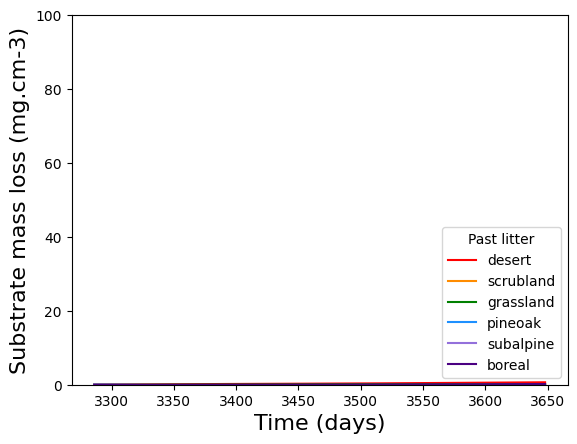

In [17]:
# Mass loss (x va de 3286 a 3689)
x  = dstats['SubClassesTMass']['DESERT_50_BOREAL_50_Nomut_uniform_NoBFR']['LITs']['times']
y1 = dstats['SubClassesTMass']['DESERT_50_BOREAL_50_Nomut_uniform_NoBFR']['LITs']['mean']
y2 = dstats['SubClassesTMass']['SCRUBLAND_50_BOREAL_50_Nomut_uniform_NoBFR']['LITs']['mean']
y3 = dstats['SubClassesTMass']['GRASSLAND_50_BOREAL_50_Nomut_uniform_NoBFR']['LITs']['mean']
y4 = dstats['SubClassesTMass']['PINEOAK_50_BOREAL_50_Nomut_uniform_NoBFR']['LITs']['mean']
y5 = dstats['SubClassesTMass']['SUBALPINE_50_BOREAL_50_Nomut_uniform_NoBFR']['LITs']['mean']
y6 = dstats['SubClassesTMass']['BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR']['LITs']['mean']

plt.plot(x[3286:3649], ((y1[3286]-y1[3286:3649])/y1[3286])*100, label="desert", c='red')
plt.plot(x[3286:3649], ((y2[3286]-y2[3286:3649])/y2[3286])*100, label="scrubland", c='darkorange')
plt.plot(x[3286:3649], ((y3[3286]-y3[3286:3649])/y3[3286])*100, label="grassland", c='green')
plt.plot(x[3286:3649], ((y4[3286]-y4[3286:3649])/y4[3286])*100, label="pineoak", c='dodgerblue')
plt.plot(x[3286:3649], ((y5[3286]-y5[3286:3649])/y5[3286])*100, label="subalpine", c='mediumpurple')
plt.plot(x[3286:3649], ((y6[3286]-y6[3286:3649])/y6[3286])*100, label="boreal", c='indigo')

plt.ylim(0,100)
#plt.title("LITs\npresent litter = desert", fontsize=20)
plt.legend(loc="lower right", title='Past litter')
plt.xlabel ('Time (days)', fontsize=16)
plt.ylabel ('Substrate mass loss (mg.cm-3)', fontsize=16)

In [18]:
# Pente de mass loss
from numpy import diff
x_brut  = dstats['SubClassesTMass']['SUBALPINE_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['times']
y_brut = dstats['SubClassesTMass']['SUBALPINE_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean']

x = x_brut[3286:3649]     # shape = 363
y = ((y_brut[3286]-y_brut[3286:3649])/y_brut[3286])*100  # shape = 363

fy = y[:,0].tolist()  # len = 363
dx = 1
bdf = diff(fy)/dx
dlog = df/fy[0:362]
plt.plot(x[0:362],dlog,label=kk)

NameError: name 'df' is not defined

/var/folders/sg/y0n68s1d4xld4ls1nkb6wpyc0000gn/T/ipykernel_94042/2284834033.py:12: RuntimeWarning: divide by zero encountered in true_divide
  dlog = df/fy[0:362]


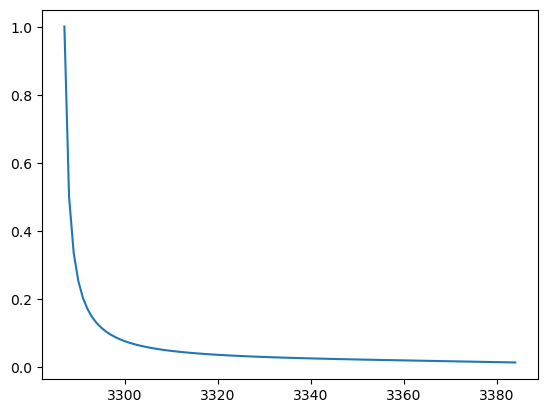

In [114]:
# Pente de mass loss (sur x de 0 a 100)
from numpy import diff
x_brut  = dstats['SubClassesTMass']['SUBALPINE_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['times']
y_brut = dstats['SubClassesTMass']['SUBALPINE_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean']

x = x_brut[3286:3649]     # shape = 363
y = ((y_brut[3286]-y_brut[3286:3649])/y_brut[3286])*100  # shape = 363

fy = y[:,0].tolist()  # len = 363
dx = 1
df = diff(fy)/dx
dlog = df/fy[0:362]
plt.plot(x[0:99],dlog[0:99],label=kk)

In [ ]:
# To change cell below faster
y1b = dstats['SubClassesTMass']['DESERT_50_DESERT_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y2b = dstats['SubClassesTMass']['SCRUBLAND_50_DESERT_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y3b = dstats['SubClassesTMass']['GRASSLAND_50_DESERT_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y4b = dstats['SubClassesTMass']['PINEOAK_50_DESERT_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y5b = dstats['SubClassesTMass']['SUBALPINE_50_DESERT_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y6b = dstats['SubClassesTMass']['BOREAL_50_DESERT_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]

y1b = dstats['SubClassesTMass']['DESERT_50_SCRUBLAND_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y2b = dstats['SubClassesTMass']['SCRUBLAND_50_SCRUBLAND_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y3b = dstats['SubClassesTMass']['GRASSLAND_50_SCRUBLAND_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y4b = dstats['SubClassesTMass']['PINEOAK_50_SCRUBLAND_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y5b = dstats['SubClassesTMass']['SUBALPINE_50_SCRUBLAND_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y6b = dstats['SubClassesTMass']['BOREAL_50_SCRUBLAND_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]

y1b = dstats['SubClassesTMass']['DESERT_50_GRASSLAND_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y2b = dstats['SubClassesTMass']['SCRUBLAND_50_GRASSLAND_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y3b = dstats['SubClassesTMass']['GRASSLAND_50_GRASSLAND_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y4b = dstats['SubClassesTMass']['PINEOAK_50_GRASSLAND_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y5b = dstats['SubClassesTMass']['SUBALPINE_50_GRASSLAND_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y6b = dstats['SubClassesTMass']['BOREAL_50_GRASSLAND_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]

y1b = dstats['SubClassesTMass']['DESERT_50_PINEOAK_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y2b = dstats['SubClassesTMass']['SCRUBLAND_50_PINEOAK_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y3b = dstats['SubClassesTMass']['GRASSLAND_50_PINEOAK_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y4b = dstats['SubClassesTMass']['PINEOAK_50_PINEOAK_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y5b = dstats['SubClassesTMass']['SUBALPINE_50_PINEOAK_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y6b = dstats['SubClassesTMass']['BOREAL_50_PINEOAK_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]

y1b = dstats['SubClassesTMass']['DESERT_50_SUBALPINE_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y2b = dstats['SubClassesTMass']['SCRUBLAND_50_SUBALPINE_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y3b = dstats['SubClassesTMass']['GRASSLAND_50_SUBALPINE_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y4b = dstats['SubClassesTMass']['PINEOAK_50_SUBALPINE_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y5b = dstats['SubClassesTMass']['SUBALPINE_50_SUBALPINE_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y6b = dstats['SubClassesTMass']['BOREAL_50_SUBALPINE_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]

y1b = dstats['SubClassesTMass']['DESERT_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y2b = dstats['SubClassesTMass']['SCRUBLAND_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y3b = dstats['SubClassesTMass']['GRASSLAND_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y4b = dstats['SubClassesTMass']['PINEOAK_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y5b = dstats['SubClassesTMass']['SUBALPINE_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y6b = dstats['SubClassesTMass']['BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]

In [10]:
# Mass loss (je garde les memes x mais je les reinitialise de 0 a 362)
x  = np.arange(362)
y1b = dstats['SubClassesTMass']['DESERT_50_DESERT_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y2b = dstats['SubClassesTMass']['SCRUBLAND_50_DESERT_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y3b = dstats['SubClassesTMass']['GRASSLAND_50_DESERT_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y4b = dstats['SubClassesTMass']['PINEOAK_50_DESERT_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y5b = dstats['SubClassesTMass']['SUBALPINE_50_DESERT_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]
y6b = dstats['SubClassesTMass']['BOREAL_50_DESERT_50_Nomut_uniform_NoBFR']['LITm']['mean'][36136:36498]

y1 = ((y1b[0]-y1b)/y1b[0])*100
y2 = ((y2b[0]-y2b)/y2b[0])*100
y3 = ((y3b[0]-y3b)/y3b[0])*100
y4 = ((y4b[0]-y4b)/y4b[0])*100
y5 = ((y5b[0]-y5b)/y5b[0])*100
y6 = ((y6b[0]-y6b)/y6b[0])*100


# plt.plot(x, y1, label="desert", c='red')
# plt.plot(x, y2, label="scrubland", c='darkorange')
# plt.plot(x, y3, label="grassland", c='green')
# plt.plot(x, y4, label="pineoak", c='dodgerblue')
# plt.plot(x, y5, label="subalpine", c='mediumpurple')
# plt.plot(x, y6, label="boreal", c='indigo')

# plt.ylim(0,100)
# #plt.title("LITs\npresent litter = desert", fontsize=20)
# plt.legend(loc="lower right", title='Past litter')
# plt.xlabel ('Time (days)', fontsize=16)
# plt.ylabel ('Substrate mass loss (mg.cm-3)', fontsize=16)

# Pente moyenne sur x de 0 a 100
## pente moyenne

a1=round((y1[100].item()-y1[0].item())/(x[100]-x[0]),4)
a2=round((y2[100].item()-y2[0].item())/(x[100]-x[0]),4)
a3=round((y3[100].item()-y3[0].item())/(x[100]-x[0]),4)
a4=round((y4[100].item()-y4[0].item())/(x[100]-x[0]),4)
a5=round((y5[100].item()-y5[0].item())/(x[100]-x[0]),4)
a6=round((y6[100].item()-y6[0].item())/(x[100]-x[0]),4)
print(list[a1,a2,a3,a4,a5,a6])

list[0.0002, -0.001, 0.0008, 0.0003, -0.0002, -0.0002]


list[3983.272074444546, 3985.6800181833623, 3973.3398779173694, 3984.8170816383717, 3964.3522724252025, 3961.122245264534]


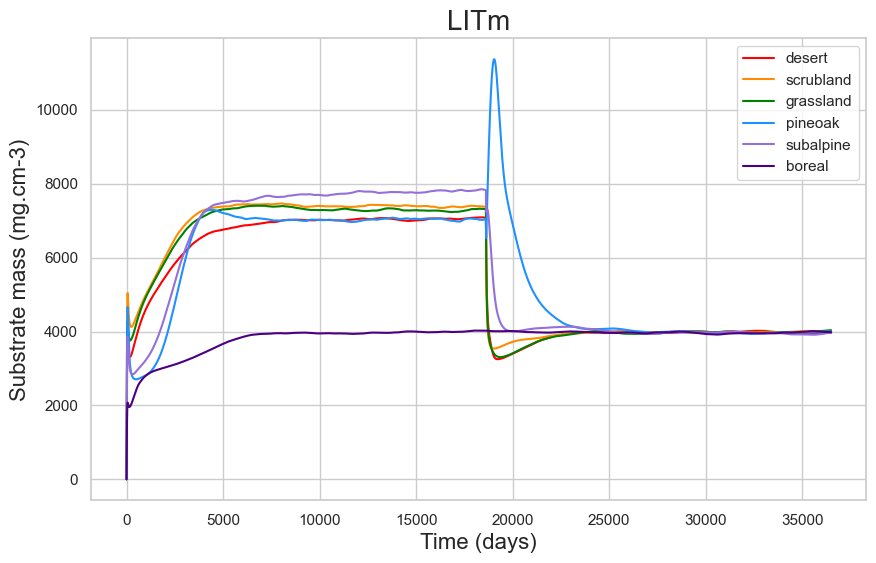

In [43]:
# Calcul d'equilibres pour le cas CONSTANT LITTER INPUT
# Plot LITm mass for all litters
x  = dstats['SubClassesTMass']['DESERT_50_DESERT_50_Nomut_uniform_NoBFR']['LITm']['times']

y1 = dstats['SubClassesTMass']['DESERT_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean']
y2 = dstats['SubClassesTMass']['SCRUBLAND_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean']
y3 = dstats['SubClassesTMass']['GRASSLAND_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean']
y4 = dstats['SubClassesTMass']['PINEOAK_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean']
y5 = dstats['SubClassesTMass']['SUBALPINE_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean']
y6 = dstats['SubClassesTMass']['BOREAL_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean']

plt.plot(x, y1, label="desert", c='red')
plt.plot(x, y2, label="scrubland", c='darkorange')
plt.plot(x, y3, label="grassland", c='green')
plt.plot(x, y4, label="pineoak", c='dodgerblue')
plt.plot(x, y5, label="subalpine", c='mediumpurple')
plt.plot(x, y6, label="boreal", c='indigo')

plt.title("LITm", fontsize=20)
plt.legend(loc="upper right")
plt.xlabel ('Time (days)', fontsize=16)
plt.ylabel ('Substrate mass (mg.cm-3)', fontsize=16)

a1=y1[25000:35000].mean()
a2=y2[25000:35000].mean()
a3=y3[25000:35000].mean()
a4=y4[25000:35000].mean()
a5=y5[25000:35000].mean()
a6=y6[25000:35000].mean()

print(list[a1,a2,a3,a4,a5,a6])

                Desert     Scrubland    Grassland      Pineoak    Subalpine  \
Desert     7068.626298   7641.300406  7362.229335  7478.515913  7843.579759   
Scrubland  7008.699743   7342.517186  7301.585654  7244.590016  7710.003325   
Grassland  6994.742824   7634.830567  7254.980173  7369.122345  7768.120441   
Pineoak    6946.837874   7421.003162  7266.714473  7062.155204  7631.526678   
Subalpine  7102.648222   7491.902798  7419.379716  7333.340893  7826.525720   
Boreal     7102.151243  10313.255885  8439.727616  9570.987952  7822.354800   

                Boreal  
Desert     3983.272074  
Scrubland  3985.680018  
Grassland  3973.339878  
Pineoak    3984.817082  
Subalpine  3964.352272  
Boreal     3961.122245  


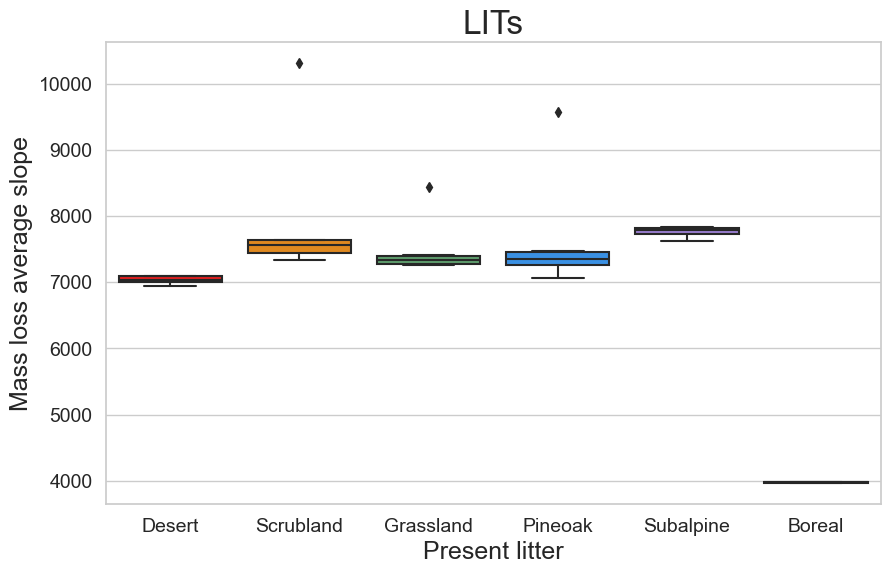

In [44]:
# Effet litiere sur LITm (mass loss slope)
import pandas as pd
import numpy as np
import seaborn as sns
## Create the dataframe
litter = ['Desert', 'Scrubland', 'Grassland', 'Pineoak', 'Subalpine', 'Boreal']
## Present litter
## LITm et LITs separately
### y = present litter
Desert = pd.Series([7068.626297794952, 7008.699742831374, 6994.74282365924, 6946.8378735728775, 7102.648221570529, 7102.151242543243])
Scrubland = pd.Series([7641.300406026367, 7342.517185656667, 7634.830566531754, 7421.00316175012, 7491.902797571584, 10313.25588506159])
Grassland = pd.Series([7362.229335065114, 7301.585654344292, 7254.980172891051, 7266.7144733944415, 7419.379716419673, 8439.727616425009])
Pineoak = pd.Series([7478.51591344476, 7244.590015853116, 7369.122345135373, 7062.155204091977, 7333.340893089974, 9570.987951987323])
Subalpine = pd.Series([7843.579758916111, 7710.003325010176, 7768.120441096182, 7631.526678484285, 7826.525719546707, 7822.35479970205])
Boreal = pd.Series([3983.272074444546, 3985.6800181833623, 3973.3398779173694, 3984.8170816383717, 3964.3522724252025, 3961.122245264534])
# Desert = pd.Series([])
# Scrubland = pd.Series([])
# Grassland = pd.Series([])
# Pineoak = pd.Series([])
# Subalpine = pd.Series([])
# Boreal = pd.Series([])
## Build table
Table_for_plot = pd.concat([Desert,Scrubland,Grassland,Pineoak,Subalpine,Boreal],keys=litter,axis=1)
Table_for_plot.index = litter
print(Table_for_plot)

## BOXPLOT
import seaborn as sns
my_pal = {"Desert":"red", "Scrubland":"darkorange", "Grassland":"g", "Pineoak":"dodgerblue", 
          "Subalpine":"mediumpurple", "Boreal":"indigo"}
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
ax = sns.boxplot(x="variable", y="value", data=pd.melt(Table_for_plot), palette=my_pal)
ax.set_title('LITs', fontsize=24)
ax.set_ylabel('Mass loss average slope', fontsize=18)
ax.set_xlabel('Present litter', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.legend(Table_for_plot.index, title='Past litter')

In [112]:
import scipy.stats as stats

# LITs
Desert = pd.Series([0.7025,0.7113,0.6911,0.7036,0.7028,0.6945])
Scrubland = pd.Series([0.7327,0.6522,0.6579,0.6565,0.6586,0.7682])
Grassland = pd.Series([0.7582,0.6741,0.674,0.6764,0.6922,0.7416])
Pineoak = pd.Series([0.6526,0.5894,0.5912,0.5661,0.5828,0.5921])
Subalpine = pd.Series([0.6512,0.6191,0.6096,0.5988,0.6152,0.6234])
Boreal = pd.Series([0.5776,0.5311,0.533,0.5979,0.6041,0.5421])

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(Subalpine, Boreal)

# Print the results
print("F-Statistic:", f_statistic)
print("p-value:", p_value)

F-Statistic: 13.026777071350285
p-value: 0.00477394244385162


0.014

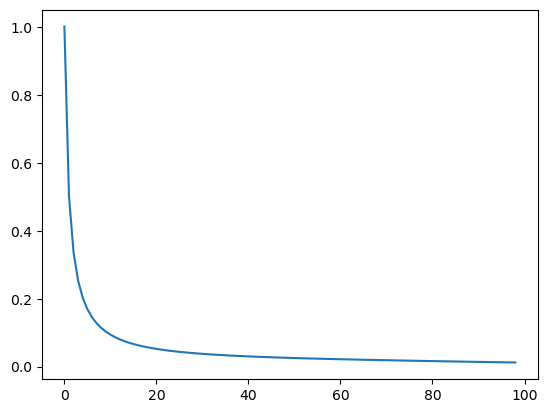

In [128]:
# Pente moyenne sur x de 0 a 100
## pente
dx = 1
fy1 = y1[:,0].tolist()  # len = 363
df1 = diff(fy1)/dx
dlog1 = df1[1:]/fy1[1:362]
plt.plot(x[0:99],dlog1[0:99],label=kk)
## pente moyenne
slom1 = dlog1[1:].mean()
round(slom1,3)

/var/folders/sg/y0n68s1d4xld4ls1nkb6wpyc0000gn/T/ipykernel_94042/1039621149.py:12: RuntimeWarning: divide by zero encountered in true_divide
  dlog = df/fy[0:362]


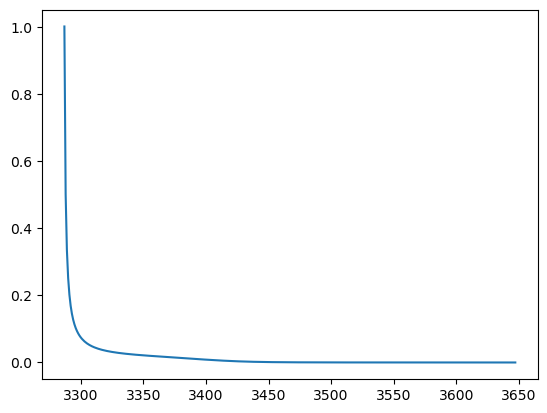

In [100]:
# Pente de mass lossb
from numpy import diff
x_brut  = dstats['SubClassesTMass']['SUBALPINE_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['times']
y_brut = dstats['SubClassesTMass']['SUBALPINE_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean']

x = x_brut[3286:3649]     # shape = 363
y = ((y_brut[3286]-y_brut[3286:3649])/y_brut[3286])*100  # shape = 363

fy = y[:,0].tolist()  # len = 363
dx = 1
df = diff(fy)/dx
dlog = df/fy[0:362]
plt.plot(x[0:362],dlog,label=kk)

In [88]:
# Pente moyenne de mass loss
from numpy import diff
x  = dstats['SubClassesTMass']['SUBALPINE_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['times']
y_brut = dstats['SubClassesTMass']['SUBALPINE_50_BOREAL_50_Nomut_uniform_NoBFR']['LITm']['mean']
y = ((y_brut[3286]-y_brut[3286:3649])/y_brut[3286])*100

y.shape

(363, 1)

In [ ]:
# Derivees log
from numpy import diff
for k,d in dstats['TaxClassesPop'].items():
    print(k)
    fig, ax = plt.subplots(1,1,figsize=(10,3))
    for kk,dd in d.items():
        tt,ddd = get_yearly_averages(dd['times'],dd['mean'])
        dx =1
        f = ddd[:,0].tolist()
        df = diff(f)/dx
        dlog = df/f[0:99]
        ax.plot(tt[0:99],dlog,label=kk)
    ax.grid()
    ax.set_xlabel('Time')
    ax.set_ylabel('Log derivative of class population')
    ax.legend()
    ax.set_title(k)
    ax.set_xlim(0,100)
    ymin,ymax = ax.get_ylim()
    ax.set_ylim(ymin,ymax)
    plt.show()
    plt.close(fig)

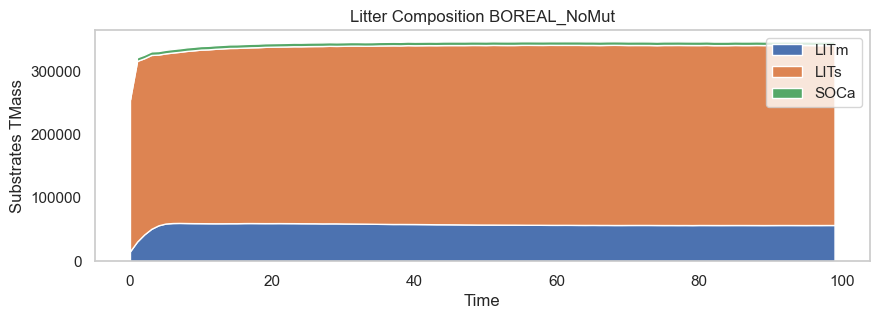

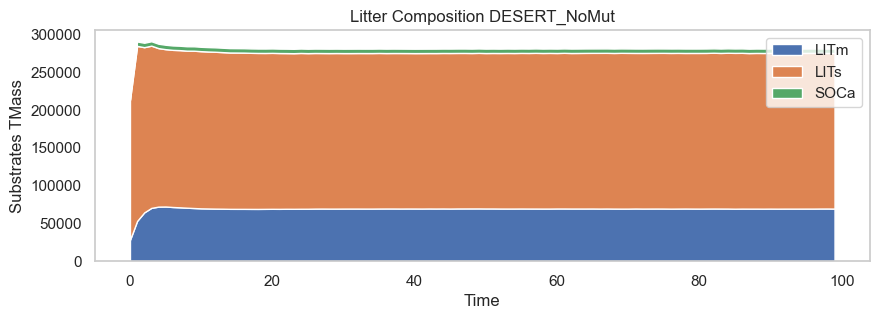

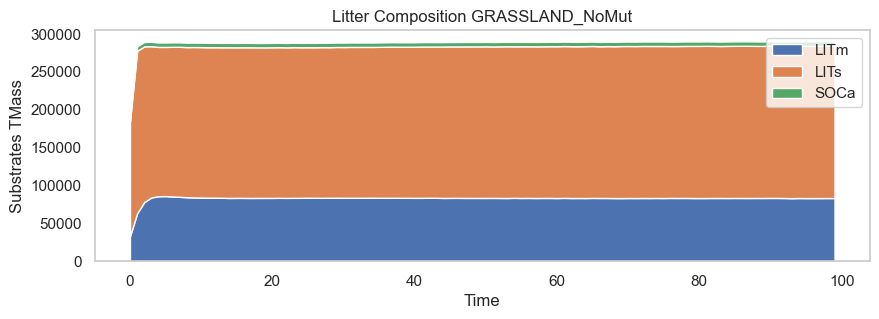

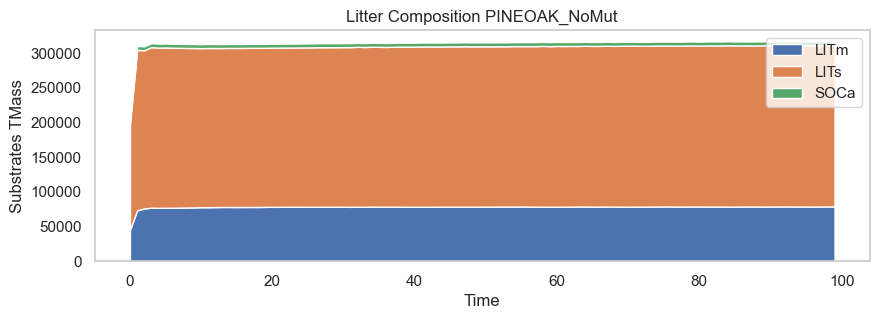

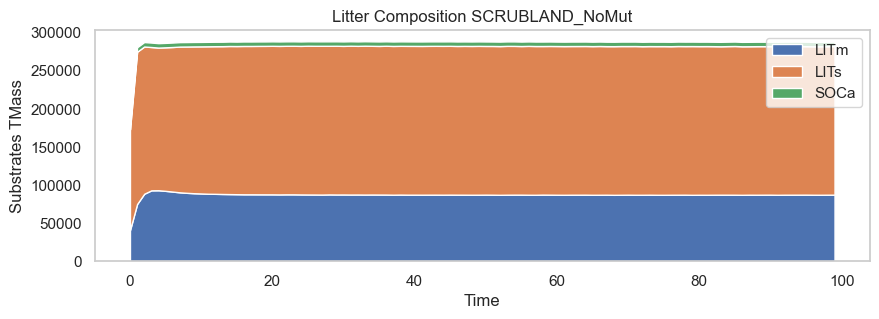

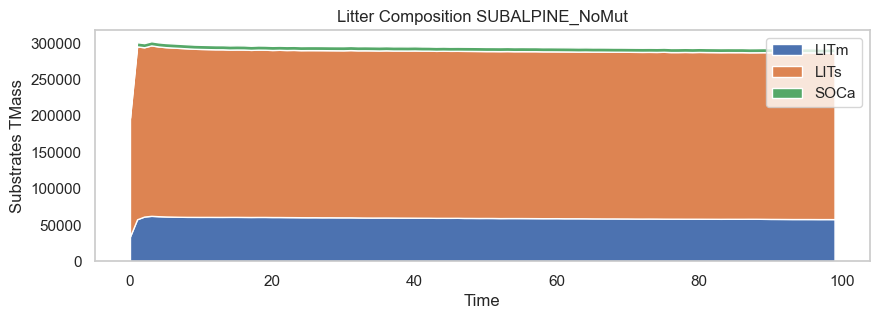

In [56]:
for k,d in dstats['SubClassesTMass'].items():
    fig, ax = plt.subplots(1,1,figsize=(10,3))
    ttvv = [get_yearly_averages(dd['times'],dd['mean'][:,0]) for dd in d.values()]
#     tt = [dd['times'] for dd in d.values()]
#     vv = np.row_stack([dd['mean'][:,0] for dd in d.values()])
    vv = np.row_stack([d[1] for d in ttvv])
    kk = list(d.keys())
    ax.stackplot(ttvv[0][0],vv,labels=kk)
    ax.set_xlabel('Time')
    ax.set_ylabel('Substrates TMass')
    ax.legend()
    ax.grid()
    ax.set_title('Litter Composition {}'.format(k))
    plt.show()
    plt.close(fig)

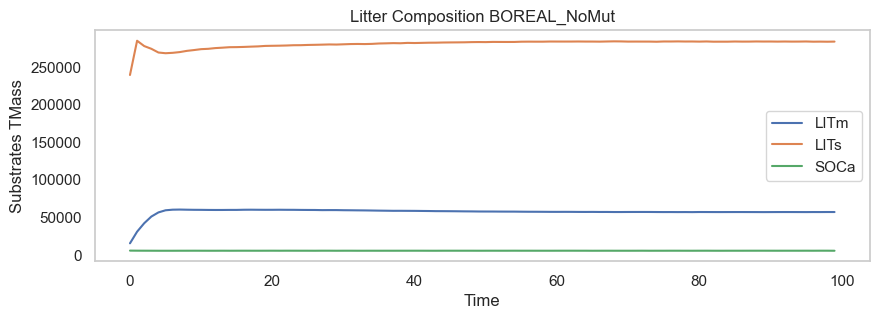

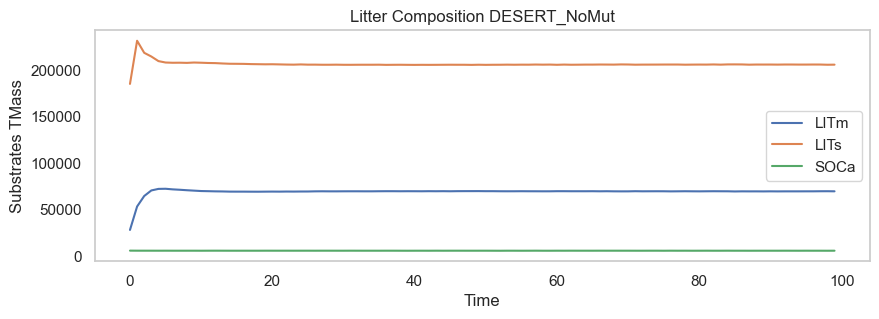

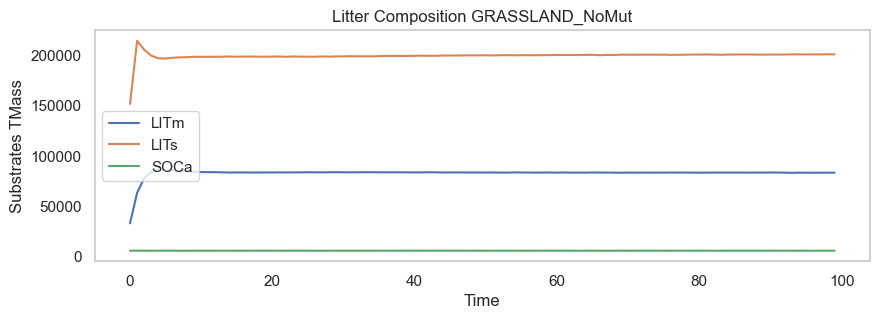

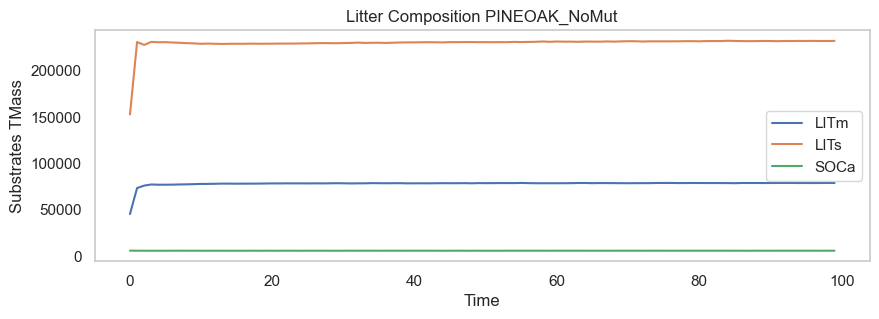

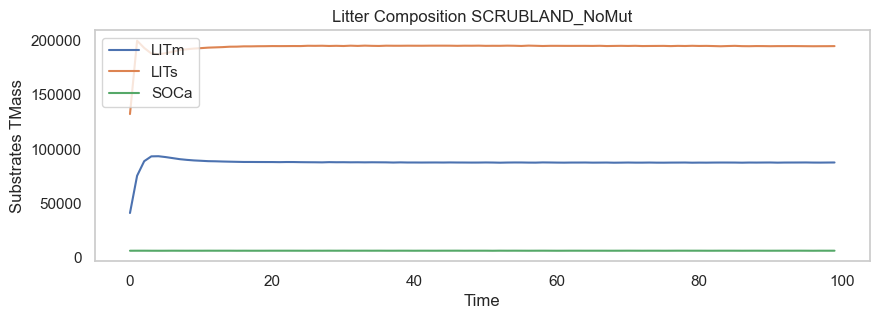

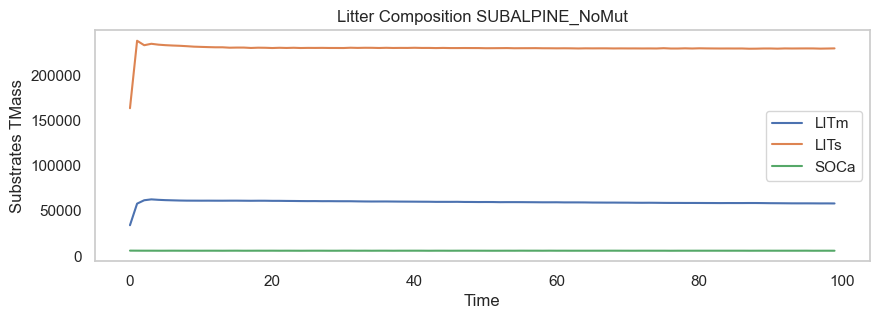

In [57]:
for k,d in dstats['SubClassesTMass'].items():
    fig, ax = plt.subplots(1,1,figsize=(10,3))
    for kk,dd in d.items():
        ttt,fff = get_yearly_averages(dd['times'],dd['mean'][:,0])
        ax.plot(ttt,fff,label=kk)
    ax.set_xlabel('Time')
    ax.set_ylabel('Substrates TMass')
    ax.legend()
    ax.grid()
    ax.set_title('Litter Composition {}'.format(k))
    plt.show()
    plt.close(fig)

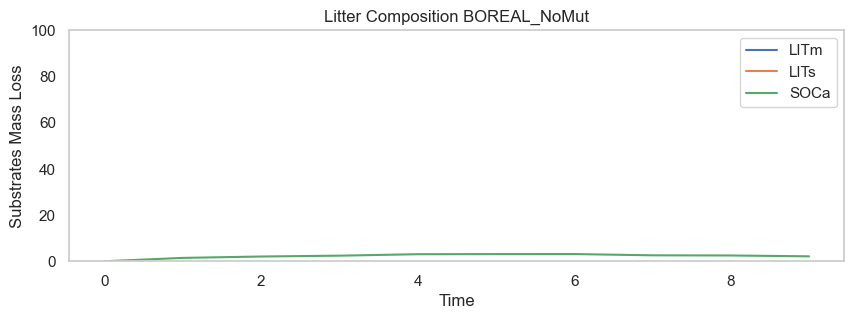

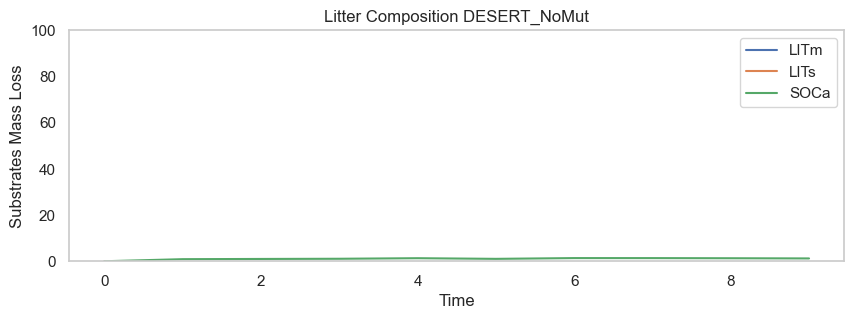

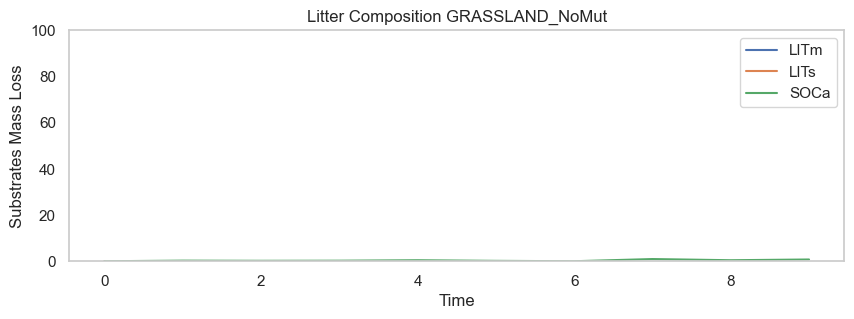

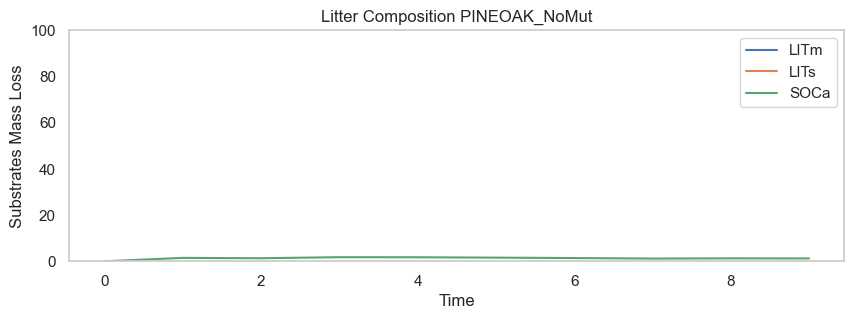

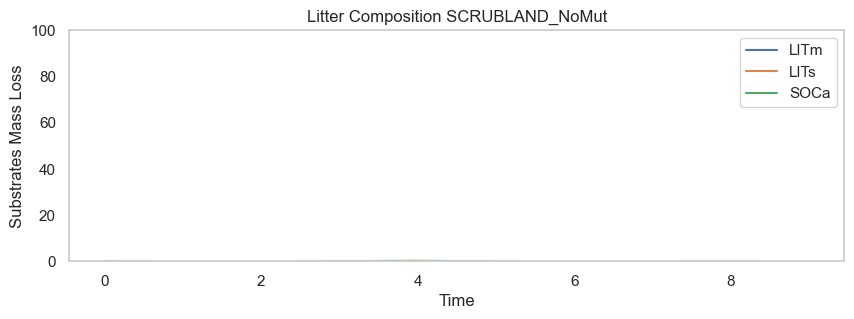

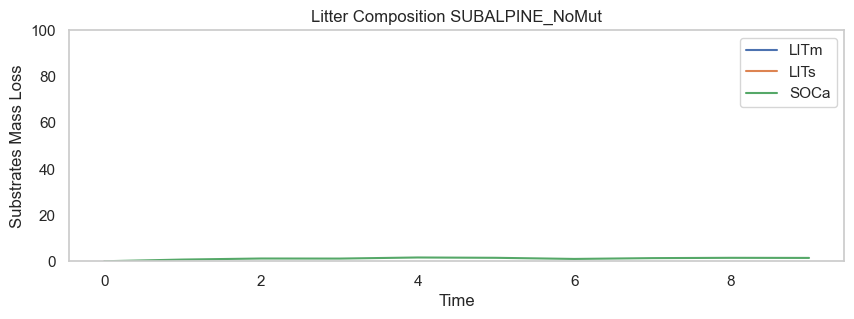

In [79]:
# Litter mass loss
for k,d in dstats['SubClassesTMass'].items():
    fig, ax = plt.subplots(1,1,figsize=(10,3))
    for kk,dd in d.items():
        ttt,fff = get_yearly_averages(dd['times'],dd['mean'][:,0])
        tttt = ttt[0:10]
        ffff = fff[0:10]
        ax.plot(tttt,((ffff[0]-ffff)/ffff[0])*100,label=kk)
    ax.set_ylim(0,100)
    ax.set_xlabel('Time')
    ax.set_ylabel('Substrates Mass Loss')
    ax.legend()
    ax.grid()
    ax.set_title('Litter Composition {}'.format(k))
    plt.show()
    plt.close(fig)